**Projet 6 : Classifiez automatiquement des biens de consommation**

* Consignes : https://openclassrooms.com/fr/projects/631/assignment
* Données : https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Textimage+DAS+V2/Dataset+projet+pre%CC%81traitement+textes+images.zip
* Documentation API Amazon : https://docs.aws.amazon.com/fr_fr/AWSECommerceService/latest/DG/ItemSearch.html

le corpus : un ensemble de documents (des textes dans notre cas), regroupés dans une optique ou dans une thématique précise. 

un document : la notion de document fait référence à un texte appartenant au corpus, mais indépendant des autres textes. Il peut être constitué d'une ou plusieurs phrases, un ou plusieurs paragraphes.

un token : le terme token désigne généralement un mot et/ou un élément de ponctuation. La phrase "Hello World!" comprend donc 3 tokens. 

le vocabulaire : il s'agit de l'ensemble des tokens distincts présents dans l'ensemble du corpus.

**Etude de faisabilité du moteur de classification**

Votre mission est de réaliser une première étude de faisabilité d'un moteur de classification d'articles basé sur une image et une description pour l'automatisation de l'attribution de la catégorie de l'article.

Pour ce faire, vous allez évaluer la possibilité d'extraire des données depuis l'API Amazon en prenant connaissance de la documentation et en écrivant la requête qui vous permettrait d'extraire des données supplémentaires. Vous vous assurerez ainsi que vous pourrez bien disposer de plus de données et diversifier les sources de données pour éviter les biais pour votre moteur de classification.

**Contraintes**

Linda vous a communiqué les contraintes suivantes :

* Limiter le nombre d’articles pris par l’API (par exemple : 1000 lignes) et filtrer sur un unique type d’article (par exemple un type d’article peu présent dans votre échantillon de données actuelles).
* Afin d’extraire les features, mettre en œuvre a minima un algorithme de type SIFT / ORB / SURF.
* Un algorithme de type CNN Transfer Learning peut éventuellement être utilisé en complément, s’il peut apporter un éclairage supplémentaire à la démonstration.


In [47]:
# !pip install opencv-python
# !pip install --upgrade numpy

# 
# !pip install tensorflow

# !pip install opencv-contrib-python
# !pip install tensorflow
# !pip install transformers
# !pip install torch
!pip install tensorflow-hub

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow-hub from https://files.pythonhosted.org/packages/30/78/9d5292a2b616901bdb075bbf0c777b293f4140bb48108ac2b33fd716c2eb/tensorflow_hub-0.14.0-py2.py3-none-any.whl.metadata
Using cached tensorflow_hub-0.14.0-py2.py3-none-any.whl (90 kB)


In [23]:
# pip install pandas numpy matplotlib seaborn opencv-python nltk scikit-learn keras tensorflow pillow


In [24]:
# pip install nltk

In [25]:
# !pip install opencv-contrib-python

In [26]:
# from sklearn.feature_extraction.text import CountVectorizer

# # Corpus de documents
# documents = ["Je suis à la maison", "La maison est dans la prairie", "Je suis à la plage"]

# # Créer un objet CountVectorizer
# vectorizer = CountVectorizer()

# # Appliquer le vectorizer pour transformer le corpus en représentation BoW
# X = vectorizer.fit_transform(documents)

# # Obtenir le vocabulaire initial
# vocabulaire_initial = ["Je", "suis", "à", "la", "maison", "est", "dans", "prairie", "plage"]

# # Convertir les mots du vocabulaire initial en minuscules
# vocabulaire_initial_minuscules = [mot.lower() for mot in vocabulaire_initial]

# # Obtenir l'index du vocabulaire initial dans le vocabulaire réel
# index_ordre_initial = [vectorizer.vocabulary_.get(mot, -1) for mot in vocabulaire_initial_minuscules]

# # Réorganiser la matrice BoW selon le nouvel ordre
# X_trie = X[:, index_ordre_initial]

# # Afficher le résultat trié
# print("Vocabulaire trié:", vocabulaire_initial)
# print("Représentation BoW triée:")
# print(X_trie.toarray())


In [27]:
# import numpy as np
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Corpus de documents
# documents = ["Je suis à la maison", "La maison est dans la prairie", "Je suis à la plage"]

# # Créer un objet TfidfVectorizer
# vectorizer = TfidfVectorizer()

# # Appliquer le vectorizer pour transformer le corpus en matrice TF-IDF
# tfidf_matrix = vectorizer.fit_transform(documents)

# # Obtenir le vocabulaire
# vocabulaire = vectorizer.get_feature_names_out()

# # Trouver l'index du mot "la" dans le vocabulaire
# indice_mot_la = np.where(vocabulaire == "la")[0][0]

# # Extraire la colonne correspondante au mot "la" dans la matrice TF-IDF
# colonne_mot_la = tfidf_matrix[:, indice_mot_la]

# # Convertir la colonne en un tableau numpy
# colonne_mot_la = colonne_mot_la.toarray()

# # Afficher la colonne TF-IDF pour le mot "la"
# print("Colonne TF-IDF pour le mot 'la':")
# print(colonne_mot_la)


In [28]:
# # from nltk.util import ngrams
# # import re

# # # Phrase donnée
# # phrase = "La seconde partie du cours de traitement de texte"

# # # Tokenisation de la phrase en mots (ignorant la ponctuation)
# # mots = re.findall(r'\b\w+\b', phrase.lower())

# # # Génération des trigrammes
# # trigrammes = list(ngrams(mots, 3))

# # # Affichage des trigrammes
# # for trigramme in trigrammes:
# #     print(" ".join(trigramme))
    
# # # Nombre total de trigrammes
# # nombre_de_trigrammes = len(trigrammes)
# # print("Nombre de trigrammes :", nombre_de_trigrammes)
# # 
# import re

# # Phrase donnée
# phrase = "La seconde partie du cours de traitement de texte traite de la transformation des données textuelles"

# # Tokenisation de la phrase en mots (ignorant la ponctuation)
# mots = re.findall(r'\b\w+\b', phrase.lower())

# # Génération des trigrammes
# trigrammes = [mots[i:i+3] for i in range(len(mots) - 2)]

# # Affichage des trigrammes
# for trigramme in trigrammes:
#     print(" ".join(trigramme))
    
# # Nombre total de trigrammes
# nombre_de_trigrammes = len(trigrammes)
# print("Nombre de trigrammes :", nombre_de_trigrammes)


In [29]:
# from gensim.models import Word2Vec

# # Corpus de phrases d'exemple (vous pouvez utiliser un corpus plus vaste)
# corpus = [
#     "boy is a male child",
#     "girl is a female child",
#     "son is a male child's offspring",
#     "daughter is a female child's offspring",
# ]

# # Tokenisation des phrases en mots
# corpus_tokenise = [sentence.split() for sentence in corpus]

# # Entraînement du modèle Word2Vec
# model = Word2Vec(corpus_tokenise, vector_size=100, window=5, min_count=1, sg=0)

# # Test de l'opération "boy - son + daughter"
# resultat = model.wv.most_similar(positive=['boy', 'daughter'], negative=['son'], topn=1)

# # Affichage du résultat
# print("Résultat de l'opération 'boy - son + daughter':")
# print(resultat)


# Chargement et nettoyage

**Imports**

In [30]:
# OpenCV (cv2) pour SIFT
# import cv2

In [1]:
# Assurez-vous d'installer les bibliothèques nécessaires avec pip ou conda avant de les importer.

# Pandas et NumPy pour la manipulation des données
import pandas as pd
import numpy as np

# Matplotlib et Seaborn pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# OpenCV (cv2) pour SIFT
import cv2

# NLTK pour le traitement du texte
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation

# Scikit-Learn pour l'apprentissage automatique
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import NMF, LatentDirichletAllocation, PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Keras (tensorflow) pour l'apprentissage en profondeur
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential, clone_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.applications.vgg16 import preprocess_input, VGG16

# Autres bibliothèques
from ipywidgets import IntProgress, Text
from IPython.display import display, Image
from scipy.ndimage import gaussian_filter
from PIL import Image as Image_PIL
import time

In [2]:
import cv2
print("Version d'OpenCV:", cv2.__version__)

Version d'OpenCV: 4.8.0


In [3]:
data = pd.read_csv('data/flipkart_com-ecommerce_sample_1050.csv')

In [4]:
data.shape

(1050, 15)

In [5]:
data.sample(5)

uniq_id            crawl_timestamp  \
772  8818424349b75a67775353d1feef2635  2015-12-12 11:46:53 +0000   
656  260c74b5a09272dec1a8207db3541a0d  2015-12-31 09:19:31 +0000   
897  e1e2883b6845cb214ec8d365cd496008  2015-12-20 08:26:17 +0000   
137  0d3e1dc0d38be59e9927e47f152e48aa  2015-12-01 12:40:44 +0000   
624  e10cbc680042d27fb747db2ac8e7a585  2016-06-16 23:45:04 +0000   

                                           product_url  \
772  http://www.flipkart.com/offspring-printed-sing...   
656  http://www.flipkart.com/bornbabykids-cotton-ba...   
897  http://www.flipkart.com/nkp-cotton-hand-towel/...   
137  http://www.flipkart.com/prithish-gemini-black-...   
624  http://www.flipkart.com/oxolloxo-solid-single-...   

                                          product_name  \
772        Offspring Printed Single Wrapper Multicolor   
656                     BornBabyKids Cotton Bath Towel   
897                              NKP Cotton Hand Towel   
137                  Prithish Gemini Black Ceramic Mug   
624  Oxolloxo Solid Single Breasted Casual Women's ...   

                                 product_category_tree               pid  \
772  ["Baby Care >> Baby Bedding >> Baby Blankets >...  BLAE8BUKXGJ3DHMG   
656  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEE2FFGXVH3MFW   
897        ["Home Furnishing >> Bath Linen >> Towels"]  BTWE68HFHPGSWYAW   
137  ["Kitchen & Dining >> Coffee Mugs >> Prithish ...  MUGE9HRR6HVCRPZT   
624  ["Baby Care >> Infant Wear >> Baby Boys' Cloth...  BZREJH9PC4Z7RGUS   

     retail_price  discounted_price                                 image  \
772         375.0             290.0  8818424349b75a67775353d1feef2635.jpg   
656         649.0             589.0  260c74b5a09272dec1a8207db3541a0d.jpg   
897         699.0             599.0  e1e2883b6845cb214ec8d365cd496008.jpg   
137         699.0             275.0  0d3e1dc0d38be59e9927e47f152e48aa.jpg   
624        1699.0            1699.0  e10cbc680042d27fb747db2ac8e7a585.jpg   

     is_FK_Advantage_product  \
772                    False   
656                    False   
897                    False   
137                    False   
624                    False   

                                           description       product_rating  \
772  Buy Offspring Printed Single Wrapper Multicolo...  No rating available   
656  Buy BornBabyKids Cotton Bath Towel at Rs. 589 ...  No rating available   
897  NKP Cotton Hand Towel (Hand Towel, White)\r\n ...  No rating available   
137  Buy Prithish Gemini Black Ceramic Mug for Rs.2...                    5   
624  Specifications of Oxolloxo Solid Single Breast...  No rating available   

          overall_rating         brand  \
772  No rating available     Offspring   
656  No rating available  BornBabyKids   
897  No rating available           NKP   
137                    5           NaN   
624  No rating available      Oxolloxo   

                                product_specifications  
772  {"product_specification"=>[{"key"=>"Brand", "v...  
656  {"product_specification"=>[{"key"=>"Hooded", "...  
897  {"product_specification"=>[{"key"=>"Material",...  
137  {"product_specification"=>[{"key"=>"Type", "va...  
624  {"product_specification"=>[{"key"=>"Pattern", ...

In [6]:
data.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

**Nettoyage catégories**

In [7]:
data['product_category_tree'].nunique()

642

In [8]:
# #Traitement des catégories
# Fonction pour extraire une catégorie d'un niveau spécifique
def split_categories(category, level):
    '''Cette fonction prend une catégorie et un niveau en entrée, puis extrait la catégorie du niveau spécifié.'''
    # Sépare la chaîne de catégorie en utilisant les guillemets et prend la partie entre les guillemets
    category = category.split('["')[1].split('"]')[0]
    cat = category.split(' >> ')  # Divise la catégorie en niveaux en utilisant ' >> '
    
    # Gère les cas où il peut manquer des niveaux de catégorie (remplace les manquants par 'None')
    if len(cat) < 3:
        cat = [cat[0], cat[1], 'None']
        if len(cat) < 2:
            cat = [cat[0], 'None', 'None']
    
    return cat[level]  # Retourne la catégorie du niveau spécifié

# Fonctions pour extraire les catégories de chaque niveau
def split_categories_1(category):
    return split_categories(category, 0)

def split_categories_2(category):
    return split_categories(category, 1)

def split_categories_3(category):
    return split_categories(category, 2)

# Fonction principale pour traiter les catégories dans le DataFrame
def detail_categories(dataframe):
    '''Cette fonction prend un DataFrame en entrée, applique les fonctions d'extraction de catégories
    et crée trois nouvelles colonnes : cat_lvl_1, cat_lvl_2 et cat_lvl_3, puis supprime la colonne d'origine.'''
    # Applique les fonctions d'extraction de catégories pour chaque niveau et crée de nouvelles colonnes
    dataframe['cat_lvl_1'] = dataframe['product_category_tree'].apply(split_categories_1)
    dataframe['cat_lvl_2'] = dataframe['product_category_tree'].apply(split_categories_2)
    dataframe['cat_lvl_3'] = dataframe['product_category_tree'].apply(split_categories_3)
    
    # Supprime la colonne d'origine 'product_category_tree' du DataFrame
    return dataframe.drop(['product_category_tree'], axis=1)

Ce code prend un DataFrame contenant des informations sur les produits, y compris une colonne "product_category_tree" qui contient des catégories de produits imbriquées. Il extrait ces catégories et les divise en trois niveaux distincts (cat_lvl_1, cat_lvl_2 et cat_lvl_3). En fin de compte, la colonne d'origine "product_category_tree" est supprimée du DataFrame, laissant place aux catégories extraites.

In [9]:
data = detail_categories(data)

In [10]:
data.sample(3)

uniq_id            crawl_timestamp  \
787  7264f56639c8c54158b94ced769082c8  2015-12-12 11:46:53 +0000   
81   4e130ed339dcfe20d2c8b66892278a94  2016-03-10 07:45:58 +0000   
880  fc3eb6ffed257270c26943e9f9c347b9  2015-12-20 08:26:17 +0000   

                                           product_url  \
787  http://www.flipkart.com/perucci-pc-218-decker-...   
81   http://www.flipkart.com/treasure-showpiece-23-...   
880  http://www.flipkart.com/maspar-cotton-set-towe...   

                                      product_name               pid  \
787  Perucci PC-218 Decker Analog Watch  - For Men  WATE75EHQFGUKVZQ   
81                    Treasure Showpiece  -  23 cm  SHIEGHNCZBRTKZCR   
880                    Maspar Cotton Set of Towels  BTWDSZQTJTXGBGPU   

     retail_price  discounted_price                                 image  \
787        1600.0            1290.0  7264f56639c8c54158b94ced769082c8.jpg   
81          699.0             399.0  4e130ed339dcfe20d2c8b66892278a94.jpg   
880        1645.0            1645.0  fc3eb6ffed257270c26943e9f9c347b9.jpg   

     is_FK_Advantage_product  \
787                    False   
81                     False   
880                    False   

                                           description       product_rating  \
787  Perucci PC-218 Decker Analog Watch  - For Men ...  No rating available   
81   Key Features of Treasure Showpiece  -  23 cm P...  No rating available   
880  Maspar Cotton Set of Towels (One Beach Towel, ...  No rating available   

          overall_rating     brand  \
787  No rating available       NaN   
81   No rating available  Treasure   
880  No rating available    Maspar   

                                product_specifications  \
787  {"product_specification"=>[{"key"=>"Chronograp...   
81   {"product_specification"=>[{"key"=>"Brand", "v...   
880  {"product_specification"=>[{"key"=>"Material",...   

                      cat_lvl_1                  cat_lvl_2  \
787                     Watches              Wrist Watches   
81   Home Decor & Festive Needs  Table Decor & Handicrafts   
880             Home Furnishing                 Bath Linen   

                 cat_lvl_3  
787  Perucci Wrist Watches  
81              Showpieces  
880                 Towels

In [11]:
data_level = data.copy()

In [12]:
# data.groupby('cat_lvl_2').count()['uniq_id'].sort_values(ascending=False)
# Résumé : Ce code regroupe les données du DataFrame par la deuxième catégorie de niveau (cat_lvl_2),
# compte le nombre d'éléments uniques (uniq_id) dans chaque groupe, puis trie les résultats par ordre décroissant.

# Regroupe les données par la deuxième catégorie de niveau (cat_lvl_2)
grouped_data = data.groupby('cat_lvl_2')

# Compte le nombre d'éléments uniques (uniq_id) dans chaque groupe
counted_data = grouped_data.count()['uniq_id']

# Trie les résultats par ordre décroissant
sorted_data = counted_data.sort_values(ascending=False)

# Affiche les résultats triés
sorted_data

cat_lvl_2
Wrist Watches                149
Laptop Accessories            87
Infant Wear                   84
Coffee Mugs                   74
Showpieces                    71
                            ... 
Dinnerware & Crockery          1
Men's Grooming                 1
Beauty Accessories             1
Kripa's Home Furnishing        1
Consumables & Disposables      1
Name: uniq_id, Length: 62, dtype: int64

Ce code effectue une analyse des données en regroupant d'abord les données du DataFrame par la deuxième catégorie de niveau (cat_lvl_2). Ensuite, il compte le nombre d'éléments uniques (représentés par la colonne 'uniq_id') dans chaque groupe de catégories. Enfin, il trie ces résultats par ordre décroissant, ce qui permet d'obtenir un classement des catégories de niveau 2 en fonction du nombre d'éléments uniques qu'elles contiennent.

In [13]:
data.groupby('cat_lvl_3').count()['uniq_id'].sort_values(ascending=False)

cat_lvl_3
Deodorants                   65
Blankets, Quilts & Dohars    57
Baby Girls' Clothes          49
Routers                      49
USB Gadgets                  38
                             ..
Makeup Accessories            1
Malhar Showpieces             1
Mars Combos and Kits          1
Marvel Wrist Watches          1
posterchacha Coffee Mugs      1
Name: uniq_id, Length: 242, dtype: int64

In [14]:
data.to_csv('data/data_categories.csv')

# Requête API Amazon

Pour ce faire, vous allez évaluer la possibilité d'extraire des données depuis l'API Amazon en prenant connaissance de la documentation et en écrivant la requête qui vous permettrait d'extraire des données supplémentaires. Vous vous assurerez ainsi que vous pourrez bien disposer de plus de données et diversifier les sources de données pour éviter les biais pour votre moteur de classification.

Contraintes :

* Limiter le nombre d’articles pris par l’API (par exemple : 1000 lignes) et filtrer sur un unique type d’article (par exemple un type d’article peu présent dans votre échantillon de données actuelles).

On va chercher à faire une requête qui extrait des données d'articles correspondant aux catégories les moins représentées du jeu de données : elles permettront de compléter le base de données avec de nouveaux individus

In [15]:
#Identification des catégories les moins représentées
occurence_cat = pd.DataFrame(data['cat_lvl_2'].value_counts())

In [16]:
occurence_cat.head()

cat_lvl_2
Wrist Watches             149
Laptop Accessories         87
Infant Wear                84
Coffee Mugs                74
Showpieces                 71

In [17]:
#identification des catégories pour lesquelles on a le moins d'occurence
cat_to_fill = occurence_cat[occurence_cat['cat_lvl_2']<10]
cat_to_fill.sample(5)

cat_lvl_2
Software                           1
Strollers & Activity Gear          1
Baby Grooming                      4
Men's Grooming                     1
Women's Hygiene                    1

Requete pour chaque catégorie de produit :

Exemple

http://webservices.amazon.com/onca/xml?
Service=AWSECommerceService&
AWSAccessKeyId=[AWS Access Key ID]&
AssociateTag=[Associate ID]&
Operation=ItemSearch& #recherche d'article
Keywords=handbag& #titre du produit
VariationPage=1& #première page uniquement
Sort=salesrank #tri en fonction des produits qui se vendent le plus en premier


# Préparation des données

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#train, test = train_test_split(data.sample(200, random_state=42), test_size = 0.25, random_state=42)
train, test = train_test_split(data, test_size = 0.25, random_state=42)
#del data

In [20]:
train.to_csv('data/train.csv')
test.to_csv('data/test.csv')

In [21]:
train

uniq_id            crawl_timestamp  \
165   785b4383b12106dd172306d427d8f7b2  2015-12-01 12:40:44 +0000   
248   45d0af2c709de47268c80c35a117de44  2015-12-01 12:40:44 +0000   
310   64b463dc0b75ae40a848498c657041e6  2015-12-01 06:13:00 +0000   
685   6b5cdfe68595fbcab0e05dc625d3d66a  2015-12-31 09:19:31 +0000   
843   e86daf9ebcdfc5c5dd088cdb7f8f8db6  2015-12-29 05:07:38 +0000   
...                                ...                        ...   
330   394c2c627914e1eed9b8ac343583a679  2015-12-01 06:13:00 +0000   
466   3bc98543c7dd0d8fce5b8185b4a58c43  2016-05-05 06:42:02 +0000   
121   7dd5e83e2108a97659577e50879f9d9f  2016-03-25 17:27:56 +0000   
1044  be0f39341d771aac57084970f1ed6425  2015-12-01 10:15:43 +0000   
860   6136976dc5a433cdf8e2559b8510bdce  2015-12-29 05:07:38 +0000   

                                            product_url  \
165   http://www.flipkart.com/rockmantra-cute-two-ca...   
248   http://www.flipkart.com/malhar-niko-male-doll-...   
310   http://www.flipkart.com/linksys-smart-wi-fi-ro...   
685   http://www.flipkart.com/richfeel-sunshield-spf...   
843   http://www.flipkart.com/epresent-mfan-1-fan-us...   
...                                                 ...   
330   http://www.flipkart.com/asus-rt-n12-lx-300mbps...   
466   http://www.flipkart.com/shaun-printed-baby-boy...   
121   http://www.flipkart.com/toffyhouse-baby-boy-s-...   
1044  http://www.flipkart.com/wallmantra-medium-viny...   
860   http://www.flipkart.com/dizionario-mini-perfum...   

                                           product_name               pid  \
165                Rockmantra Cute Two Cats Ceramic Mug  MUGEAGGKFBTYPN4Z   
248           Malhar Niko Male Doll Showpiece  -  25 cm  SHIEY382SR75SXEY   
310                          Linksys Smart Wi-Fi Router  RTRDZTF9DBT4CW8U   
685                    Richfeel Sunshield - SPF 30 PA++  SNRE4F2GBWVF6UKR   
843                     Epresent Mfan 1 Fan USB USB Fan  USGEB3HTYWCYT2HY   
...                                                 ...               ...   
330              Asus RT-N12 LX 300Mbps Wireless Router  RTRD6352VX7RZSWG   
466   Shaun Printed Baby Boy's Yellow, Grey, Black T...  TKPEGRKHT4832GFE   
121                     Toffyhouse Baby Boy's Sleepsuit  BOLEDTCXKEZP9MVG   
1044           Wallmantra Medium Vinyl Stickers Sticker  STIE9F5UYBHF4MXU   
860   Dizionario Mini Perfume Fan Cooling Fancoolerb...  USGEBYYPVTTJA9JR   

      retail_price  discounted_price                                 image  \
165          499.0             349.0  785b4383b12106dd172306d427d8f7b2.jpg   
248         6395.0            5436.0  45d0af2c709de47268c80c35a117de44.jpg   
310        14999.0           13500.0  64b463dc0b75ae40a848498c657041e6.jpg   
685          299.0             224.0  6b5cdfe68595fbcab0e05dc625d3d66a.jpg   
843          269.0             219.0  e86daf9ebcdfc5c5dd088cdb7f8f8db6.jpg   
...            ...               ...                                   ...   
330         3950.0            1990.0  394c2c627914e1eed9b8ac343583a679.jpg   
466         2999.0            1106.0  3bc98543c7dd0d8fce5b8185b4a58c43.jpg   
121          545.0             545.0  7dd5e83e2108a97659577e50879f9d9f.jpg   
1044        1429.0            1143.0  be0f39341d771aac57084970f1ed6425.jpg   
860         1199.0             799.0  6136976dc5a433cdf8e2559b8510bdce.jpg   

      is_FK_Advantage_product  \
165                     False   
248                      True   
310                      True   
685                     False   
843                     False   
...                       ...   
330                     False   
466                     False   
121                     False   
1044                    False   
860                     False   

                                            description       product_rating  \
165   Rockmantra Cute Two Cats Ceramic Mug (5.5 l)\r...  No rating available   
248   Buy Malhar Niko Male Doll Showpiece  -  25 cm ...  No rating availab

In [22]:
pd.read_csv('data/flipkart_com-ecommerce_sample_1050.csv').iloc[165]

uniq_id                                     785b4383b12106dd172306d427d8f7b2
crawl_timestamp                                    2015-12-01 12:40:44 +0000
product_url                http://www.flipkart.com/rockmantra-cute-two-ca...
product_name                            Rockmantra Cute Two Cats Ceramic Mug
product_category_tree      ["Kitchen & Dining >> Coffee Mugs >> Rockmantr...
pid                                                         MUGEAGGKFBTYPN4Z
retail_price                                                           499.0
discounted_price                                                       349.0
image                                   785b4383b12106dd172306d427d8f7b2.jpg
is_FK_Advantage_product                                                False
description                Rockmantra Cute Two Cats Ceramic Mug (5.5 l)\r...
product_rating                                           No rating available
overall_rating                                           No rating available

# Données textuelles

## Traitement des descriptions (BoW / TF IDF)

In [23]:
train[['description']].sample(5)

description
363  Flipkart.com: Buy Aero Care Ice & Blue 4 Men C...
443  Key Features of Tidy Printed Cushions Cover 10...
37   Key Features of Dungri India Craft Ducjug010-d...
757  SVM Navratri Special 7 Analog Watch  - For Gir...
729  Key Features of VRCT 196 inch Green Rice Light...

### TF IDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
# from string import punctuation
# from nltk.corpus import stopwords
# stopwords_en = set(["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"])
# stopwords_nltk = set(stopwords.words('english'))
# stopwords_punct = set(punctuation)
# stopwords_combined = set.union(stopwords_en, stopwords_nltk, stopwords_punct)

In [26]:
# Importation des bibliothèques nécessaires
from string import punctuation
from nltk.corpus import stopwords

# Définition des ensembles de stopwords en anglais
stopwords_en = set(["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"])

# Importation des stopwords de NLTK en anglais
stopwords_nltk = set(stopwords.words('english'))

# Création d'un ensemble de stopwords combinant ceux en anglais, de NLTK et de ponctuation
stopwords_punct = set(punctuation)
stopwords_combined = set.union(stopwords_en, stopwords_nltk, stopwords_punct)


**Résumé :** Ce code importe les bibliothèques nécessaires pour travailler avec des stopwords en anglais. Il définit ensuite trois ensembles de stopwords : `stopwords_en`, `stopwords_nltk`, et `stopwords_punct`. Enfin, il crée un ensemble combiné `stopwords_combined` qui contient tous les stopwords des trois ensembles. Ces stopwords seront utilisés pour le traitement du texte dans les tâches de NLP (Natural Language Processing).

Vous avez nettoyé les champs de texte (suppression de la ponctuation et des mots de liaison, mise en minuscules)

In [27]:
# Afficher les premiers 4 éléments de l'ensemble de ponctuation
print('ponctuation : ', list(stopwords_punct)[0:4])

# Afficher les premiers 4 éléments de l'ensemble de stopwords de NLTK
print('stopwords : ', list(stopwords_nltk)[0:4])

ponctuation :  [',', '_', ':', '|']
stopwords :  ['theirs', 'such', 'now', 'where']


Ce code imprime les premiers 4 éléments de deux ensembles différents : l'ensemble de ponctuation et l'ensemble de stopwords de NLTK. Cela vous permet de voir quels caractères sont inclus dans l'ensemble de ponctuation et quels mots sont inclus dans l'ensemble de stopwords de NLTK. Cela peut être utile pour comprendre quelles sont les valeurs par défaut de ces ensembles dans NLTK.

## Le modèle TF-IDF

Le modèle TF-IDF (Term Frequency-Inverse Document Frequency) est une technique couramment utilisée en traitement du langage naturel (NLP) pour extraire et représenter des informations à partir de documents textuels. Il s'agit d'une méthode de transformation de texte qui permet de quantifier l'importance relative de chaque mot ou terme (token) dans un document par rapport à une collection de documents.

Voici comment fonctionne le modèle TF-IDF :

1. **Term Frequency (TF - Fréquence du Terme)** : Il mesure la fréquence d'un terme particulier dans un document. Plus un terme apparaît fréquemment dans un document, plus sa valeur TF est élevée. Cependant, il est important de noter que la simple fréquence des termes ne tient pas compte du contexte ou de la spécificité du terme.

2. **Inverse Document Frequency (IDF - Fréquence Inverse du Document)** : L'IDF mesure l'importance d'un terme dans l'ensemble de la collection de documents. Les termes qui sont très courants dans tous les documents ont un IDF faible, tandis que les termes rares et spécifiques à un document ont un IDF élevé. L'IDF est calculé en prenant le logarithme de l'inverse de la fréquence du document contenant le terme, ce qui atténue davantage les termes très courants.

3. **TF-IDF Score** : Le score TF-IDF d'un terme dans un document est obtenu en multipliant sa fréquence (TF) par son inverse de fréquence de document (IDF). Ainsi, un terme qui est fréquent dans un document mais rare dans l'ensemble de la collection de documents aura un score TF-IDF élevé, ce qui indique son importance relative pour ce document particulier.

Le modèle TF-IDF est couramment utilisé pour diverses tâches en NLP, notamment :

- **Recherche d'informations** : Pour classer les documents en fonction de leur pertinence par rapport à une requête.

- **Regroupement de documents** : Pour identifier des groupes de documents similaires en fonction de leurs contenus.

- **Classification de texte** : Pour attribuer des catégories ou des étiquettes à des documents en fonction de leur contenu.

- **Extraction de mots clés** : Pour identifier les termes les plus importants dans un document.

- **Résumé automatique** : Pour extraire les phrases ou les passages les plus pertinents d'un texte.

Le modèle TF-IDF est un outil précieux pour le traitement automatique du langage naturel, car il permet de quantifier et de représenter l'importance sémantique des termes dans un texte, ce qui facilite l'analyse, la recherche et l'organisation de grandes quantités de données textuelles.

In [28]:
# from nltk import word_tokenize          
# from nltk.stem import WordNetLemmatizer 
# class LemmaTokenizer:
#      def __init__(self):
#          self.wnl = WordNetLemmatizer()
#      def __call__(self, doc):
#          return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

# tfidf = TfidfVectorizer(encoding='utf-8',
#                        lowercase=True,
#                        tokenizer=LemmaTokenizer(),
#                        stop_words=stopwords_combined,
#                        )
# Importer les fonctions nécessaires depuis NLTK
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

# Définir une classe personnalisée pour la tokenization et la lemmatization
class LemmaTokenizer:
    def __init__(self):
        # Initialiser le lemmatizer de WordNet
        self.wnl = WordNetLemmatizer()

    def __call__(self, doc):
        # Appliquer la lemmatization aux tokens du document
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

# Configurer le vectoriseur TF-IDF avec des options personnalisées
tfidf = TfidfVectorizer(
    encoding='utf-8',          # Encodage des caractères en UTF-8
    lowercase=True,            # Convertir le texte en minuscules
    tokenizer=LemmaTokenizer(),# Utiliser la classe de tokenization et de lemmatization personnalisée
    stop_words=stopwords_combined,  # Utiliser les stopwords combinés que vous avez définis précédemment
)

Ce code crée un vectoriseur TF-IDF en utilisant la classe `LemmaTokenizer` pour effectuer la tokenization et la lemmatization des documents textuels. Il configure également d'autres options telles que l'encodage, la conversion en minuscules et l'utilisation des stopwords combinés que vous avez définis précédemment. Le vectoriseur TF-IDF est couramment utilisé pour prétraiter du texte en vue de l'analyse de texte, de la classification de texte ou d'autres tâches liées au traitement du langage naturel (NLP).
Bien sûr, voici un résumé de ces termes :

1. **Tokenization (Tokenisation en français)** : La tokenization est le processus de découpage d'un texte en unités plus petites appelées "tokens" ou "jetons". Un token peut être un mot, une phrase, ou même un caractère, selon le niveau de granularité choisi. Par exemple, si nous prenons la phrase "J'aime les pommes rouges", la tokenization pourrait la diviser en tokens individuels comme "J'", "aime", "les", "pommes", "rouges". La tokenization est souvent la première étape dans le traitement du langage naturel (NLP) pour analyser ou manipuler du texte.

2. **Lemmatization (Lemmatisation en français)** : La lemmatization est le processus de réduction d'un mot à sa forme de base ou à sa "lemme". Une lemmatisation tente de ramener les mots fléchis ou conjugués à leur forme canonique. Par exemple, le verbe "manger" pourrait être ramené à sa forme de base "mange". La lemmatization est utile pour normaliser les mots de manière à ce qu'ils soient comparables et traitables de manière uniforme dans le cadre d'analyses textuelles.

3. **Stopwords (Mots vides en français)** : Les stopwords sont des mots très courants dans une langue (comme "et", "le", "la", "de", etc.) qui sont généralement supprimés lors de l'analyse de texte. Ces mots n'apportent pas de valeur sémantique significative à un texte et sont souvent omis pour réduire la dimensionnalité des données textuelles et améliorer les performances des modèles d'apprentissage automatique. Les stopwords varient d'une langue à l'autre et doivent être supprimés pour éviter qu'ils ne biaisent les résultats de l'analyse.

In [29]:
train['description']

165     Rockmantra Cute Two Cats Ceramic Mug (5.5 l)\r...
248     Buy Malhar Niko Male Doll Showpiece  -  25 cm ...
310     Buy Linksys Smart Wi-Fi Router only for Rs. 0....
685     Flipkart.com: Buy Richfeel Sunshield - SPF 30 ...
843     Buy Epresent Mfan 1 Fan USB USB Fan for Rs.219...
                              ...                        
330     Buy Asus RT-N12 LX 300Mbps Wireless Router onl...
466     Key Features of Shaun Printed Baby Boy's Yello...
121     Specifications of Toffyhouse Baby Boy's Sleeps...
1044    Buy Wallmantra Medium Vinyl Stickers Sticker f...
860     Buy Dizionario Mini Perfume Fan Cooling Fancoo...
Name: description, Length: 787, dtype: object

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Adaptation du TfidfVectorizer aux données d'entraînement et transformation du texte en vecteurs TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(train['description'])

**Explication** :

Une fois que le TfidfVectorizer a été adapté aux données d'entraînement à l'aide de la méthode `fit_transform`, il peut être utilisé pour transformer d'autres textes en vecteurs TF-IDF compatibles avec les modèles d'apprentissage automatique.

In [31]:
# tfidf.get_feature_names()
# Obtenir les noms des fonctionnalités (mots) du modèle TF-IDF
feature_names = tfidf.get_feature_names_out()
feature_names

array(['00', '001', '0021', ..., 'zone', 'zora', 'zyxel'], dtype=object)

**Explication** :

Ce code utilise la méthode `get_feature_names()` de l'objet TfidfVectorizer pour obtenir la liste des noms de fonctionnalités, qui sont essentiellement les mots qui ont été extraits et traités à partir du texte d'entraînement à l'aide du TfidfVectorizer. Ces noms de fonctionnalités sont utilisés pour comprendre quelles caractéristiques sont incluses dans la représentation TF-IDF du texte, ce qui peut être utile pour l'analyse ou la visualisation ultérieure.

In [32]:
# matrix_cat = tfidf.transform(train['description'])
# Transformer le texte d'entraînement en une matrice TF-IDF
matrix_cat = tfidf.transform(train['description'])

**Explication** :
Ce code utilise la méthode `transform()` de l'objet TfidfVectorizer pour convertir le texte d'entraînement, qui se trouve dans la colonne 'description' du DataFrame `train`, en une matrice TF-IDF. Cette matrice représente la fréquence des termes inversée (TF-IDF) pour chaque mot ou terme présent dans le texte d'entraînement. Elle sera utilisée pour entraîner des modèles d'apprentissage automatique, notamment pour la classification de texte ou d'autres tâches d'analyse de texte.

In [33]:
matrix_cat.todense()[0,:].tolist()

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

In [34]:
train['description'].iloc[0]

'Rockmantra Cute Two Cats Ceramic Mug (5.5 l)\r\n                         Price: Rs. 349\r\n\t\t\t\t\r\n\t\t\tGive a thrilling yet fresh start to your day. An exclusive creation by Rockmantra, this mug features porcelain crafting ensuring the design stays permanent for years to come and making it a perfect pick to gift your loved ones too!Dishwasher and microwave safe. Product details and specifications :\rMaterial : Ceramic\rSize : 3.5" X 4"\r\nGive a thrilling yet fresh start to your day. An exclusive creation by Rockmantra, this mug features porcelain crafting ensuring the design stays permanent for years to come and making it a perfect pick to gift your loved ones too!Dishwasher and microwave safe. Product details and specifications :\rMaterial : Ceramic\rSize : 3.5" X 4"'

Decomposition en pratique

In [35]:
# Importer la fonction de tokenisation de NLTK
from nltk import word_tokenize

# Définition d'une fonction pour afficher une liste
def affiche_liste(liste):
    return liste

# Exemple de description depuis le DataFrame train
description_example = train['description'].iloc[4]

# Affichage de la description d'origine
print('======== PRE TRAITEMENT ========')
print(affiche_liste(description_example),'\n')

# Conversion en lettres minuscules (lowercase)
description_example = description_example.lower()
print('======== LOWERCASE ========')
print(affiche_liste(description_example),'\n')

# Tokenisation du texte
description_example = word_tokenize(description_example)
print('======== TOKENIZER ========')
print(affiche_liste(description_example),'\n')

# Suppression des mots vides (stopwords)
description_example = [w for w in description_example if not w in stopwords_combined] 
print('======== STOPWORDS ========')
print(affiche_liste(description_example),'\n')

# Lemmatisation des mots
lemm = WordNetLemmatizer()
description_example = [lemm.lemmatize(el) for el in description_example]
print('======== LEMMATISATION ========')
print(affiche_liste(description_example),'\n')

# Extraction des mots et de leurs scores TF-IDF pour un exemple spécifique
transformation = []
for i, el  in enumerate(matrix_cat.todense()[4,:].tolist()[0]):
    if el !=0:
        transformation.append((tfidf.get_feature_names_out()[i], el))

# Création d'un DataFrame pour afficher les mots les plus importants avec leurs scores TF-IDF
pd.DataFrame(transformation, columns=['mot', 'tfidf']).sort_values(by='tfidf', ascending=False).head(10)

======== PRE TRAITEMENT ========
Buy Epresent Mfan 1 Fan USB USB Fan for Rs.219 online. Epresent Mfan 1 Fan USB USB Fan at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee. 

======== LOWERCASE ========
buy epresent mfan 1 fan usb usb fan for rs.219 online. epresent mfan 1 fan usb usb fan at best prices with free shipping & cash on delivery. only genuine products. 30 day replacement guarantee. 

======== TOKENIZER ========
['buy', 'epresent', 'mfan', '1', 'fan', 'usb', 'usb', 'fan', 'for', 'rs.219', 'online', '.', 'epresent', 'mfan', '1', 'fan', 'usb', 'usb', 'fan', 'at', 'best', 'prices', 'with', 'free', 'shipping', '&', 'cash', 'on', 'delivery', '.', 'only', 'genuine', 'products', '.', '30', 'day', 'replacement', 'guarantee', '.'] 

======== STOPWORDS ========
['buy', 'epresent', 'mfan', '1', 'fan', 'usb', 'usb', 'fan', 'rs.219', 'online', 'epresent', 'mfan', '1', 'fan', 'usb', 'usb', 'fan', 'prices', 'free', 'shipping', 'cash', '

mot     tfidf
9        fan  0.637175
23       usb  0.454869
8   epresent  0.388319
14      mfan  0.388319
0        219  0.194159
18    prices  0.071857
3       best  0.071346
16    online  0.054523
24      with  0.053976
2         at  0.050738

 **Explication** :

Ce code effectue plusieurs étapes de prétraitement du texte, notamment la conversion en minuscules, la tokenisation (division en mots), la suppression des mots vides (stopwords), et la lemmatisation (réduction des mots à leur forme de base). Ensuite, il extrait les mots les plus importants de l'exemple de description en utilisant la matrice TF-IDF préalablement calculée. Ces mots importants sont affichés avec leurs scores TF-IDF correspondants pour une meilleure compréhension du contenu du texte.

## Prétraiter des données textes pour obtenir un jeu de données exploitable.

### Fonction de traitement pour les points CE1 à CE4 

In [36]:
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# CE1 : Nettoyage des champs de texte
def clean_text(text):
    # Supprimer la ponctuation et mettre en minuscules
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    return text

# CE2 : Tokenization d'une phrase
def tokenize_text(text):
    # Utilisation de NLTK pour la tokenization
    tokens = word_tokenize(text)
    return tokens

# CE3 : Stemming d'une phrase
def stem_text(text):
    # Utilisation de NLTK pour le stemming avec le Porter Stemmer
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in text]
    return stemmed_tokens

# CE4 : Lemmatization d'une phrase
def lemmatize_text(text):
    # Utilisation de NLTK pour la lemmatisation avec le WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in text]
    return lemmatized_tokens

# Fonction qui appelle les 4 fonctions précédentes
def text_preprocessing(text):
    # Nettoyage du texte
    cleaned_text = clean_text(text)
    
    # Tokenization
    tokens = tokenize_text(cleaned_text)
    
    # Stemming
    stemmed_tokens = stem_text(tokens)
    
    # Lemmatization
    lemmatized_tokens = lemmatize_text(tokens)
    
    return {
        "cleaned_text": cleaned_text,
        "tokens": tokens,
        "stemmed_tokens": stemmed_tokens,
        "lemmatized_tokens": lemmatized_tokens
    }

# Exemple d'utilisation de la fonction de prétraitement
text = "Pour Tester, il faut ; Ceci est un exemple de phrase à prétraiter."
preprocessed_text = text_preprocessing(text)
print(preprocessed_text)

{'cleaned_text': 'pour tester il faut  ceci est un exemple de phrase à prétraiter', 'tokens': ['pour', 'tester', 'il', 'faut', 'ceci', 'est', 'un', 'exemple', 'de', 'phrase', 'à', 'prétraiter'], 'stemmed_tokens': ['pour', 'tester', 'il', 'faut', 'ceci', 'est', 'un', 'exempl', 'de', 'phrase', 'à', 'prétraiter'], 'lemmatized_tokens': ['pour', 'tester', 'il', 'faut', 'ceci', 'est', 'un', 'exemple', 'de', 'phrase', 'à', 'prétraiter']}


Cette série de fonctions effectue les tâches suivantes :
- Nettoyage de la ponctuation et mise en minuscules (CE1).
- Tokenization d'une phrase (CE2).
- Stemming d'une phrase (CE3) avec le Porter Stemmer.
- Lemmatization d'une phrase (CE4) avec le WordNet Lemmatizer.

La fonction `text_preprocessing` prend un texte en entrée et renvoie un dictionnaire contenant le texte nettoyé, les tokens, les tokens stemmés et les tokens lemmatisés. Vous pouvez l'adapter en fonction de vos besoins spécifiques de prétraitement textuel.

### Bag of words 

### **CE5** :  

Vous avez construit des features ("feature engineering") de type bag-of-words (bag-of-words standard : comptage de mots, et Tf-idf), avec des étapes de nettoyage supplémentaires : seuil de fréquence des mots, normalisation des mots.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
# tf_vectorizer = CountVectorizer(encoding='utf-8',
#                        lowercase=True,
#                        tokenizer=LemmaTokenizer(),
#                        stop_words=stopwords_combined)
# tf = tf_vectorizer.fit_transform(train['description'])
# Importer la classe CountVectorizer de scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

# Définition d'un tokenizer personnalisé utilisant la lemmatisation
tf_vectorizer = CountVectorizer(
    encoding='utf-8',         # Encodage du texte en UTF-8
    lowercase=True,           # Conversion en minuscules
    tokenizer=LemmaTokenizer(),  # Utilisation du tokenizer personnalisé basé sur la lemmatisation
    stop_words=stopwords_combined  # Liste des mots vides à exclure
)

# Appliquer le CountVectorizer aux descriptions dans le DataFrame train
tf_vectorizer = TfidfVectorizer()

tf = tf_vectorizer.fit_transform(train['description'])

**Explication** :

Ce code utilise la classe `CountVectorizer` de scikit-learn pour créer une matrice de comptage des mots à partir des descriptions contenues dans le DataFrame `train`. Il effectue plusieurs étapes de prétraitement du texte, y compris la conversion en minuscules, la tokenisation en utilisant un tokenizer basé sur la lemmatisation, et l'exclusion des mots vides. Ensuite, il applique le CountVectorizer aux descriptions, ce qui génère une matrice où chaque ligne représente une description et chaque colonne un mot, avec les comptages des mots comme valeurs.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

def build_bow_features(texts, method='count', min_df=1, max_df=1.0, normalize_features=False):
    """
    Construit des features de type bag-of-words (BoW) à partir d'une liste de textes.

    Args:
    texts (list): Une liste de chaînes de texte.
    method (str): Méthode BoW à utiliser ('count' pour le comptage de mots, 'tfidf' pour TF-IDF).
    min_df (int, float): Fréquence minimale d'un mot pour être inclus dans le vocabulaire.
    max_df (int, float): Fréquence maximale d'un mot pour être inclus dans le vocabulaire.
    normalize_features (bool): Si True, normalise les vecteurs BoW.

    Returns:
    scipy.sparse matrix: Matrice BoW des features.
    list: Liste des mots dans le vocabulaire.
    """

    # Afficher clairement le seuil de fréquence des mots
    print(f"Seuil de fréquence des mots (min_df) : {min_df}")
    
    # Sélection de la méthode BoW
    if method == 'count':
        vectorizer = CountVectorizer(min_df=min_df, max_df=max_df)
    elif method == 'tfidf':
        vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df)
    else:
        raise ValueError("Méthode BoW non valide. Utilisez 'count' ou 'tfidf'.")

    # Transformation des textes en vecteurs BoW
    bow_matrix = vectorizer.fit_transform(texts)

    # Vocabulaire des mots
    vocabulary = vectorizer.get_feature_names_out()

    # Afficher clairement la normalisation des vecteurs BoW
    if normalize_features:
        print("Normalisation des vecteurs BoW : Oui")
        bow_matrix = normalize(bow_matrix, norm='l2', axis=1)
    else:
        print("Normalisation des vecteurs BoW : Non")

    return bow_matrix, vocabulary


In [40]:
# Exemple d'utilisation
texts = ["Ceci est un exemple de texte.", "Un autre exemple de texte.", "Encore un exemple."]
bow_matrix, vocabulary = build_bow_features(texts, method='count', min_df=1, max_df=1.0, normalize_features=True)

# La matrice BoW
print(bow_matrix.toarray())

# Le vocabulaire
print(vocabulary)

Seuil de fréquence des mots (min_df) : 1
Normalisation des vecteurs BoW : Oui
[[0.         0.40824829 0.40824829 0.         0.40824829 0.40824829
  0.40824829 0.40824829]
 [0.4472136  0.         0.4472136  0.         0.         0.4472136
  0.4472136  0.4472136 ]
 [0.         0.         0.         0.57735027 0.         0.57735027
  0.         0.57735027]]
['autre' 'ceci' 'de' 'encore' 'est' 'exemple' 'texte' 'un']


Cette fonction `build_bow_features` prend en entrée une liste de textes, la méthode BoW à utiliser ('count' pour le comptage de mots ou 'tfidf' pour TF-IDF), des seuils de fréquence minimale et maximale pour les mots, et une option pour normaliser les vecteurs BoW.

Elle renvoie une matrice sparse des features BoW ainsi que la liste des mots dans le vocabulaire.

### **CE6** :

Vous avez testé une phrase ou un court texte d'exemple, pour illustrer la bonne réalisation des 5 étapes précédentes.

In [41]:
def test_text_processing(example_text, method='count', min_df=1, max_df=1.0, normalize_features=False):
    """
    Teste les 5 étapes de prétraitement de texte et la construction de features BoW.

    Args:
    example_text (str): La phrase d'exemple à traiter.
    method (str): Méthode BoW à utiliser ('count' pour le comptage de mots, 'tfidf' pour TF-IDF).
    min_df (int, float): Fréquence minimale d'un mot pour être inclus dans le vocabulaire.
    max_df (int, float): Fréquence maximale d'un mot pour être inclus dans le vocabulaire.
    normalize_features (bool): Si True, normalise les vecteurs BoW.

    Returns:
    scipy.sparse matrix: Matrice BoW des features.
    list: Liste des mots dans le vocabulaire.
    """

    # CE1 : Nettoyage du texte
    cleaned_text = clean_text(example_text)
    print("Étape 1 - Texte nettoyé :")
    print(cleaned_text)
    print()

    # CE2 : Tokenization
    tokens = tokenize_text(cleaned_text)
    print("Étape 2 - Tokenization :")
    print(tokens)
    print()

    # CE3 : Stemming
    stemmed_tokens = stem_text(tokens)
    print("Étape 3 - Stemming :")
    print(stemmed_tokens)
    print()

    # CE4 : Lemmatization
    lemmatized_tokens = lemmatize_text(tokens)
    print("Étape 4 - Lemmatization :")
    print(lemmatized_tokens)
    print()

    # CE5 : Construction de features BoW
    texts = [example_text]  # Utilisation de la phrase d'exemple
    bow_matrix, vocabulary = build_bow_features(texts, method=method, min_df=min_df, max_df=max_df, normalize_features=normalize_features)
    print("Étape 5 - Construction de features BoW :")
    print("Matrice BoW des features :")
    print(bow_matrix.toarray())  # Convertir en format lisible
    print("\nVocabulaire des mots :")
    print(vocabulary)

# Exemple d'utilisation de la fonction
example_text = "Les chats aiment attraper des souris, mais ils n'aiment pas l'eau."
test_text_processing(example_text, method='count', min_df=1, max_df=1.0, normalize_features=False)


Étape 1 - Texte nettoyé :
les chats aiment attraper des souris mais ils naiment pas leau

Étape 2 - Tokenization :
['les', 'chats', 'aiment', 'attraper', 'des', 'souris', 'mais', 'ils', 'naiment', 'pas', 'leau']

Étape 3 - Stemming :
['le', 'chat', 'aiment', 'attrap', 'de', 'souri', 'mai', 'il', 'naiment', 'pa', 'leau']

Étape 4 - Lemmatization :
['le', 'chat', 'aiment', 'attraper', 'de', 'souris', 'mais', 'il', 'naiment', 'pa', 'leau']

Seuil de fréquence des mots (min_df) : 1
Normalisation des vecteurs BoW : Non
Étape 5 - Construction de features BoW :
Matrice BoW des features :
[[2 1 1 1 1 1 1 1 1 1]]

Vocabulaire des mots :
['aiment' 'attraper' 'chats' 'des' 'eau' 'ils' 'les' 'mais' 'pas' 'souris']


### **CE7** :

Vous avez, en complément de la démarche de type “bag-of-words”, mis en oeuvre 3 démarches de word/sentence embedding : Word2Vec (ou Doc2Vec ou Glove ou FastText), BERT, et USE (Universal Sentence Encoder).

**Word2Vec** :

Word2Vec est une technique d'intégration de mots qui crée des représentations vectorielles continues (embeddings) pour les mots dans un corpus. Vous pouvez utiliser la bibliothèque Gensim pour cela. Voici un exemple simple :

In [42]:
from gensim.models import Word2Vec

def train_word2vec(sentences, vector_size=100, window=5, min_count=1, sg=0):
    """
    Entraîne un modèle Word2Vec à partir d'une liste de phrases.

    Args:
    sentences (list): Liste de phrases tokenisées.
    vector_size (int): Dimension des vecteurs d'embeddings.
    window (int): Taille de la fenêtre de contexte.
    min_count (int): Fréquence minimale d'un mot pour être inclus dans le modèle.
    sg (int): 0 pour CBOW, 1 pour Skip-gram.

    Returns:
    gensim.models.Word2Vec: Le modèle Word2Vec entraîné.
    """
    model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, sg=sg)
    return model

# Exemple d'utilisation
sentences = [['this', 'is', 'the', 'first', 'sentence'],
             ['this', 'is', 'the', 'second', 'sentence']]
word2vec_model = train_word2vec(sentences)
word_vectors = word2vec_model.wv



**BERT (Bidirectional Encoder Representations from Transformers)** :

BERT est un modèle de traitement du langage naturel pré-entraîné qui permet de créer des embeddings de phrases. Hugging Face Transformers est une bibliothèque populaire pour utiliser BERT :


In [43]:
# !pip freeze > requirements.txt

In [44]:
# !pip install --upgrade transformers

In [45]:
from transformers import BertTokenizer, BertModel
import torch

def encode_with_bert(texts, model_name='bert-base-uncased'):
    """
    Encode une liste de phrases avec BERT.

    Args:
    texts (list): Liste de phrases.
    model_name (str): Nom du modèle BERT pré-entraîné.

    Returns:
    torch.Tensor: Les embeddings des phrases.
    """
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertModel.from_pretrained(model_name)

    input_ids = tokenizer(texts, return_tensors="pt", padding=True, truncation=True).input_ids
    outputs = model(input_ids)
    sentence_embeddings = torch.mean(outputs.last_hidden_state, dim=1)
    
    return sentence_embeddings

# Exemple d'utilisation
texts = ["Hello, how are you?", "This is another sentence"]
bert_embeddings = encode_with_bert(texts)
bert_embeddings

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


tensor([[-0.1019, -0.3417, -0.0024,  ..., -0.2408,  0.3329, -0.1159],
        [-0.0046, -0.2242,  0.3629,  ...,  0.0443,  0.0654,  0.1644]],
       grad_fn=<MeanBackward1>)

**USE (Universal Sentence Encoder)** :

USE est un modèle développé par Google qui permet d'obtenir des embeddings de phrases universels. Vous pouvez utiliser la bibliothèque TensorFlow Hub pour utiliser USE :



In [48]:
import tensorflow as tf
import tensorflow_hub as hub

def encode_with_use(texts, model_url="https://tfhub.dev/google/universal-sentence-encoder/4"):
    """
    Encode une liste de phrases avec le Universal Sentence Encoder (USE).

    Args:
    texts (list): Liste de phrases.
    model_url (str): URL du modèle USE pré-entraîné.

    Returns:
    np.array: Les embeddings des phrases.
    """
    embed = hub.load(model_url)
    embeddings = embed(texts)
    
    return embeddings

# Exemple d'utilisation 
texts = ["Hello, how are you?", "This is another sentence"]
use_embeddings = encode_with_use(texts)
use_embeddings

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.04013539, -0.03451602,  0.03594453, ..., -0.01770567,
        -0.02030313,  0.00751265],
       [ 0.0433336 , -0.01821987,  0.0175246 , ..., -0.02157545,
        -0.0286196 ,  0.05987323]], dtype=float32)>

Ces trois approches vous permettent d'obtenir des embeddings de mots ou de phrases à partir de modèles pré-entraînés. Vous pouvez ensuite utiliser ces embeddings pour diverses tâches de traitement du langage naturel telles que la classification de texte, la recherche d'information, etc. Assurez-vous d'installer les bibliothèques nécessaires et les modèles pré-entraînés avant de les utiliser.

### **CE8** : 

Vous vous êtes assurés que le texte traité ne relève pas d’une propriété intellectuelle dont l’utilisation ou la modification est interdite.

In [49]:
import difflib

def check_intellectual_property(text, reference_texts, threshold=0.9):
    """
    Vérifie si un texte donné est similaire à l'un des textes de référence.
    
    :param text: Le texte à vérifier.
    :param reference_texts: Une liste de textes de référence.
    :param threshold: Le seuil de similarité à dépasser pour considérer le texte comme similaire.
    
    :return: True si le texte est similaire à l'un des textes de référence, False sinon.
    """
    for reference_text in reference_texts:
        similarity = difflib.SequenceMatcher(None, text, reference_text).ratio()
        if similarity >= threshold:
            return True
    return False

# Exemple d'utilisation
if __name__ == "__main__":
    # Texte à vérifier
    text_to_check = "Ceci est un exemple de texte."

    # Liste de textes de référence
    reference_texts = [
        "Ceci est un exemple de texte.",
        "Un autre exemple de texte.",
        "Un troisième exemple de texte."
    ]

    # Vérifier si le texte est similaire à l'un des textes de référence
    is_similar = check_intellectual_property(text_to_check, reference_texts)

    if is_similar:
        print("Le texte est similaire à l'un des textes de référence.")
    else:
        print("Le texte n'est pas similaire à aucun des textes de référence.")


Le texte est similaire à l'un des textes de référence.


In [50]:
# import difflib

# def respecte_droits_dauteur(texte, texte_reference, seuil_similarity=0.8):
#     """
#     Vérifie si un texte donné respecte les droits d'auteur en le comparant à un texte de référence.

#     :param texte: Le texte à vérifier.
#     :param texte_reference: Le texte de référence à comparer.
#     :param seuil_similarity: Le seuil de similarité pour considérer le texte comme une violation des droits d'auteur.
#     :return: True si le texte respecte les droits d'auteur, False sinon.
#     """
#     similarity = difflib.SequenceMatcher(None, texte, texte_reference).ratio()
#     return similarity < seuil_similarity

# # Exemple d'utilisation
# if __name__ == "__main__":
#     texte_a_verifier = "Ce texte est destiné à un usage légitime."
#     texte_reference = "Ce texte est protégé par des droits d'auteur."

#     respecte_droits = respecte_droits_dauteur(texte_a_verifier, texte_reference)

#     if respecte_droits:
#         print("Le texte respecte les droits d'auteur.")
#     else:
#         print("Le texte pourrait enfreindre les droits d'auteur.")


## Prétraiter des données images pour obtenir un jeu de données exploitable.
CE1 Vous avez utilisé des librairies spécialisées pour un premier traitement du contraste (ex. : openCV). 

CE2 Vous avez présenté des opérations de retraitement d'images (par exemple passage en gris, filtrage du bruit, égalisation, floutage) sur un ou plusieurs exemples. 

CE3 Vous avez élaboré une fonction permettant d'extraire des features ("feature engineering") de type "bag-of-images" via la génération de descripteurs (algorithmes ORB, ou SIFT, ou SURF). 

CE4 Vous avez élaboré et exécuté une fonction permettant d'extraire des features ("feature engineering") via un algorithme de Transfer Learning basé sur des réseaux de neurones, comme par exemple CNN. 

CE5 Vous vous êtes assurés que les images utilisées ne relèvent pas d’une propriété intellectuelle. 

In [51]:
import cv2
import os
import numpy as np
import glob

# CE1 : Utiliser des librairies spécialisées pour un premier traitement des images
def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# CE2 : Présenter des opérations de retraitement d'images
def apply_gaussian_blur(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

# CE3 : Élaborer une fonction pour extraire des features à partir d'images (ORB, SIFT, SURF)
def extract_features_with_orb(image):
    orb = cv2.ORB_create()
    key_points, descriptors = orb.detectAndCompute(image, None)
    return key_points, descriptors

# CE4 : Élaborer une fonction pour extraire des features via CNN Transfer Learning
def extract_features_with_cnn(image):
    # Charger votre modèle CNN pré-entraîné et extraire les features ici
    # Remplacez cette ligne par votre propre logique
    return np.random.rand(512)  # Exemple de features aléatoires

def preprocess_images(data_pi):
    # Chemin vers le répertoire contenant les images
    image_dir = "C:/Users/Zbook/OpenClassRoom/Projet/Projet_6/data/Images"

    # Modèle de nom de fichier pour rechercher toutes les images (par exemple, tous les fichiers .jpg)
    image_pattern = os.path.join(image_dir, "*.jpg")

    # Liste pour stocker les images prétraitées
    preprocessed_images = []

    # Parcours de tous les fichiers correspondants au modèle de nom de fichier
    for image_path in glob.glob(image_pattern):
        # Charger l'image en niveaux de gris
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)

        # CE1 : Utiliser des librairies spécialisées pour un premier traitement des images
        image = convert_to_grayscale(image)

        # CE2 : Présenter des opérations de retraitement d'images
        image = apply_gaussian_blur(image)

        # CE3 : Élaborer une fonction pour extraire des features à partir d'images (ORB, SIFT, SURF)
        orb_keypoints, orb_descriptors = extract_features_with_orb(image)

        # CE4 : Élaborer une fonction pour extraire des features via CNN Transfer Learning
        cnn_features = extract_features_with_cnn(image)

        # Ajoutez les images prétraitées et les features à la liste des résultats
        preprocessed_images.append({
            'image': image,
            'orb_keypoints': orb_keypoints,
            'orb_descriptors': orb_descriptors,
            'cnn_features': cnn_features
        })

    return preprocessed_images
data_img = data.copy()
if __name__ == "__main__":
    # Créez un jeu de données factices avec les chemins des images
    data_img = {
        'image_paths': ['00cbbc837d340fa163d11e169fbdb952.jpg', '00d84a518e0550612fcfcba3b02b6255.jpg']  # Liste des noms de fichiers d'image
    }
    # Appelez la fonction preprocess_images pour prétraiter les images
    preprocessed_data = preprocess_images(data_img)

    # Affichez les résultats pour la première image
    print("Image prétraitée :")
    print(preprocessed_data[0]['image'])
    print("ORB Keypoints :")
    print(preprocessed_data[0]['orb_keypoints'])
    print("ORB Descriptors :")
    print(preprocessed_data[0]['orb_descriptors'])
    print("CNN Features :")
    print(preprocessed_data[0]['cnn_features'])


Image prétraitée :
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
ORB Keypoints :
(< cv2.KeyPoint 000001DF5B612280>, < cv2.KeyPoint 000001DF5B6127C0>, < cv2.KeyPoint 000001DF5B612BE0>, < cv2.KeyPoint 000001DF5B6128B0>, < cv2.KeyPoint 000001DF5B6121F0>, < cv2.KeyPoint 000001DF5B6122E0>, < cv2.KeyPoint 000001DF5B6126A0>, < cv2.KeyPoint 000001DF5B612370>, < cv2.KeyPoint 000001DF5B612BB0>, < cv2.KeyPoint 000001DF5B612C10>, < cv2.KeyPoint 000001DF5B612C40>, < cv2.KeyPoint 000001DF5B612C70>, < cv2.KeyPoint 000001DF5B612CA0>, < cv2.KeyPoint 000001DF5B612E50>, < cv2.KeyPoint 000001DF5B6136C0>, < cv2.KeyPoint 000001DF5B6136F0>, < cv2.KeyPoint 000001DF5B613660>, < cv2.KeyPoint 000001DF5B613750>, < cv2.KeyPoint 000001DF5B613720>, < cv2.KeyPoint 000001DF5B6137B0>, < cv2.KeyPoint 000001DF5B6137E0>, < cv2.KeyPoint 000001DF5B613810>, < cv2.KeyPoint 000001DF5

In [52]:
# import cv2

# # Charger l'image
# image_path = "votre_image.jpg"
# image = cv2.imread(image_path)

# # Initialiser le détecteur ORB
# orb = cv2.ORB_create()

# # Trouver les points clés ORB dans l'image
# orb_keypoints, orb_descriptors = orb.detectAndCompute(image, None)

# # Boucle pour parcourir la liste des points clés ORB
# for keypoint in orb_keypoints:
#     x = int(keypoint.pt[0])  # Coordonnée x
#     y = int(keypoint.pt[1])  # Coordonnée y
#     print(f"Point clé ORB à la position ({x}, {y})")

# # Dessiner les points clés sur l'image
# image_with_keypoints = cv2.drawKeypoints(image, orb_keypoints, None)

# # Afficher l'image avec les points clés
# cv2.imshow("Image avec points clés ORB", image_with_keypoints)
# cv2.waitKey(0)
# cv2.destroyAllWindows()



## Réduction de dimension (LDA/NMF)

**NMF (non réutilisé par la suite)**

In [53]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [54]:
nmf = NMF(n_components = data['cat_lvl_2'].nunique(),
         random_state=1,         
         l1_ratio=0.5).fit(matrix_cat)

In [55]:
# # nmf = NMF(n_components = data['cat_lvl_2'].nunique(),
# #          random_state=1,
# #          alpha=0.1,
# #          l1_ratio=0.5).fit(matrix_cat)
# # Importer la classe NMF (Factorisation de matrices non négatives) de scikit-learn
# from sklearn.decomposition import NMF

# # Création d'une instance de NMF avec les paramètres spécifiés
# # n_components : Nombre de composantes (sujets) à extraire, ici, basé sur le nombre unique de catégories de niveau 2
# # random_state : Seed pour l'initialisation aléatoire, permet de reproduire les mêmes résultats
# # alpha : Paramètre de régularisation pour la pénalisation L1 des coefficients
# # l1_ratio : Ratio entre les régularisations L1 et L2
# nmf = NMF(
#     n_components=data['cat_lvl_2'].nunique(),  # Nombre de sujets basé sur le nombre unique de catégories de niveau 2
#     random_state=1,  # Pour obtenir des résultats reproductibles
# #     alpha=0.1,        # Paramètre de régularisation pour la pénalisation L1
#     l1_ratio=0.5      # Ratio entre les régularisations L1 et L2
# ).fit(matrix_cat)  # Appliquer NMF à la matrice des termes fréquents (TF)

In [56]:
from sklearn.decomposition import NMF

# Créez une instance de NMF en spécifiant le nombre de composantes, le random_state, etc.
nmf = NMF(
    n_components=data['cat_lvl_2'].nunique(),  # Nombre de sujets basé sur le nombre unique de catégories de niveau 2
    random_state=1,  # Pour obtenir des résultats reproductibles
    init='nndsvdar',  # Méthode d'initialisation des facteurs de base
    solver='cd',  # Algorithme de résolution
    max_iter=200  # Nombre maximal d'itérations
)

# Entraînez le modèle NMF sur vos données
nmf.fit(matrix_cat)


NMF(init='nndsvdar', n_components=62, random_state=1)

**Explication** :

Ce code utilise la factorisation de matrices non négatives (NMF) pour décomposer une matrice de termes fréquents (TF) générée à partir des descriptions de données en utilisant le CountVectorizer. L'objectif est d'extraire un certain nombre de sujets (ou de composantes) à partir des données textuelles. La NMF est utilisée avec des paramètres spécifiques tels que le nombre de composantes basé sur le nombre unique de catégories de niveau 2, des paramètres de régularisation et une initialisation aléatoire contrôlée.

In [57]:
data.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name               pid  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  CRNEG7BKMFFYHQ8Z   
1                         Sathiyas Cotton Bath Towel  BTWEGFZHGBXPHZUH   
2                Eurospa Cotton Terry Face Towel Set  BTWEG6SHXTDB2A2Y   
3  SANTOSH ROYAL FASHION Cotton Printed King size...  BDSEJT9UQWHDUBH4   
4  Jaipur Print Cotton Floral King sized Double B...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications        cat_lvl_1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care   
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care   
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing   

                cat_lvl_2         cat_lvl_3  
0  Curtains & Accessories          Curtains  
1        Baby Bath & Skin  Baby Bath Towels  
2        Baby Bath & Skin  Baby Bath Towels  
3               Bed Linen         Bedsheets  
4               Bed Linen         Bedsheets

In [58]:
# Obtenir les paramètres actuels du modèle NMF
params_nmf = nmf.get_params()

# Afficher les paramètres
params_nmf

{'alpha_H': 'same',
 'alpha_W': 0.0,
 'beta_loss': 'frobenius',
 'init': 'nndsvdar',
 'l1_ratio': 0.0,
 'max_iter': 200,
 'n_components': 62,
 'random_state': 1,
 'shuffle': False,
 'solver': 'cd',
 'tol': 0.0001,
 'verbose': 0}

**Explication** :

Ce code permet d'obtenir les paramètres actuels du modèle de factorisation de matrices non négatives (NMF) qui a été préalablement entraîné. Les paramètres incluent des informations sur le nombre de composantes, la seed de l'initialisation aléatoire, les paramètres de régularisation, etc. Ces paramètres peuvent être utiles pour comprendre comment le modèle a été configuré ou pour reproduire les mêmes paramètres dans d'autres expériences.

In [59]:
# def print_top_words(model, feature_names, n_top_words):
#     for topic_idx, topic in enumerate(model.components_):
#         message = "Topic #%d: " % topic_idx
#         message += " ".join([feature_names[i]
#                              for i in topic.argsort()[:-n_top_words - 1:-1]])
#         print(message)
#     print()
# Définition d'une fonction pour imprimer les mots clés les plus importants de chaque sujet
def print_top_words(model, feature_names, n_top_words):
    # Parcours de chaque sujet
    for topic_idx, topic in enumerate(model.components_):
        message = "Sujet #%d: " % topic_idx
        # Sélection des indices des mots clés les plus importants pour ce sujet
        top_word_indices = topic.argsort()[:-n_top_words - 1:-1]
        # Joindre les mots clés pour former le message
        message += " ".join([feature_names[i] for i in top_word_indices])
        # Afficher le message
        print(message)
    print()

**Explication** :

Ce code définit une fonction appelée `print_top_words` qui prend en entrée un modèle de topic modeling (comme NMF ou LDA), une liste de noms de fonctionnalités (mots) et un nombre spécifié de mots clés à imprimer pour chaque sujet. La fonction parcourt chaque sujet dans le modèle, extrait les indices des mots clés les plus importants pour ce sujet, les sélectionne dans la liste de noms de fonctionnalités, puis imprime ces mots clés pour chaque sujet. Cette fonction est utile pour interpréter et comprendre les sujets générés par un modèle de topic modeling.

In [60]:
# tfidf_feature_names = tfidf.get_feature_names()
# print_top_words(nmf, tfidf_feature_names, n_top_words = 10)
# Obtenir les noms de fonctionnalités à partir du modèle TF-IDF
tfidf_feature_names = tfidf.get_feature_names_out()

# Appeler la fonction pour imprimer les mots clés les plus importants des sujets générés par NMF
print_top_words(nmf, tfidf_feature_names, n_top_words=10)

Sujet #0: com flipkart combo set only from online guarantee 30 replacement
Sujet #1: battery quality and lapguard including each its laptop be cells
Sujet #2: shirt boy sleeve details fit regular casual baby fabric half
Sujet #3: maxima analog men watch gold resistant strap dial water at
Sujet #4: to rockmantra and mug ceramic your stays thrilling porcelain permanent
Sujet #5: single abstract rajasthan crafts 840 quilts comforters at multicolor dohar
Sujet #6: showpiece cm best prices with online handicrafts 30 guarantee replacement
Sujet #7: coffee mug it is to tea one printland perfect this
Sujet #8: lunch box containers ml kids bottle skyblue02 winner series 550
Sujet #9: skin laptop shapes print mouse pad inches warranty multicolor of
Sujet #10: mugs you these the to bring them and our coffee
Sujet #11: usb hub port six kliqvik tr mobiles bank usable adaptor
Sujet #12: cell hp laptop battery pavilion only lapguard from dv5 replacement
Sujet #13: nutcase bottle wrap sticker water qu

**Explication** :

Ce code commence par extraire les noms de fonctionnalités (mots) à partir du modèle TF-IDF que nous avons construit précédemment. Ensuite, il appelle la fonction `print_top_words` pour imprimer les 10 mots clés les plus importants pour chaque sujet généré par le modèle de factorisation de matrice non négative (NMF). Cela permet d'obtenir un aperçu des thèmes ou sujets identifiés dans les données textuelles, en montrant les mots clés les plus représentatifs de chaque sujet.

**LDA**

LDA signifie "Latent Dirichlet Allocation". Il s'agit d'une technique de modélisation de sujets largement utilisée en traitement du langage naturel (NLP) et en analyse de texte. L'objectif principal de LDA est d'extraire des thèmes (ou sujets) cachés à partir d'un ensemble de documents textuels. Plus précisément, LDA est utilisé pour accomplir les tâches suivantes :

1. **Modélisation de sujets** : LDA permet de découvrir les sujets qui sont présents dans un grand corpus de documents textuels. Ces sujets sont représentés comme des distributions de mots. Par exemple, dans un ensemble de documents sur la technologie, un sujet peut être "informatique" et inclure des mots comme "ordinateur", "logiciel", "programmation", etc.

2. **Classification automatique des documents** : Une fois que les sujets ont été extraits, LDA peut être utilisé pour attribuer automatiquement un ou plusieurs sujets à un document donné. Cela permet de catégoriser automatiquement des documents en fonction des thèmes qu'ils abordent.

3. **Résumé automatique** : LDA peut être utilisé pour extraire les phrases ou les passages les plus représentatifs d'un document, ce qui peut servir à générer automatiquement des résumés.

4. **Recommandation de contenu** : Dans le domaine de la recommandation de contenu, LDA peut être utilisé pour suggérer des articles, des vidéos ou d'autres ressources en fonction des sujets qui intéressent un utilisateur donné.

5. **Analyse exploratoire de données** : LDA est également utilisé dans l'analyse exploratoire de données pour comprendre la structure sous-jacente des documents et découvrir des tendances ou des relations cachées.

En résumé, LDA est une technique puissante pour explorer et comprendre le contenu des documents textuels. Elle est couramment utilisée dans le domaine du traitement automatique du langage naturel et de l'analyse de texte pour des tâches telles que la catégorisation, la recommandation de contenu et l'analyse de données textuelles.

In [71]:
# Pandas et NumPy pour la manipulation des données
import pandas as pd
import numpy as np

# Matplotlib et Seaborn pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# NLTK pour le traitement du texte
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation

# OpenCV (cv2) pour SIFT
import cv2

# Scikit-Learn pour l'apprentissage automatique
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import NMF, LatentDirichletAllocation, PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Keras (tensorflow) pour l'apprentissage en profondeur
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential, clone_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.applications.vgg16 import preprocess_input, VGG16

# Autres bibliothèques
from ipywidgets import IntProgress, Text
from IPython.display import display, Image
from scipy.ndimage import gaussian_filter
from PIL import Image as Image_PIL
import time


In [72]:
# lda = LatentDirichletAllocation(n_components = data['cat_lvl_2'].nunique(),
#                                random_state=2)
# # Importer la classe LatentDirichletAllocation de scikit-learn
# from sklearn.decomposition import LatentDirichletAllocation

# Créer une instance de LatentDirichletAllocation
# n_components : Le nombre de sujets (ou thèmes) à extraire du corpus de texte,
# généralement basé sur le nombre de catégories que vous voulez identifier.
# random_state : Une graine aléatoire pour assurer la reproductibilité des résultats.
lda = LatentDirichletAllocation(n_components=data['cat_lvl_2'].nunique(), random_state=2)

**Explication** :

Le code crée un modèle de Latent Dirichlet Allocation (LDA), un modèle de topic modeling largement utilisé en traitement du langage naturel. L'objectif de ce modèle est d'extraire des sujets (thèmes) à partir d'un corpus de texte. Le nombre de sujets à extraire est généralement basé sur le nombre de catégories que vous souhaitez identifier dans le corpus. Le modèle LDA est instancié avec ces paramètres et sera ensuite utilisé pour extraire les sujets du texte.

In [79]:
# !pip install --upgrade tensorflow scikit-learn
# !pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs     

In [86]:
import tensorflow as tf
# Entraînement du modèle LDA sur la matrice de termes du document (tf)
lda.fit(tfidf_matrix)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

In [85]:
# import tensorflow as tf

# # Vérifiez si l'objet tf (TensorFlow) a l'attribut 'ndim'
# if hasattr(tf, 'ndim'):
#     print("TensorFlow a l'attribut 'ndim'")
# else:
#     print("TensorFlow n'a pas l'attribut 'ndim'")


TensorFlow n'a pas l'attribut 'ndim'


In [98]:
import tensorflow as tf

# Créez un tenseur (par exemple)
tensor = tf.constant([1, 2, 3])

# Vérifiez si le tenseur a l'attribut 'ndim'
if hasattr(tensor, 'ndim'):
    print("Le tenseur a l'attribut 'ndim' avec une valeur de", tensor.ndim)
else:
    print("Le tenseur n'a pas l'attribut 'ndim'")


Le tenseur a l'attribut 'ndim' avec une valeur de 1


In [99]:
tfidf_matrix

<787x4994 sparse matrix of type '<class 'numpy.float64'>'
	with 34085 stored elements in Compressed Sparse Row format>

In [100]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()


In [101]:
# import numpy as np
# from sklearn.decomposition import LatentDirichletAllocation

# # Définissez le nombre de sujets (topics) souhaité
# n_topics = 10  # Vous pouvez choisir un nombre différent selon vos besoins

# # Créez une instance de modèle LDA
# lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
#                                 learning_method='online', learning_offset=50.,
#                                 random_state=0)

# # Entraînez le modèle LDA sur la matrice de termes du document (tf)
# lda.fit(tf)


**Explication** :

Ce code crée un modèle de Latent Dirichlet Allocation (LDA) en utilisant la classe `LatentDirichletAllocation` de scikit-learn. Le modèle LDA est ensuite entraîné sur une matrice de termes de document (tf) représentant les données textuelles. L'objectif est d'extraire les sujets latents présents dans les documents en fonction des catégories uniques dans les données. Ce modèle peut ensuite être utilisé pour attribuer des sujets aux documents, ce qui permet de catégoriser automatiquement les documents en fonction des sujets qu'ils abordent.

In [102]:
# tf_feature_names = tf_vectorizer.get_feature_names()
# print_top_words(lda, tf_feature_names, n_top_words = 10)
# Récupération des noms des fonctionnalités (mots) générés par le vectoriseur TF
tf_feature_names = tf_vectorizer.get_feature_names_out()

# Impression des mots les plus pertinents associés à chaque sujet générés par le modèle LDA
print_top_words(lda, tf_feature_names, n_top_words=10)

Sujet #0: duvet to shipping are this ensure 30 anodised disclaimer serve
Sujet #1: warranty pot towel the for to in bedsheet of yes
Sujet #2: 1100 kadhai prices background anodized best lumen kds watch 9912pp09
Sujet #3: comforters quilts multicolor skin laptop abstract shapes at double single
Sujet #4: shadow flipkart runway com milani only combo set eye at
Sujet #5: to and the mug your of is ceramic it this
Sujet #6: of baby details boy cotton fabric girl in neck ideal
Sujet #7: corkscrew pedrini waiter knife with steel cm waiters on at
Sujet #8: only com flipkart at shipping cash genuine delivery buy products
Sujet #9: cm of printed only cover 40 cushions lunch inch cotton



**Explication** :

Ce code récupère les noms des fonctionnalités (mots) générés par le vectoriseur TF-IDF. Ensuite, il utilise la fonction `print_top_words` pour imprimer les mots les plus pertinents associés à chaque sujet généré par le modèle LDA. Cela permet d'interpréter les sujets découverts par le modèle LDA en affichant les mots clés qui caractérisent chaque sujet.

In [103]:
# lda.transform(tf_vectorizer.transform(test['description']))
# Application du modèle LDA aux vecteurs TF-IDF de test pour obtenir les distributions de sujets
# Transformation des descriptions de test en vecteurs TF-IDF
tfidf_test = tf_vectorizer.transform(test['description'])

# Application du modèle LDA aux vecteurs TF-IDF de test pour obtenir les distributions de sujets
lda_test = lda.transform(tfidf_test)
lda_test

array([[0.0209279 , 0.02092789, 0.02092791, ..., 0.02092794, 0.81164832,
        0.0209279 ],
       [0.02388254, 0.02388245, 0.02388175, ..., 0.02388247, 0.78505204,
        0.02388254],
       [0.01106862, 0.01106861, 0.01106866, ..., 0.01106864, 0.01107128,
        0.01106857],
       ...,
       [0.02695279, 0.02695257, 0.02695285, ..., 0.02695194, 0.02695559,
        0.02695177],
       [0.01925454, 0.01925487, 0.01925614, ..., 0.01925589, 0.82668456,
        0.01925473],
       [0.01942625, 0.01942629, 0.01942626, ..., 0.01942631, 0.82516171,
        0.01942628]])

**Explication** :

Ce code prend les descriptions de test, les transforme en vecteurs TF-IDF en utilisant le même vectoriseur que celui qui a été utilisé pour l'entraînement, puis applique le modèle LDA préalablement entraîné aux vecteurs TF-IDF de test. Cela permet d'obtenir les distributions de sujets pour chaque description de test, indiquant la probabilité de chaque sujet pour chaque description.

In [104]:
# lda.transform(tf_vectorizer.transform(train['description']))[1,:]
# Transformation des descriptions de formation en vecteurs TF-IDF
tfidf_train = tf_vectorizer.transform(train['description'])

# Application du modèle LDA aux vecteurs TF-IDF de formation pour obtenir les distributions de sujets
lda_train = lda.transform(tfidf_train)

# Sélection de la deuxième ligne (indice 1) dans la matrice résultante, ce qui correspond à la deuxième description de formation
lda_distribution = lda_train[1, :]

**Explication** :

Ce code prend les descriptions de formation, les transforme en vecteurs TF-IDF en utilisant le même vectoriseur que celui qui a été utilisé pour l'entraînement, puis applique le modèle LDA préalablement entraîné aux vecteurs TF-IDF de formation. Ensuite, il extrait la distribution de sujets pour la deuxième description de formation (indice 1) sous forme de tableau de probabilités de sujets.

In [105]:
lda.transform(tf_vectorizer.transform(train['description'])).shape

(787, 10)

**Topic le plus représenté par catégorie d'article**

In [106]:
# val_best_topic = {}
# best_topic = {}
# matrix = lda.transform(tf_vectorizer.transform(train['description']))
# for i in range(0,matrix.shape[0]):
#     val_best_topic[i] = 0
#     for j in range(0, matrix.shape[1]):
#         if matrix[i,j] > val_best_topic[i]:
#             val_best_topic[i] = matrix[i,j]
#             best_topic[i]= j
# Initialisation des dictionnaires pour stocker la meilleure valeur de probabilité de sujet et le sujet correspondant pour chaque description
val_best_topic = {}
best_topic = {}

# Transformation des descriptions de formation en distributions de sujets en utilisant le modèle LDA
matrix = lda.transform(tf_vectorizer.transform(train['description']))

# Parcours de chaque description (ligne) dans la matrice résultante
for i in range(0, matrix.shape[0]):
    # Initialisation de la meilleure valeur de probabilité de sujet pour cette description
    val_best_topic[i] = 0
    
    # Parcours de chaque sujet (colonne) dans la matrice
    for j in range(0, matrix.shape[1]):
        # Si la probabilité de sujet actuelle est supérieure à la meilleure valeur précédente
        if matrix[i, j] > val_best_topic[i]:
            # Mettre à jour la meilleure valeur de probabilité de sujet et le sujet correspondant
            val_best_topic[i] = matrix[i, j]
            best_topic[i] = j

**Explication** : 

Ce code parcourt chaque description de formation, transforme la description en une distribution de sujets à l'aide du modèle LDA, puis détermine le sujet principal pour chaque description en sélectionnant celui avec la probabilité la plus élevée. Les résultats sont stockés dans les dictionnaires `val_best_topic` (meilleure valeur de probabilité de sujet) et `best_topic` (sujet correspondant).

In [107]:
# train_lda = train.copy()
# train_lda['topic_lda'] = list(best_topic.values())
# Création d'une copie du DataFrame d'entraînement pour y ajouter une nouvelle colonne
train_lda = train.copy()

# Ajout d'une nouvelle colonne 'topic_lda' dans le DataFrame train_lda
# Cette colonne contiendra les numéros de sujet (résultats du modèle LDA) pour chaque description
train_lda['topic_lda'] = list(best_topic.values())

**Explication** : 

Ce code crée une copie du DataFrame d'entraînement `train` et ajoute une nouvelle colonne appelée `'topic_lda'`. Cette colonne contiendra les numéros de sujet (résultats du modèle LDA) correspondant à chaque description dans le jeu de données d'entraînement.

**Catégories du jeu de données en fonction des topics identifiés**

In [108]:
train_lda[['cat_lvl_1','cat_lvl_2','topic_lda']].groupby(['topic_lda','cat_lvl_2']).count().sort_values(by=['topic_lda', 'cat_lvl_1'],ascending=[True, False])

cat_lvl_1
topic_lda cat_lvl_2                                 
3         Laptop Accessories                       8
          Bed Linen                                5
          Makeup                                   2
          Cookware                                 1
          Table Decor & Handicrafts                1
...                                              ...
8         Health Care                              1
          Infant Wear                              1
          Pressure Cookers & Pans                  1
          Religion & Devotion                      1
          TRUE Home Decor & Festive Needs          1

[118 rows x 1 columns]

On voit que les topics identifiés sont assez disparates : 
* certains semblent assez homogènes avec une catégorie fortement présente
* d'autres semblent assez hétérogènes avec de nombreuses catégorise représentées

Le résultat est toutefois assez encourageant vu la faible taille du jeu de données et le grand nombre de catégories.

NB : ce résultat n'est pas étonnant car on a beaucoup de produits qui ne sont représentées qu'une ou deux fois dans les catégories de niveau 2 dans le jeu de données initial


**Topic identifiés en fonction des catégories du jeu de données**

In [109]:
train_lda[['cat_lvl_1','cat_lvl_2','topic_lda']].groupby(['cat_lvl_2','topic_lda']).count().sort_values(by=['cat_lvl_2', 'cat_lvl_1'],ascending=[True, False])

cat_lvl_1
cat_lvl_2           topic_lda           
Baby & Kids Gifts   8                  7
                    5                  5
Baby Bath & Skin    6                  5
                    8                  5
Baby Bedding        6                  5
...                                  ...
Wall Decor & Clocks 6                  3
Women's Hygiene     6                  1
Wrist Watches       8                101
                    6                  6
                    5                  4

[118 rows x 1 columns]

On voit que le LDA semble regrouper certaines catégories dans des catégories cohérentes (exemples : infant wear : 80 % dans la catégorie 59, cookware, 80 % dans la catégorie 36, baby & kids gifts : 60 % dans la catégorie 36)

In [111]:
del train_lda

NameError: name 'train_lda' is not defined

## Classifieurs supervisés sur données textuelles

Partie réalisée dans les premières versions du notebook / non nécessaire au projet

**Classifieur Multinomial Baive Bayes**

In [112]:
from sklearn.naive_bayes import MultinomialNB

In [113]:
mnb = MultinomialNB(alpha=1)

In [114]:
mnb.fit(matrix_cat, train['cat_lvl_2'])

MultinomialNB(alpha=1)

In [115]:
mnb.predict(matrix_cat)

array(['Coffee Mugs', 'Showpieces', 'Wrist Watches', 'Wrist Watches',
       'Laptop Accessories', 'Fragrances', 'Wrist Watches',
       'Wrist Watches', 'Coffee Mugs', 'Infant Wear',
       'Laptop Accessories', 'Showpieces', 'Bed Linen', 'Bed Linen',
       'Showpieces', 'Wrist Watches', 'Laptop Accessories',
       'Wrist Watches', 'Infant Wear', 'Wrist Watches', 'Infant Wear',
       'Wrist Watches', 'Wrist Watches', 'Fragrances', 'Infant Wear',
       'Showpieces', 'Infant Wear', 'Infant Wear', 'Wrist Watches',
       'Wrist Watches', 'Combos and Kits', 'Infant Wear', 'Fragrances',
       'Laptop Accessories', 'Infant Wear', 'Coffee Mugs', 'Infant Wear',
       'Wrist Watches', 'Infant Wear', 'Wrist Watches', 'Wrist Watches',
       'Wrist Watches', 'Coffee Mugs', 'Fragrances', 'Wrist Watches',
       'Laptop Accessories', 'Bed Linen', 'Wrist Watches',
       'Laptop Accessories', 'Wrist Watches', 'Infant Wear', 'Bed Linen',
       'Infant Wear', 'Wrist Watches', 'Wrist Watches', 

In [116]:
from sklearn.metrics import accuracy_score

In [117]:

print('accuracy sur jeu train : ', accuracy_score(mnb.predict(matrix_cat), train['cat_lvl_2']))

accuracy sur jeu train :  0.5972045743329097


In [118]:
print('accuracy sur jeu test : ', 
      accuracy_score(mnb.predict(
          (tfidf.transform(test['description']))), test['cat_lvl_2']))

accuracy sur jeu test :  0.5019011406844106


**Classifier SVC**

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [120]:
params = {'C' : [0.01, 0.1, 0.5, 0.9, 1, 1.1]}

In [121]:
svc = GridSearchCV(SVC(), param_grid = params, cv=5)

In [122]:
svc.fit(matrix_cat, train['cat_lvl_2'])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 1.1]})

In [123]:
svc.best_estimator_

SVC(C=1.1)

In [124]:
print('accuracy sur jeu train : ', accuracy_score(svc.best_estimator_.predict(matrix_cat), train['cat_lvl_2']))
print('accuracy sur jeu test : ', 
      accuracy_score(svc.best_estimator_.predict(
          (tfidf.transform(test['description']))), test['cat_lvl_2']))

accuracy sur jeu train :  0.97712833545108
accuracy sur jeu test :  0.7756653992395437


**Classifier SVC sur jeu de données post LDA**

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
params2 = {'C' : [0.01, 0.1, 0.5, 0.9, 1, 1.1]}
svc2 = GridSearchCV(SVC(), param_grid = params, cv=5)


In [126]:
svc2.fit(lda.transform(tf_vectorizer.transform(train['description'])), train['cat_lvl_2'])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 1.1]})

In [128]:
# Créer une instance de LatentDirichletAllocation
# n_components : Le nombre de sujets (ou thèmes) à extraire du corpus de texte,
# généralement basé sur le nombre de catégories que vous voulez identifier.
# random_state : Une graine aléatoire pour assurer la reproductibilité des résultats.
# lda = LatentDirichletAllocation(n_components=data['cat_lvl_2'].nunique(), random_state=2)
# import tensorflow as tf
# # Entraînement du modèle LDA sur la matrice de termes du document (tf)
# lda.fit(tfidf_matrix)

# Créez une instance du modèle LDA avec le nombre de topics souhaité (par exemple, n_topics=10)
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                learning_method='online', learning_offset=50.,
                                random_state=0)

# Entraînez le modèle LDA sur vos données d'entraînement
lda.fit(matrix_cat)  # Où tf est votre matrice de termes du document (tfidf ou autre)


LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

In [129]:
lda.transform(tf_vectorizer.transform(train['description'])).shape

(787, 10)

In [130]:
print('accuracy sur jeu train : ', 
      accuracy_score(svc2.best_estimator_.predict(
          lda.transform(tf_vectorizer.transform(train['description']))), train['cat_lvl_2']))
print('accuracy sur jeu test : ', 
      accuracy_score(svc2.best_estimator_.predict(
          lda.transform(tf_vectorizer.transform(test['description']))), test['cat_lvl_2']))

accuracy sur jeu train :  0.3138500635324015
accuracy sur jeu test :  0.28517110266159695


In [131]:
del lda

**Classifier Logistic Regression**

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
params_lr = {'C' : [0.01, 0.1, 0.5, 0.9, 1, 1.1],}
lr = GridSearchCV(LogisticRegression(), param_grid = params_lr)
lr.fit(matrix_cat, train['cat_lvl_2'])
print('accuracy sur jeu train : ', accuracy_score(lr.best_estimator_.predict(matrix_cat), train['cat_lvl_2']))
print('accuracy sur jeu test : ', 
      accuracy_score(lr.best_estimator_.predict(
          (tfidf.transform(test['description']))), test['cat_lvl_2']))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


accuracy sur jeu train :  0.8462515883100381
accuracy sur jeu test :  0.7452471482889734


**Conclusion sur classification à partir des descriptions**

=> Premiers résultats encourageants sur les classifieurs : 78 % d'accuracy sur le jeu de test pour le classifier SVC, le jeu de données complet etant  de seulement 1050 individus

In [134]:
del lr

## Classifieurs non supervisés sur données textuelles

**ACP**

In [135]:
X = pd.concat([train, test])

In [136]:
from sklearn.decomposition import PCA
X = tf_vectorizer.transform(X['description']).todense()

In [138]:
# ss_nlp = StandardScaler()
# X = ss_nlp.fit_transform(X)
# pca = PCA()
# pca.fit(X)

ss_nlp = StandardScaler()
X = ss_nlp.fit_transform(np.asarray(X))  # Convertir X en un tableau NumPy

pca = PCA()
pca.fit(X)


PCA()

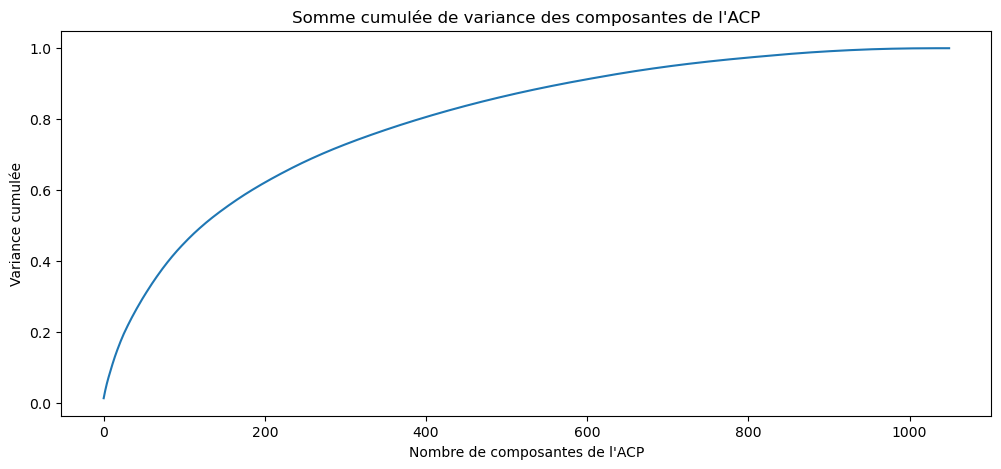

In [139]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(list(range(X.shape[0])),
         np.cumsum(pca.explained_variance_ratio_))


In [140]:
sum_pca = np.cumsum(pca.explained_variance_ratio_)
for counter, value in enumerate(sum_pca):
    if value > 0.80:
        X_reduce = pca.transform(X)[:,:counter]
        break
    

In [141]:
print('nombre de features : {}, variance : {}'.format(counter+1,np.cumsum(pca.explained_variance_ratio_)[counter]))

nombre de features : 393, variance : 0.8004152734016479


In [142]:
X_reduce.shape

(1050, 392)

In [143]:
X_reduce.shape

(1050, 392)

**Export**

In [145]:
np.save('data/X_reduce_NLP.csv', X_reduce)

**Données finales**

In [153]:
from ipywidgets import IntProgress
from ipywidgets import Text
from IPython.display import display
import time
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [154]:


dict_kmeans_nlp = {}

inertia_nlp = {}

max_clusters_nlp=100


f = IntProgress(min=1, max=max_clusters_nlp) # instantiate the bar
chaine = str(1)+'/'+str(max_clusters_nlp)
g = Text(value=chaine)
display(f) # display the bar
display(g)

for k in range(1,max_clusters_nlp):
    kmeans_nlp = KMeans(n_clusters=k,
                   verbose=1,
                   random_state=0).fit(X_reduce)
    inertia_nlp[k] = kmeans_nlp.inertia_
    dict_kmeans_nlp[k] = kmeans_nlp
    f.value = k # signal to increment the progress bar
    g.value =str(k)+'/'+str(max_clusters_nlp)

IntProgress(value=1, min=1)

Text(value='1/100')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 7344497.697940527.
Iteration 1, inertia 4193505.923992808.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6083658.7655803.
Iteration 1, inertia 4193505.923992808.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 8182420.499093252.
Iteration 1, inertia 4193505.923992808.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 16267398.323443409.
Iteration 1, inertia 4193505.923992808.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 18757247.356428593.
Iteration 1, inertia 4193505.923992808.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 21238153.176734526.
Iteration 1, inertia 4193505.923992808.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6735780.127795261.
Iteration 1, inertia 4193505.923992

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 7330147.628076189.
Iteration 1, inertia 4182220.189006277.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 12710052.418066058.
Iteration 1, inertia 4181996.0170343216.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4538255.630182789.
Iteration 1, inertia 4190004.5238191485.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4689766.807999977.
Iteration 1, inertia 4161680.541443085.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4742257.694330169.
Iteration 1, inertia 4183552.6975983926.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4958530.107535287.
Iteration 1, inertia 4188835.0538205327.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4812693.870588575.
Iteration 1, inertia 4166425.8702511755.
Iteration 2, i

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 7268966.553063379.
Iteration 1, inertia 4124206.1679904056.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4279646.124286981.
Iteration 1, inertia 4174088.1844398524.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4317510.604578235.
Iteration 1, inertia 4173082.086302557.
Iteration 2, inertia 4162253.671577677.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 4538613.652888417.
Iteration 1, inertia 4165407.491015139.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4341240.856943678.
Iteration 1, inertia 4126373.4950943957.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4438948.507078162.
Iteration 1, inertia 4153108.6543490035.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4528914.414738466.
Iteration 1, ine

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 6476095.709471622.
Iteration 1, inertia 4110514.2707475107.
Iteration 2, inertia 4110342.2999958014.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 5248260.887586202.
Iteration 1, inertia 4137833.9152104575.
Iteration 2, inertia 4129434.950813156.
Iteration 3, inertia 4127689.208817137.
Iteration 4, inertia 4126784.014538661.
Iteration 5, inertia 4126671.391348875.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 4747584.455709542.
Iteration 1, inertia 4083769.8972988175.
Iteration 2, inertia 4072479.5257386644.
Iteration 3, inertia 4071680.7906327564.
Iteration 4, inertia 4071546.0107718594.
Iteration 5, inertia 4071511.9735087417.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 5600933.544781494.
Iteration 1, inertia 4127079.609964947.
Iteration 2, inertia 4123038.605867629.
Iteration 3, inertia 4121855.8548502554.
Iteration 4, inertia 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 6433104.527730775.
Iteration 1, inertia 4069634.911592646.
Iteration 2, inertia 4069462.9406323936.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 4332016.512767246.
Iteration 1, inertia 4112382.353680143.
Iteration 2, inertia 4111513.814813963.
Iteration 3, inertia 4110273.935374386.
Iteration 4, inertia 4108555.854156815.
Iteration 5, inertia 4107065.258706454.
Iteration 6, inertia 4105801.7825344657.
Iteration 7, inertia 4104901.0092202458.
Iteration 8, inertia 4104368.3757320326.
Iteration 9, inertia 4104353.5450323503.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 4536831.939386026.
Iteration 1, inertia 4113339.5566806435.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4271573.287619591.
Iteration 1, inertia 4071038.1240513045.
Iteration 2, inertia 4070091.861342982.
Converged at iteration 2: strict convergence.
Initialization co

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 4421726.034283216.
Iteration 1, inertia 4065671.622468567.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4280396.419768451.
Iteration 1, inertia 4047252.6851775553.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4175899.474604975.
Iteration 1, inertia 4019633.3657542784.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4376959.089215534.
Iteration 1, inertia 4092371.734149939.
Iteration 2, inertia 4082362.503457747.
Iteration 3, inertia 4073018.232345032.
Iteration 4, inertia 4063955.2891072747.
Iteration 5, inertia 4055385.32959055.
Iteration 6, inertia 4053451.533023477.
Iteration 7, inertia 4052064.1933157705.
Iteration 8, inertia 4050532.335307139.
Iteration 9, inertia 4050514.0021126927.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 4365784.791516519.
Iteration 1, inertia 4083081.4767563

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 4412129.409173605.
Iteration 1, inertia 4056510.0725075444.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4236507.920866527.
Iteration 1, inertia 4062970.214643867.
Iteration 2, inertia 4058457.6972573996.
Iteration 3, inertia 4053351.8754471857.
Iteration 4, inertia 4048290.031279636.
Iteration 5, inertia 4046794.2477523717.
Iteration 6, inertia 4045667.1059609484.
Iteration 7, inertia 4045482.1435197853.
Iteration 8, inertia 4045403.6336405803.
Iteration 9, inertia 4045209.8696673205.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 4334071.513214759.
Iteration 1, inertia 3955534.121624347.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4059271.3172629075.
Iteration 1, inertia 3972314.5083679827.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4408586.909536124.
Iteration 1, inertia 4017427.1

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 4296394.43462569.
Iteration 1, inertia 4044355.3842987204.
Iteration 2, inertia 4039900.620651201.
Iteration 3, inertia 4034685.708099134.
Iteration 4, inertia 4025266.5063358466.
Iteration 5, inertia 4023262.2613072125.
Iteration 6, inertia 4022967.829051172.
Iteration 7, inertia 4022911.908069288.
Iteration 8, inertia 4022911.1216313504.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 4523185.3301375955.
Iteration 1, inertia 4039459.0167481853.
Iteration 2, inertia 4037963.8954179105.
Iteration 3, inertia 4037629.845352822.
Iteration 4, inertia 4037408.070588815.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 4250641.943271375.
Iteration 1, inertia 3952382.7508827797.
Iteration 2, inertia 3949258.511216964.
Iteration 3, inertia 3948556.175807789.
Iteration 4, inertia 3946695.8788595838.
Iteration 5, inertia 3943258.3837359077.
Iteration 6, inertia 3937795.62286561.
Iteration 7,

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 4277296.268361357.
Iteration 1, inertia 4025619.3925677086.
Iteration 2, inertia 4021223.307325351.
Iteration 3, inertia 4016060.4485046593.
Iteration 4, inertia 4006812.7539358167.
Iteration 5, inertia 4004638.993285392.
Iteration 6, inertia 4004265.0184398913.
Iteration 7, inertia 4004209.137325274.
Iteration 8, inertia 4004208.350149553.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 4261428.861829432.
Iteration 1, inertia 3903597.118104755.
Iteration 2, inertia 3902215.7086271355.
Iteration 3, inertia 3902209.737214959.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 4047418.9303792673.
Iteration 1, inertia 3901044.359535309.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4163563.2587092407.
Iteration 1, inertia 4016345.109055373.
Iteration 2, inertia 4015046.9516987014.
Iteration 3, inertia 4013949.304942189.
Iteration 4, inertia 4

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 4252316.159519407.
Iteration 1, inertia 4000988.822482689.
Iteration 2, inertia 3996601.686946739.
Iteration 3, inertia 3991455.980992426.
Iteration 4, inertia 3982214.838780774.
Iteration 5, inertia 3980040.806572926.
Iteration 6, inertia 3979666.8611676064.
Iteration 7, inertia 3979611.0295998184.
Iteration 8, inertia 3979610.241705255.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 4021328.540780489.
Iteration 1, inertia 3887799.85661998.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4072943.216161245.
Iteration 1, inertia 3899561.2481017136.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4142109.2452487745.
Iteration 1, inertia 3935823.521610974.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4077783.2517802874.
Iteration 1, inertia 3921732.2118847882.
Iteration 2

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 4211683.749364294.
Iteration 1, inertia 3960789.886981496.
Iteration 2, inertia 3956422.581429885.
Iteration 3, inertia 3951422.1551001747.
Iteration 4, inertia 3942255.6307174833.
Iteration 5, inertia 3940020.878664728.
Iteration 6, inertia 3939604.896115232.
Iteration 7, inertia 3939506.612602818.
Iteration 8, inertia 3939505.82455877.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 4229729.2596196085.
Iteration 1, inertia 3852672.1497078845.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4159338.1679385323.
Iteration 1, inertia 3972779.0184922405.
Iteration 2, inertia 3970739.2988989707.
Iteration 3, inertia 3966190.3559580706.
Iteration 4, inertia 3964177.081647833.
Iteration 5, inertia 3961862.887801919.
Iteration 6, inertia 3960689.962905437.
Iteration 7, inertia 3958922.710081205.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 41

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 4159018.709846365.
Iteration 1, inertia 3908571.94231486.
Iteration 2, inertia 3904226.149025063.
Iteration 3, inertia 3899329.6373060467.
Iteration 4, inertia 3890241.66911753.
Iteration 5, inertia 3887956.827048634.
Iteration 6, inertia 3887488.7622320396.
Iteration 7, inertia 3887390.72073638.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 4162890.809443692.
Iteration 1, inertia 3845024.963360238.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4083094.964126155.
Iteration 1, inertia 3845115.2971740845.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4029068.6431990094.
Iteration 1, inertia 3855754.9740454056.
Iteration 2, inertia 3854507.4243805674.
Iteration 3, inertia 3852290.7460591695.
Iteration 4, inertia 3850724.1077172877.
Iteration 5, inertia 3849662.259511081.
Iteration 6, inertia 3848047.5810837955.
Iteration 7, inertia 384

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 3958510.5305663673.
Iteration 1, inertia 3775492.166215634.
Iteration 2, inertia 3771254.9868354.
Iteration 3, inertia 3770947.520232968.
Iteration 4, inertia 3767537.335517005.
Iteration 5, inertia 3763373.113649738.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 4032104.359871705.
Iteration 1, inertia 3846200.142990463.
Iteration 2, inertia 3844233.2993332827.
Iteration 3, inertia 3842419.341222411.
Iteration 4, inertia 3841151.84859322.
Iteration 5, inertia 3839743.1962708454.
Iteration 6, inertia 3833563.0920024384.
Iteration 7, inertia 3825320.2789210463.
Iteration 8, inertia 3818500.2634621533.
Iteration 9, inertia 3816480.250214438.
Iteration 10, inertia 3816078.1462952304.
Iteration 11, inertia 3815980.09815184.
Iteration 12, inertia 3815978.224951296.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 3969864.988495536.
Iteration 1, inertia 3804635.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 4078917.177897384.
Iteration 1, inertia 3829242.2633071295.
Iteration 2, inertia 3824962.1051923404.
Iteration 3, inertia 3820460.488119756.
Iteration 4, inertia 3812081.16577398.
Iteration 5, inertia 3808756.379016413.
Iteration 6, inertia 3808325.40892279.
Iteration 7, inertia 3808216.4188293973.
Iteration 8, inertia 3808167.6633342705.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 3932393.0679191547.
Iteration 1, inertia 3768603.8571048896.
Iteration 2, inertia 3760026.2675496945.
Iteration 3, inertia 3758024.0119166677.
Iteration 4, inertia 3757800.723431681.
Iteration 5, inertia 3757798.842938629.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 4017674.208083517.
Iteration 1, inertia 3838659.229818121.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3985344.4904833883.
Iteration 1, inertia 3773886.5060711396.
Iteration 2, inertia 3

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 4044298.0374380075.
Iteration 1, inertia 3795005.7986298017.
Iteration 2, inertia 3790739.1458224053.
Iteration 3, inertia 3786259.6787215616.
Iteration 4, inertia 3777980.565279631.
Iteration 5, inertia 3774577.2304242253.
Iteration 6, inertia 3774147.245323082.
Iteration 7, inertia 3774038.762876975.
Iteration 8, inertia 3773989.949216875.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 3841427.2852788945.
Iteration 1, inertia 3758341.358968998.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4102876.2481988114.
Iteration 1, inertia 3776568.7597946296.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3934329.648808152.
Iteration 1, inertia 3780703.3980239024.
Iteration 2, inertia 3775806.1643345132.
Iteration 3, inertia 3768091.818070031.
Iteration 4, inertia 3745968.897461865.
Iteration 5, inertia 3745324.8028894793.
Converged at iterat

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 4021084.745452543.
Iteration 1, inertia 3772193.3783318005.
Iteration 2, inertia 3767981.491541021.
Iteration 3, inertia 3763655.251823003.
Iteration 4, inertia 3755275.2407525913.
Iteration 5, inertia 3751824.2227239734.
Iteration 6, inertia 3751395.181584464.
Iteration 7, inertia 3751287.175267788.
Iteration 8, inertia 3751238.3030485474.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 3948442.4110462666.
Iteration 1, inertia 3754287.815625417.
Iteration 2, inertia 3753999.083456029.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3926527.922661468.
Iteration 1, inertia 3734072.2587489863.
Iteration 2, inertia 3732572.598702908.
Iteration 3, inertia 3732076.6246748487.
Iteration 4, inertia 3731500.0259031635.
Iteration 5, inertia 3730121.916418004.
Iteration 6, inertia 3728794.33654679.
Iteration 7, inertia 3723599.4507461437.
Iteration 8, inertia 3721542.0971720195.
Iteration 9

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3997632.580735675.
Iteration 1, inertia 3752513.460575528.
Iteration 2, inertia 3748354.0739800734.
Iteration 3, inertia 3744237.017512725.
Iteration 4, inertia 3736137.704984305.
Iteration 5, inertia 3732275.288223918.
Iteration 6, inertia 3731799.957646882.
Iteration 7, inertia 3731688.3269752814.
Iteration 8, inertia 3731638.689795276.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 4050467.209703082.
Iteration 1, inertia 3762681.702883443.
Iteration 2, inertia 3759858.6845523743.
Iteration 3, inertia 3758715.6364580165.
Iteration 4, inertia 3753531.927389667.
Iteration 5, inertia 3744080.5350028053.
Iteration 6, inertia 3736255.155340016.
Iteration 7, inertia 3734143.1343654445.
Iteration 8, inertia 3733717.8947831714.
Iteration 9, inertia 3733677.638197515.
Iteration 10, inertia 3733662.5115182893.
Iteration 11, inertia 3733660.3650155803.
Iteration 12, inertia 3733659.568470732.
Converged at iteration 12: strict conv

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3970916.482649531.
Iteration 1, inertia 3726125.902557483.
Iteration 2, inertia 3721973.2441316554.
Iteration 3, inertia 3717941.082622424.
Iteration 4, inertia 3709849.8920936696.
Iteration 5, inertia 3705905.7572590825.
Iteration 6, inertia 3705430.0301540354.
Iteration 7, inertia 3705318.3844895954.
Iteration 8, inertia 3705268.6829729346.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 3910535.5026418073.
Iteration 1, inertia 3739291.017170301.
Iteration 2, inertia 3722804.8809728795.
Iteration 3, inertia 3716061.850324434.
Iteration 4, inertia 3714902.066406335.
Iteration 5, inertia 3714656.2278734604.
Iteration 6, inertia 3714572.6553052384.
Iteration 7, inertia 3714570.496283239.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 3755173.720490574.
Iteration 1, inertia 3685946.7870072005.
Iteration 2, inertia 3683767.1521472307.
Iteration 3, inertia 3682968.1868929556.
Iterati

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3910045.7547803335.
Iteration 1, inertia 3665685.8366382956.
Iteration 2, inertia 3661653.814620044.
Iteration 3, inertia 3657609.035902445.
Iteration 4, inertia 3649672.857019405.
Iteration 5, inertia 3645562.244880666.
Iteration 6, inertia 3645088.566451044.
Iteration 7, inertia 3644977.8145347214.
Iteration 8, inertia 3644928.0524315927.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 3866640.58228534.
Iteration 1, inertia 3711750.0050709248.
Iteration 2, inertia 3711382.5437191017.
Iteration 3, inertia 3710983.2124255504.
Iteration 4, inertia 3710337.8791399905.
Iteration 5, inertia 3709902.316211979.
Iteration 6, inertia 3709571.605527985.
Iteration 7, inertia 3709285.2733853776.
Iteration 8, inertia 3708973.082282425.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 3786819.6447066413.
Iteration 1, inertia 3624451.3376897364.
Iteration 2, inertia 3620535.9436508236.
Iteration

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3868401.081253172.
Iteration 1, inertia 3624366.6577014118.
Iteration 2, inertia 3620342.703226194.
Iteration 3, inertia 3616310.787447243.
Iteration 4, inertia 3608431.8104944606.
Iteration 5, inertia 3604274.5871884744.
Iteration 6, inertia 3603801.004290024.
Iteration 7, inertia 3603690.4273628695.
Iteration 8, inertia 3603640.6011951417.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 3750552.027879094.
Iteration 1, inertia 3666598.7305995454.
Iteration 2, inertia 3665986.9031645963.
Iteration 3, inertia 3665429.9280973785.
Iteration 4, inertia 3665051.141558004.
Iteration 5, inertia 3664227.572688325.
Iteration 6, inertia 3663424.5832812754.
Iteration 7, inertia 3661866.5297719887.
Iteration 8, inertia 3660765.798704573.
Iteration 9, inertia 3659965.297736028.
Iteration 10, inertia 3659026.924758479.
Iteration 11, inertia 3658769.024754922.
Iteration 12, inertia 3658734.2013273034.
Converged at iteration 12: strict co

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3820006.0030011684.
Iteration 1, inertia 3636802.571191137.
Iteration 2, inertia 3634076.663314676.
Iteration 3, inertia 3633165.8793789083.
Iteration 4, inertia 3631214.608739576.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3767549.059758081.
Iteration 1, inertia 3640441.0740073984.
Iteration 2, inertia 3638901.116157525.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3781769.3613421074.
Iteration 1, inertia 3590967.874552552.
Iteration 2, inertia 3575390.1525479327.
Iteration 3, inertia 3562428.894590609.
Iteration 4, inertia 3556921.3609718448.
Iteration 5, inertia 3550446.8999885553.
Iteration 6, inertia 3549025.0247853342.
Iteration 7, inertia 3548858.8106622864.
Iteration 8, inertia 3548829.8787655826.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 3801200.1969594504.
Iteration 1, inertia 3608463.522088524.
Iteration 2, inerti

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3812867.1140203513.
Iteration 1, inertia 3629894.002869647.
Iteration 2, inertia 3627167.6768844654.
Iteration 3, inertia 3626256.6487907395.
Iteration 4, inertia 3624305.367146233.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3699470.052904543.
Iteration 1, inertia 3577838.931490669.
Iteration 2, inertia 3576006.6068736054.
Iteration 3, inertia 3569622.723151038.
Iteration 4, inertia 3566341.213464427.
Iteration 5, inertia 3563419.3002658365.
Iteration 6, inertia 3556262.581335517.
Iteration 7, inertia 3551864.790964321.
Iteration 8, inertia 3551401.711765028.
Iteration 9, inertia 3551266.944476507.
Iteration 10, inertia 3551190.9646801357.
Iteration 11, inertia 3551189.7154992707.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 3640822.4162084395.
Iteration 1, inertia 3573526.7666074056.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inert

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3761884.178384181.
Iteration 1, inertia 3579289.489188183.
Iteration 2, inertia 3576562.3488460216.
Iteration 3, inertia 3575650.679256917.
Iteration 4, inertia 3573699.3883487135.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3728874.966873223.
Iteration 1, inertia 3526387.1776568945.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3665659.9731341363.
Iteration 1, inertia 3461957.5277823685.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3699832.0549641275.
Iteration 1, inertia 3498385.586822915.
Iteration 2, inertia 3491156.158296166.
Iteration 3, inertia 3489797.707322313.
Iteration 4, inertia 3484028.8650698164.
Iteration 5, inertia 3473360.8171733413.
Iteration 6, inertia 3468840.6394331167.
Iteration 7, inertia 3468388.912709252.
Iteration 8, inertia 3468283.650247027.
Iteration 9, inertia 3468254.416457939.
Converged at iteratio

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3698382.859864858.
Iteration 1, inertia 3516100.8074874617.
Iteration 2, inertia 3513373.078131753.
Iteration 3, inertia 3512461.0771334316.
Iteration 4, inertia 3510509.775562557.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3694700.21840684.
Iteration 1, inertia 3458684.1034364183.
Iteration 2, inertia 3455857.788525784.
Iteration 3, inertia 3454779.40706194.
Iteration 4, inertia 3454453.673841244.
Iteration 5, inertia 3454307.3591727214.
Iteration 6, inertia 3454252.6076774513.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3669998.410766109.
Iteration 1, inertia 3494461.2553484384.
Iteration 2, inertia 3486386.3267956222.
Iteration 3, inertia 3479866.6995630283.
Iteration 4, inertia 3478199.3864734233.
Iteration 5, inertia 3477684.519012831.
Iteration 6, inertia 3477503.701380613.
Iteration 7, inertia 3477260.3946032883.
Iteration 8, inertia 3477156.654665755.
Iteration 9,

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3689832.345775104.
Iteration 1, inertia 3507107.5330344927.
Iteration 2, inertia 3504379.075386127.
Iteration 3, inertia 3503466.730772867.
Iteration 4, inertia 3501515.406380032.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3538415.7603929774.
Iteration 1, inertia 3434697.096513317.
Iteration 2, inertia 3434340.7299926826.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3845423.5908103255.
Iteration 1, inertia 3545607.139380561.
Iteration 2, inertia 3540173.3133406728.
Iteration 3, inertia 3531848.859610967.
Iteration 4, inertia 3519415.0513882535.
Iteration 5, inertia 3514932.404642534.
Iteration 6, inertia 3514717.3247412043.
Iteration 7, inertia 3514694.352710262.
Iteration 8, inertia 3514690.767031818.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 3675740.4431405207.
Iteration 1, inertia 3429372.535678157.
Converged at iteration

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3658339.6159861623.
Iteration 1, inertia 3498978.76376034.
Iteration 2, inertia 3488658.7175880354.
Iteration 3, inertia 3481192.2096484513.
Iteration 4, inertia 3475694.440901385.
Iteration 5, inertia 3470641.017422702.
Iteration 6, inertia 3468222.5339759826.
Iteration 7, inertia 3467954.4685379593.
Iteration 8, inertia 3467785.5280759153.
Iteration 9, inertia 3467651.1139597655.
Iteration 10, inertia 3467575.459573736.
Iteration 11, inertia 3467569.833926207.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 3626909.431426085.
Iteration 1, inertia 3424556.085950377.
Iteration 2, inertia 3421665.143973144.
Iteration 3, inertia 3418092.936157502.
Iteration 4, inertia 3417300.607568207.
Iteration 5, inertia 3416968.997407605.
Iteration 6, inertia 3416816.7811251106.
Iteration 7, inertia 3416067.571489149.
Iteration 8, inertia 3413790.502572252.
Iteration 9, inertia 3412420.48815659.
Iteration 10, inertia 3408771.493024026.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3634284.825476699.
Iteration 1, inertia 3475292.9597073803.
Iteration 2, inertia 3465324.238988385.
Iteration 3, inertia 3457963.3579831985.
Iteration 4, inertia 3452523.243751676.
Iteration 5, inertia 3447384.032494275.
Iteration 6, inertia 3444887.4356481708.
Iteration 7, inertia 3444619.3702101475.
Iteration 8, inertia 3444450.429748104.
Iteration 9, inertia 3444316.015631954.
Iteration 10, inertia 3444240.3612459237.
Iteration 11, inertia 3444234.735598395.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 3517040.7701301025.
Iteration 1, inertia 3365642.1272262433.
Iteration 2, inertia 3363659.624292272.
Iteration 3, inertia 3362930.719204685.
Iteration 4, inertia 3361923.7858620463.
Iteration 5, inertia 3355847.2674057.
Iteration 6, inertia 3351309.182276495.
Iteration 7, inertia 3348103.7516288552.
Iteration 8, inertia 3343922.2856924813.
Iteration 9, inertia 3342212.17539081.
Iteration 10, inertia 3341956.7432630695

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3615434.864690856.
Iteration 1, inertia 3456661.199345043.
Iteration 2, inertia 3446700.477541148.
Iteration 3, inertia 3439349.047881598.
Iteration 4, inertia 3433945.6698255576.
Iteration 5, inertia 3428777.7845949093.
Iteration 6, inertia 3426278.4358328464.
Iteration 7, inertia 3426009.3431694694.
Iteration 8, inertia 3425840.0294862096.
Iteration 9, inertia 3425705.5848013563.
Iteration 10, inertia 3425629.775762639.
Iteration 11, inertia 3425624.1379623297.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 3561267.3776675537.
Iteration 1, inertia 3360589.6817788505.
Iteration 2, inertia 3358110.234213888.
Iteration 3, inertia 3354769.9549971255.
Iteration 4, inertia 3350113.6959135015.
Iteration 5, inertia 3346243.9101594407.
Iteration 6, inertia 3346216.9676753692.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3474988.316413801.
Iteration 1, inertia 3404578.90893947.
Itera

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3607772.1032808735.
Iteration 1, inertia 3449187.1064806324.
Iteration 2, inertia 3439233.033498453.
Iteration 3, inertia 3431886.8422763543.
Iteration 4, inertia 3426522.2737005656.
Iteration 5, inertia 3421313.544240468.
Iteration 6, inertia 3418808.3542395337.
Iteration 7, inertia 3418538.0057038725.
Iteration 8, inertia 3418368.2310673753.
Iteration 9, inertia 3418233.3653691704.
Iteration 10, inertia 3418157.424960224.
Iteration 11, inertia 3418151.7750237756.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 3472607.634491313.
Iteration 1, inertia 3349481.705413769.
Iteration 2, inertia 3347075.3888086816.
Iteration 3, inertia 3345472.946017655.
Iteration 4, inertia 3345324.91426518.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3544531.032724214.
Iteration 1, inertia 3364637.052050969.
Iteration 2, inertia 3361591.829162025.
Iteration 3, inertia 3359066.558021334.
Iteratio

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3590009.2138991095.
Iteration 1, inertia 3431682.5319970762.
Iteration 2, inertia 3421742.7847961746.
Iteration 3, inertia 3414412.1042855037.
Iteration 4, inertia 3409063.6369607155.
Iteration 5, inertia 3403865.5197961116.
Iteration 6, inertia 3401382.650856207.
Iteration 7, inertia 3401085.271636639.
Iteration 8, inertia 3400916.1237119953.
Iteration 9, inertia 3400781.8635238535.
Iteration 10, inertia 3400706.0441222503.
Iteration 11, inertia 3400700.3827597913.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 3460291.3385156016.
Iteration 1, inertia 3285403.681003535.
Iteration 2, inertia 3284151.6698342.
Iteration 3, inertia 3283823.693998204.
Iteration 4, inertia 3283749.1512948223.
Iteration 5, inertia 3283712.8816928114.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 3450172.92809005.
Iteration 1, inertia 3352754.8559029726.
Iteration 2, inertia 3351768.071772011.
Iterat

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3556709.440907908.
Iteration 1, inertia 3398945.732706616.
Iteration 2, inertia 3389225.6828513537.
Iteration 3, inertia 3382285.2595374826.
Iteration 4, inertia 3377772.7065611626.
Iteration 5, inertia 3372164.490373252.
Iteration 6, inertia 3369050.172090329.
Iteration 7, inertia 3368585.7801452246.
Iteration 8, inertia 3368375.7696351367.
Iteration 9, inertia 3368302.813430829.
Iteration 10, inertia 3368209.7839398882.
Iteration 11, inertia 3368167.0162259187.
Iteration 12, inertia 3368163.4235920534.
Iteration 13, inertia 3368157.740824973.
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 3438909.4388360167.
Iteration 1, inertia 3301233.0005320823.
Iteration 2, inertia 3289987.697795253.
Iteration 3, inertia 3283995.3006125395.
Iteration 4, inertia 3281506.5250381464.
Iteration 5, inertia 3280847.529844649.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 3475878.9095155783.
It

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3532217.2709782366.
Iteration 1, inertia 3374711.4652226074.
Iteration 2, inertia 3365003.4604884675.
Iteration 3, inertia 3358078.119272316.
Iteration 4, inertia 3353768.1308221547.
Iteration 5, inertia 3348162.6990039563.
Iteration 6, inertia 3344951.4989382955.
Iteration 7, inertia 3344424.536776875.
Iteration 8, inertia 3344218.2668304937.
Iteration 9, inertia 3344154.0534107047.
Iteration 10, inertia 3344118.710070323.
Iteration 11, inertia 3344115.946452267.
Iteration 12, inertia 3344050.827005485.
Iteration 13, inertia 3344008.1919608805.
Iteration 14, inertia 3344004.854765184.
Iteration 15, inertia 3343999.160315458.
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 3434827.110610248.
Iteration 1, inertia 3312488.4804515224.
Iteration 2, inertia 3309625.6631771675.
Iteration 3, inertia 3306958.191882179.
Iteration 4, inertia 3305607.2361168507.
Iteration 5, inertia 3304816.119008523.
Iteration 6, inertia 3302291.19

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3485688.989090587.
Iteration 1, inertia 3331134.9229737697.
Iteration 2, inertia 3322042.284172752.
Iteration 3, inertia 3315831.0876305234.
Iteration 4, inertia 3313821.344511962.
Iteration 5, inertia 3310108.7526233895.
Iteration 6, inertia 3305840.8981868774.
Iteration 7, inertia 3302536.9542943635.
Iteration 8, inertia 3301902.2939414424.
Iteration 9, inertia 3301793.78375982.
Iteration 10, inertia 3301790.9137140242.
Iteration 11, inertia 3301744.069124982.
Iteration 12, inertia 3301686.9717317168.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 3397843.6337596495.
Iteration 1, inertia 3226403.632733877.
Iteration 2, inertia 3225959.427233313.
Iteration 3, inertia 3225880.6201602863.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 3413385.003546351.
Iteration 1, inertia 3312511.2063249527.
Iteration 2, inertia 3304488.9172345074.
Iteration 3, inertia 3299785.809176808.
Itera

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3477219.3328270935.
Iteration 1, inertia 3322787.4199425736.
Iteration 2, inertia 3313567.606391274.
Iteration 3, inertia 3307467.6305217077.
Iteration 4, inertia 3305446.592578464.
Iteration 5, inertia 3301332.7998740408.
Iteration 6, inertia 3296986.7837250186.
Iteration 7, inertia 3294085.4969445686.
Iteration 8, inertia 3293605.0046323356.
Iteration 9, inertia 3293558.6871660943.
Iteration 10, inertia 3293512.051783387.
Iteration 11, inertia 3293454.8359793425.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 3260692.2277825116.
Iteration 1, inertia 3191541.1932913065.
Iteration 2, inertia 3181183.366355252.
Iteration 3, inertia 3178630.989995103.
Iteration 4, inertia 3175244.3117310787.
Iteration 5, inertia 3173532.2610599534.
Iteration 6, inertia 3172638.5541570024.
Iteration 7, inertia 3172604.7627976285.
Iteration 8, inertia 3172593.1843021074.
Converged at iteration 8: strict convergence.
Initialization complete
I

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3448826.8092555795.
Iteration 1, inertia 3294667.0133173037.
Iteration 2, inertia 3285602.3841759833.
Iteration 3, inertia 3279479.7749576317.
Iteration 4, inertia 3277539.720707187.
Iteration 5, inertia 3273850.8094425956.
Iteration 6, inertia 3269704.050204007.
Iteration 7, inertia 3266417.29084881.
Iteration 8, inertia 3265653.2639159905.
Iteration 9, inertia 3265540.6043152018.
Iteration 10, inertia 3265538.701646746.
Iteration 11, inertia 3265492.5160093284.
Iteration 12, inertia 3265435.1825144524.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 3283717.0653148377.
Iteration 1, inertia 3151235.598655907.
Iteration 2, inertia 3148253.81412217.
Iteration 3, inertia 3147591.5791921015.
Iteration 4, inertia 3147046.2542736.
Iteration 5, inertia 3146924.151159888.
Iteration 6, inertia 3146922.8416804615.
Iteration 7, inertia 3146921.0072402847.
Converged at iteration 7: strict convergence.
Initialization complete
Iterati

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3437164.7123614326.
Iteration 1, inertia 3283242.673408145.
Iteration 2, inertia 3274183.545364797.
Iteration 3, inertia 3268120.6488896175.
Iteration 4, inertia 3266204.0572156697.
Iteration 5, inertia 3262650.2832596432.
Iteration 6, inertia 3258403.94976478.
Iteration 7, inertia 3255015.2289807824.
Iteration 8, inertia 3254248.9011809514.
Iteration 9, inertia 3254134.1244645687.
Iteration 10, inertia 3254130.750736787.
Iteration 11, inertia 3254084.6734722625.
Iteration 12, inertia 3254027.2194613214.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 3294893.3729221183.
Iteration 1, inertia 3134526.965487558.
Iteration 2, inertia 3128424.418681106.
Iteration 3, inertia 3121032.6726464448.
Iteration 4, inertia 3115690.40042027.
Iteration 5, inertia 3113663.4817803423.
Iteration 6, inertia 3111455.412263995.
Iteration 7, inertia 3109283.840689264.
Iteration 8, inertia 3097799.038045138.
Converged at iteration 8: strict con

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3398264.4493914316.
Iteration 1, inertia 3244912.2292842166.
Iteration 2, inertia 3235893.1301898686.
Iteration 3, inertia 3229891.4446528764.
Iteration 4, inertia 3227978.823170836.
Iteration 5, inertia 3224626.7028908464.
Iteration 6, inertia 3220714.1948585473.
Iteration 7, inertia 3217255.6116814828.
Iteration 8, inertia 3216129.9245189456.
Iteration 9, inertia 3216028.9686132097.
Iteration 10, inertia 3216006.6500537284.
Iteration 11, inertia 3216005.313314276.
Iteration 12, inertia 3215985.819186164.
Iteration 13, inertia 3215963.8941914104.
Iteration 14, inertia 3215937.0553803868.
Iteration 15, inertia 3215906.221517529.
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 3263226.288489504.
Iteration 1, inertia 3197278.4688990135.
Iteration 2, inertia 3193337.8682103683.
Iteration 3, inertia 3192157.3404333596.
Iteration 4, inertia 3187115.6132994094.
Iteration 5, inertia 3181015.15959999.
Iteration 6, inertia 3176570

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3378963.694456724.
Iteration 1, inertia 3225837.784119918.
Iteration 2, inertia 3216826.0328408643.
Iteration 3, inertia 3210870.451243048.
Iteration 4, inertia 3209066.8854403365.
Iteration 5, inertia 3205873.4188600914.
Iteration 6, inertia 3201891.8896171916.
Iteration 7, inertia 3198383.566281419.
Iteration 8, inertia 3197154.9820334325.
Iteration 9, inertia 3197007.5695873857.
Iteration 10, inertia 3196972.388513968.
Iteration 11, inertia 3196971.128325587.
Iteration 12, inertia 3196951.718653857.
Iteration 13, inertia 3196929.845304313.
Iteration 14, inertia 3196903.245237809.
Iteration 15, inertia 3196872.345912277.
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 3242358.2467025677.
Iteration 1, inertia 3089490.9033557423.
Iteration 2, inertia 3085892.5192710334.
Iteration 3, inertia 3085654.4506681464.
Iteration 4, inertia 3083485.434094655.
Iteration 5, inertia 3079200.9696460096.
Iteration 6, inertia 3077949.064

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3360386.264785864.
Iteration 1, inertia 3207474.1940515633.
Iteration 2, inertia 3198440.563649363.
Iteration 3, inertia 3192482.433884332.
Iteration 4, inertia 3190679.5110796806.
Iteration 5, inertia 3187484.91703151.
Iteration 6, inertia 3183503.3877886096.
Iteration 7, inertia 3179995.064452837.
Iteration 8, inertia 3178766.480204851.
Iteration 9, inertia 3178619.0677588037.
Iteration 10, inertia 3178583.8866853863.
Iteration 11, inertia 3178582.626497006.
Iteration 12, inertia 3178563.216825275.
Iteration 13, inertia 3178541.343475732.
Iteration 14, inertia 3178514.7434092276.
Iteration 15, inertia 3178483.844083695.
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 3251250.1162321516.
Iteration 1, inertia 3091583.9151159488.
Iteration 2, inertia 3084732.867805695.
Iteration 3, inertia 3084394.4941281714.
Iteration 4, inertia 3084382.3203251245.
Converged at iteration 4: strict convergence.
Initialization complete
Iter

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3336857.2288356256.
Iteration 1, inertia 3184193.155927884.
Iteration 2, inertia 3175166.779026215.
Iteration 3, inertia 3169211.2712505437.
Iteration 4, inertia 3167419.11784593.
Iteration 5, inertia 3164241.224176483.
Iteration 6, inertia 3160337.9168970715.
Iteration 7, inertia 3156911.8184491256.
Iteration 8, inertia 3155547.0076096845.
Iteration 9, inertia 3155398.985204008.
Iteration 10, inertia 3155363.853067137.
Iteration 11, inertia 3155362.840983144.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 3232383.060237701.
Iteration 1, inertia 3099182.290544195.
Iteration 2, inertia 3098260.504746223.
Iteration 3, inertia 3097301.58884435.
Iteration 4, inertia 3091837.814873818.
Iteration 5, inertia 3085116.944352854.
Iteration 6, inertia 3081806.9224982513.
Iteration 7, inertia 3077544.756971611.
Iteration 8, inertia 3074710.649959421.
Iteration 9, inertia 3074494.062948306.
Iteration 10, inertia 3074429.257727615.
It

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3305740.392479069.
Iteration 1, inertia 3153344.509255308.
Iteration 2, inertia 3144357.006531745.
Iteration 3, inertia 3138379.1478252.
Iteration 4, inertia 3136647.292653366.
Iteration 5, inertia 3133629.133170647.
Iteration 6, inertia 3129709.135914014.
Iteration 7, inertia 3126254.5531362197.
Iteration 8, inertia 3124823.3035604316.
Iteration 9, inertia 3124652.3139391225.
Iteration 10, inertia 3124606.877413864.
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 3238583.901432947.
Iteration 1, inertia 3112589.8215526184.
Iteration 2, inertia 3105033.1143106967.
Iteration 3, inertia 3104595.3425797294.
Iteration 4, inertia 3104565.808174732.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3234724.2861563074.
Iteration 1, inertia 3149175.8133637724.
Iteration 2, inertia 3139620.443478083.
Iteration 3, inertia 3134385.3664270244.
Iteration 4, inertia 3130301.0680397036.
Iteration 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3291439.4033976574.
Iteration 1, inertia 3139263.0943334918.
Iteration 2, inertia 3130365.043499954.
Iteration 3, inertia 3124449.2622802416.
Iteration 4, inertia 3122649.9257170768.
Iteration 5, inertia 3119807.462617839.
Iteration 6, inertia 3115884.770464831.
Iteration 7, inertia 3112389.998471633.
Iteration 8, inertia 3110834.904855345.
Iteration 9, inertia 3110616.862421826.
Iteration 10, inertia 3110571.3264620695.
Iteration 11, inertia 3110570.311106621.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 3191389.2005669125.
Iteration 1, inertia 3027718.4632374756.
Iteration 2, inertia 3027441.7274640254.
Iteration 3, inertia 3027181.479711948.
Iteration 4, inertia 3026822.748671209.
Iteration 5, inertia 3026567.7301649596.
Iteration 6, inertia 3026506.6119595002.
Iteration 7, inertia 3026066.499420283.
Iteration 8, inertia 3025192.8929949426.
Converged at iteration 8: strict convergence.
Initialization complete
Iterat

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3274616.259665943.
Iteration 1, inertia 3122675.2656189525.
Iteration 2, inertia 3113837.023753002.
Iteration 3, inertia 3108065.845889754.
Iteration 4, inertia 3106209.3376376177.
Iteration 5, inertia 3103458.1601622347.
Iteration 6, inertia 3099743.4125842825.
Iteration 7, inertia 3096160.7235320136.
Iteration 8, inertia 3094362.2898971546.
Iteration 9, inertia 3094075.752232801.
Iteration 10, inertia 3094029.2200721493.
Iteration 11, inertia 3094028.1995722847.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 3129508.952245333.
Iteration 1, inertia 3038027.9283972643.
Iteration 2, inertia 3034547.6696566087.
Iteration 3, inertia 3033440.2021962167.
Iteration 4, inertia 3033161.351565554.
Iteration 5, inertia 3033035.9923695927.
Iteration 6, inertia 3032642.53995757.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3150895.874159951.
Iteration 1, inertia 3056046.103191405.
Iterat

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3258169.775260767.
Iteration 1, inertia 3106438.0602699155.
Iteration 2, inertia 3097604.464546825.
Iteration 3, inertia 3091838.05756742.
Iteration 4, inertia 3089988.192430526.
Iteration 5, inertia 3087246.95367625.
Iteration 6, inertia 3083596.482141326.
Iteration 7, inertia 3080005.298846206.
Iteration 8, inertia 3078160.4650386306.
Iteration 9, inertia 3077873.6700577643.
Iteration 10, inertia 3077827.1221267707.
Iteration 11, inertia 3077826.099675874.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 3244549.9746321156.
Iteration 1, inertia 3081656.9451588136.
Iteration 2, inertia 3077449.887502177.
Iteration 3, inertia 3074243.3020513672.
Iteration 4, inertia 3071048.100846885.
Iteration 5, inertia 3066449.486294831.
Iteration 6, inertia 3063818.5319768726.
Iteration 7, inertia 3062201.9174122578.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 3127014.9540321883.
Iteration

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3233288.308651729.
Iteration 1, inertia 3081793.2007209887.
Iteration 2, inertia 3072967.0925140167.
Iteration 3, inertia 3067246.611962211.
Iteration 4, inertia 3065366.119470841.
Iteration 5, inertia 3062731.8510977873.
Iteration 6, inertia 3059099.776440969.
Iteration 7, inertia 3055498.6112964763.
Iteration 8, inertia 3053645.288479419.
Iteration 9, inertia 3053289.0506903394.
Iteration 10, inertia 3053242.6182734715.
Iteration 11, inertia 3053241.594304528.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 2988510.3277398283.
Iteration 1, inertia 2906444.3831129563.
Iteration 2, inertia 2900892.969947132.
Iteration 3, inertia 2898289.4533934086.
Iteration 4, inertia 2894359.1354957656.
Iteration 5, inertia 2888573.101765629.
Iteration 6, inertia 2886762.930128367.
Iteration 7, inertia 2886474.5886317147.
Iteration 8, inertia 2886410.175403459.
Converged at iteration 8: strict convergence.
Initialization complete
Iterat

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3214631.924213545.
Iteration 1, inertia 3063342.82800327.
Iteration 2, inertia 3054519.2652619258.
Iteration 3, inertia 3048802.646941028.
Iteration 4, inertia 3046926.8723608633.
Iteration 5, inertia 3044299.4067003247.
Iteration 6, inertia 3040727.497195173.
Iteration 7, inertia 3037182.208861405.
Iteration 8, inertia 3035217.016140295.
Iteration 9, inertia 3034860.002602307.
Iteration 10, inertia 3034813.4582574274.
Iteration 11, inertia 3034812.4320164113.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 3089525.756630784.
Iteration 1, inertia 2954629.739245534.
Iteration 2, inertia 2948344.098160109.
Iteration 3, inertia 2943611.0141846337.
Iteration 4, inertia 2940886.4490987607.
Iteration 5, inertia 2940461.420205474.
Iteration 6, inertia 2940283.9056287403.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3121541.0428741975.
Iteration 1, inertia 2995448.097658989.
Iteration

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3185144.7641831622.
Iteration 1, inertia 3034537.3714508303.
Iteration 2, inertia 3026071.177536027.
Iteration 3, inertia 3020451.3434261163.
Iteration 4, inertia 3018482.9640344796.
Iteration 5, inertia 3016856.4326118226.
Iteration 6, inertia 3013427.984759161.
Iteration 7, inertia 3009453.4744854504.
Iteration 8, inertia 3006854.618675324.
Iteration 9, inertia 3006355.360365438.
Iteration 10, inertia 3006263.9884460634.
Iteration 11, inertia 3006241.7613215456.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 3073977.9801599067.
Iteration 1, inertia 2974428.016715667.
Iteration 2, inertia 2974190.0816557114.
Iteration 3, inertia 2973274.702676253.
Iteration 4, inertia 2971503.6772240335.
Iteration 5, inertia 2969896.8363682833.
Iteration 6, inertia 2967569.3440796053.
Iteration 7, inertia 2965722.8216063106.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 3071153.4899819167.
It

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3150683.553671564.
Iteration 1, inertia 3000284.886531445.
Iteration 2, inertia 2991833.0210283017.
Iteration 3, inertia 2986254.7137018302.
Iteration 4, inertia 2984320.1800343795.
Iteration 5, inertia 2983016.3972906624.
Iteration 6, inertia 2979569.1420138534.
Iteration 7, inertia 2975689.9083909336.
Iteration 8, inertia 2972930.771653236.
Iteration 9, inertia 2972235.0512614767.
Iteration 10, inertia 2972146.0350774415.
Iteration 11, inertia 2972134.3523177593.
Iteration 12, inertia 2972114.8246488217.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 3008481.079312618.
Iteration 1, inertia 2905885.665488327.
Iteration 2, inertia 2903055.2968958016.
Iteration 3, inertia 2898475.174231102.
Iteration 4, inertia 2896954.560309432.
Iteration 5, inertia 2894751.3522323095.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 3032273.4581909887.
Iteration 1, inertia 2897607.873609308.
Ite

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3126514.145899779.
Iteration 1, inertia 2976413.974237781.
Iteration 2, inertia 2967975.330764429.
Iteration 3, inertia 2962410.05373706.
Iteration 4, inertia 2960485.3996723117.
Iteration 5, inertia 2959338.387623297.
Iteration 6, inertia 2956281.1119673843.
Iteration 7, inertia 2952846.5574915786.
Iteration 8, inertia 2949795.45436372.
Iteration 9, inertia 2948601.0628087306.
Iteration 10, inertia 2948479.820300893.
Iteration 11, inertia 2948413.173926139.
Iteration 12, inertia 2948410.8134735706.
Iteration 13, inertia 2948391.2450351287.
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 3063690.2126609907.
Iteration 1, inertia 2978693.418067147.
Iteration 2, inertia 2972809.2956294883.
Iteration 3, inertia 2971036.8024489144.
Iteration 4, inertia 2969934.563938303.
Iteration 5, inertia 2969484.9230656647.
Iteration 6, inertia 2968177.061526657.
Iteration 7, inertia 2967330.0511286347.
Iteration 8, inertia 2966075.8133398

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3112650.490269841.
Iteration 1, inertia 2963895.704646042.
Iteration 2, inertia 2955611.7903433996.
Iteration 3, inertia 2950813.9447607556.
Iteration 4, inertia 2947769.5033005634.
Iteration 5, inertia 2946622.491251548.
Iteration 6, inertia 2943565.215595635.
Iteration 7, inertia 2940130.66111983.
Iteration 8, inertia 2937079.557991971.
Iteration 9, inertia 2935885.1664369814.
Iteration 10, inertia 2935763.923929143.
Iteration 11, inertia 2935697.27755439.
Iteration 12, inertia 2935694.917101821.
Iteration 13, inertia 2935675.3486633794.
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 3081398.1205686335.
Iteration 1, inertia 2921040.022818662.
Iteration 2, inertia 2911194.6776173953.
Iteration 3, inertia 2906835.1798031223.
Iteration 4, inertia 2902326.774569106.
Iteration 5, inertia 2899424.3671023143.
Iteration 6, inertia 2895459.957742666.
Iteration 7, inertia 2892128.400925272.
Iteration 8, inertia 2891126.962588394

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3071548.804420654.
Iteration 1, inertia 2923038.855639175.
Iteration 2, inertia 2914807.428366944.
Iteration 3, inertia 2910061.754236472.
Iteration 4, inertia 2906980.021207379.
Iteration 5, inertia 2905868.1958385287.
Iteration 6, inertia 2903044.5967942327.
Iteration 7, inertia 2899689.6274864376.
Iteration 8, inertia 2896623.0830118177.
Iteration 9, inertia 2895150.9754332635.
Iteration 10, inertia 2894970.358389181.
Iteration 11, inertia 2894903.711606197.
Iteration 12, inertia 2894901.6175223347.
Iteration 13, inertia 2894882.0064239134.
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 3011600.3645690437.
Iteration 1, inertia 2893340.2737000687.
Iteration 2, inertia 2886693.7230754206.
Iteration 3, inertia 2885503.697026107.
Iteration 4, inertia 2885089.0802677386.
Iteration 5, inertia 2882761.815075145.
Iteration 6, inertia 2880784.522596723.
Iteration 7, inertia 2880185.138990288.
Iteration 8, inertia 2879859.87340

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3047201.828410012.
Iteration 1, inertia 2898929.1288939947.
Iteration 2, inertia 2890787.7096478366.
Iteration 3, inertia 2886135.5094971047.
Iteration 4, inertia 2882977.7222097977.
Iteration 5, inertia 2881896.576054585.
Iteration 6, inertia 2879371.812203465.
Iteration 7, inertia 2875919.9182630293.
Iteration 8, inertia 2872751.5926600117.
Iteration 9, inertia 2871167.0667447485.
Iteration 10, inertia 2870959.734439353.
Iteration 11, inertia 2870893.3992759916.
Iteration 12, inertia 2870891.425633096.
Iteration 13, inertia 2870871.7710873624.
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 2907449.3441037643.
Iteration 1, inertia 2787907.2123867185.
Iteration 2, inertia 2785706.4511918644.
Iteration 3, inertia 2784994.6093157567.
Iteration 4, inertia 2784848.3303128732.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 2994176.9993834496.
Iteration 1, inertia 2856670.8783789016.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3030118.9033137555.
Iteration 1, inertia 2882085.165096464.
Iteration 2, inertia 2873950.7638532086.
Iteration 3, inertia 2869330.968726117.
Iteration 4, inertia 2866221.905144819.
Iteration 5, inertia 2865135.854084439.
Iteration 6, inertia 2862689.8521754565.
Iteration 7, inertia 2859271.0259957556.
Iteration 8, inertia 2856036.3347850684.
Iteration 9, inertia 2854469.5264029806.
Iteration 10, inertia 2854168.58420022.
Iteration 11, inertia 2854099.149398976.
Iteration 12, inertia 2854097.314193103.
Iteration 13, inertia 2854077.615969806.
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 2870666.5339697367.
Iteration 1, inertia 2800449.1018794053.
Iteration 2, inertia 2796341.911106283.
Iteration 3, inertia 2793865.399203364.
Iteration 4, inertia 2791878.5837596743.
Iteration 5, inertia 2791115.0978598054.
Iteration 6, inertia 2790837.2150203623.
Iteration 7, inertia 2790806.2126434105.
Iteration 8, inertia 2790663.17699

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2997838.19498443.
Iteration 1, inertia 2850028.7666177424.
Iteration 2, inertia 2841952.528337031.
Iteration 3, inertia 2837456.841851956.
Iteration 4, inertia 2834393.883631295.
Iteration 5, inertia 2833486.005011648.
Iteration 6, inertia 2831372.919595125.
Iteration 7, inertia 2828480.747282342.
Iteration 8, inertia 2825068.5932844863.
Iteration 9, inertia 2822792.585618282.
Iteration 10, inertia 2822312.5164603307.
Iteration 11, inertia 2822291.0910884542.
Iteration 12, inertia 2822225.0596907972.
Iteration 13, inertia 2822223.4755359725.
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 2922710.961326361.
Iteration 1, inertia 2835337.0051740417.
Iteration 2, inertia 2831019.41659188.
Iteration 3, inertia 2830963.0848082025.
Iteration 4, inertia 2830919.069400313.
Iteration 5, inertia 2830916.4477824224.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 2871125.015149816.
Iteratio

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2855717.8609725926.
Iteration 1, inertia 2740947.0618916526.
Iteration 2, inertia 2734133.0128597016.
Iteration 3, inertia 2732886.755271252.
Iteration 4, inertia 2732680.5986259724.
Iteration 5, inertia 2732555.35797419.
Iteration 6, inertia 2732553.180035599.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 2889669.777841813.
Iteration 1, inertia 2757024.7721842728.
Iteration 2, inertia 2755996.6020106287.
Iteration 3, inertia 2755781.226764833.
Iteration 4, inertia 2755736.195997931.
Iteration 5, inertia 2755719.5792610454.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 2868882.231804192.
Iteration 1, inertia 2765277.8417963274.
Iteration 2, inertia 2760288.916553264.
Iteration 3, inertia 2758542.0763946087.
Iteration 4, inertia 2757606.292503142.
Iteration 5, inertia 2756859.526973353.
Iteration 6, inertia 2756370.5725188158.
Iteration 7, inertia 2755242.240570741.
Iteration 8

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2838988.044104055.
Iteration 1, inertia 2724456.854760835.
Iteration 2, inertia 2717672.922308527.
Iteration 3, inertia 2716443.3716845177.
Iteration 4, inertia 2716187.7858038982.
Iteration 5, inertia 2716062.4270082843.
Iteration 6, inertia 2716060.24442476.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 2795866.2838875717.
Iteration 1, inertia 2654416.723331124.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2869105.5199247524.
Iteration 1, inertia 2717250.1833543507.
Iteration 2, inertia 2714553.9139739405.
Iteration 3, inertia 2712323.021003054.
Iteration 4, inertia 2711060.850071141.
Iteration 5, inertia 2708584.232946195.
Iteration 6, inertia 2705359.165270416.
Iteration 7, inertia 2703228.119958211.
Iteration 8, inertia 2703061.278659235.
Iteration 9, inertia 2703055.086203008.
Iteration 10, inertia 2703048.7766195205.
Converged at iteration 10: strict convergence.
Initi

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2824968.4057386103.
Iteration 1, inertia 2710731.281429094.
Iteration 2, inertia 2703960.188830513.
Iteration 3, inertia 2702692.32699194.
Iteration 4, inertia 2702435.152207762.
Iteration 5, inertia 2702309.397431479.
Iteration 6, inertia 2702307.1226310083.
Iteration 7, inertia 2702298.9369434495.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 2782991.8972777603.
Iteration 1, inertia 2673453.667405391.
Iteration 2, inertia 2671817.1681923773.
Iteration 3, inertia 2671565.9378525615.
Iteration 4, inertia 2671164.555772785.
Iteration 5, inertia 2669691.749982802.
Iteration 6, inertia 2664240.081365694.
Iteration 7, inertia 2660032.4740074305.
Iteration 8, inertia 2656078.96435739.
Iteration 9, inertia 2651845.9435424195.
Iteration 10, inertia 2651302.026092914.
Iteration 11, inertia 2651018.1721958164.
Iteration 12, inertia 2651007.1221717587.
Converged at iteration 12: strict convergence.
Initialization complete
Iteratio

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2795534.2920494624.
Iteration 1, inertia 2682125.5584482597.
Iteration 2, inertia 2675455.7303534667.
Iteration 3, inertia 2674106.454003589.
Iteration 4, inertia 2673850.9927716283.
Iteration 5, inertia 2673828.1707323417.
Iteration 6, inertia 2673726.70632886.
Iteration 7, inertia 2673724.503581843.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 2830275.571094011.
Iteration 1, inertia 2652747.991567222.
Iteration 2, inertia 2649826.9014208796.
Iteration 3, inertia 2645742.5637162267.
Iteration 4, inertia 2639706.424470584.
Iteration 5, inertia 2635342.9729882823.
Iteration 6, inertia 2634214.7140994407.
Iteration 7, inertia 2634025.3579863305.
Iteration 8, inertia 2633956.3752527246.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 2856600.14647963.
Iteration 1, inertia 2724560.2893245122.
Iteration 2, inertia 2718371.3781061154.
Iteration 3, inertia 2712724.1552930498.
Iteratio

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2775550.7128444.
Iteration 1, inertia 2662423.5795057574.
Iteration 2, inertia 2655937.1411479115.
Iteration 3, inertia 2654453.048195484.
Iteration 4, inertia 2654157.6561551266.
Iteration 5, inertia 2654132.2674281667.
Iteration 6, inertia 2654031.0202600956.
Iteration 7, inertia 2654028.813677559.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 2764457.751861971.
Iteration 1, inertia 2605501.35878924.
Iteration 2, inertia 2598834.7426540484.
Iteration 3, inertia 2596866.4939335855.
Iteration 4, inertia 2596723.267027816.
Iteration 5, inertia 2596657.712464932.
Iteration 6, inertia 2596610.6357354242.
Iteration 7, inertia 2596599.450476962.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 2751216.434664248.
Iteration 1, inertia 2672172.923422168.
Iteration 2, inertia 2669201.813498902.
Iteration 3, inertia 2667905.1821464216.
Iteration 4, inertia 2665425.631351364.
Iteration 5, i

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2752816.6760582393.
Iteration 1, inertia 2649433.453594365.
Iteration 2, inertia 2645472.7662836644.
Iteration 3, inertia 2644462.6038111458.
Iteration 4, inertia 2643924.012081376.
Iteration 5, inertia 2642977.9898052984.
Iteration 6, inertia 2641824.138334285.
Iteration 7, inertia 2641513.153874323.
Iteration 8, inertia 2641376.4633678957.
Iteration 9, inertia 2641316.394556529.
Iteration 10, inertia 2641311.6912049274.
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 2756315.7845793082.
Iteration 1, inertia 2619399.146772675.
Iteration 2, inertia 2614700.746007192.
Iteration 3, inertia 2610901.810416216.
Iteration 4, inertia 2604810.0883490304.
Iteration 5, inertia 2595717.854763475.
Iteration 6, inertia 2593851.7081061974.
Iteration 7, inertia 2593098.951797012.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 2784781.88859299.
Iteration 1, inertia 2664457.420412696.
Iteration 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2728546.49919576.
Iteration 1, inertia 2627630.1774718035.
Iteration 2, inertia 2623680.984151463.
Iteration 3, inertia 2622622.066915643.
Iteration 4, inertia 2622083.4751858735.
Iteration 5, inertia 2621137.4529097956.
Iteration 6, inertia 2619983.6014387826.
Iteration 7, inertia 2619672.6169788204.
Iteration 8, inertia 2619535.926472393.
Iteration 9, inertia 2619475.857661026.
Iteration 10, inertia 2619471.154309425.
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 2730471.8929981887.
Iteration 1, inertia 2640001.001156849.
Iteration 2, inertia 2629858.8910926087.
Iteration 3, inertia 2626463.312557015.
Iteration 4, inertia 2624463.066545385.
Iteration 5, inertia 2619746.24933697.
Iteration 6, inertia 2614480.107612978.
Iteration 7, inertia 2613355.201452122.
Iteration 8, inertia 2613239.152620503.
Iteration 9, inertia 2613196.6602809206.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0,

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2709608.73199158.
Iteration 1, inertia 2608967.951783051.
Iteration 2, inertia 2605017.497232722.
Iteration 3, inertia 2603957.4821258425.
Iteration 4, inertia 2603418.890396073.
Iteration 5, inertia 2602472.868119995.
Iteration 6, inertia 2601319.016648982.
Iteration 7, inertia 2601008.0321890204.
Iteration 8, inertia 2600871.3416825924.
Iteration 9, inertia 2600811.272871225.
Iteration 10, inertia 2600806.569519625.
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 2759932.9008550365.
Iteration 1, inertia 2632695.09358577.
Iteration 2, inertia 2626435.096204503.
Iteration 3, inertia 2625446.344417794.
Iteration 4, inertia 2624778.1636543367.
Iteration 5, inertia 2623799.3955246136.
Iteration 6, inertia 2621752.447516176.
Iteration 7, inertia 2620548.7007846236.
Iteration 8, inertia 2619446.6469966243.
Iteration 9, inertia 2618739.7771317554.
Iteration 10, inertia 2618654.3670649896.
Converged at iteration 10: strict conve

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2691255.577125045.
Iteration 1, inertia 2591545.1328669074.
Iteration 2, inertia 2587649.658528211.
Iteration 3, inertia 2586636.1012594695.
Iteration 4, inertia 2586145.9396140394.
Iteration 5, inertia 2585199.3707555896.
Iteration 6, inertia 2584045.3836991345.
Iteration 7, inertia 2583734.222467983.
Iteration 8, inertia 2583597.3996531405.
Iteration 9, inertia 2583537.2354909456.
Iteration 10, inertia 2583532.530426884.
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 2706226.3260078644.
Iteration 1, inertia 2594471.876843452.
Iteration 2, inertia 2583301.638740813.
Iteration 3, inertia 2578449.8506988245.
Iteration 4, inertia 2577300.901170681.
Iteration 5, inertia 2576754.7069624676.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 2722293.7022625096.
Iteration 1, inertia 2631401.14589209.
Iteration 2, inertia 2623222.324816513.
Iteration 3, inertia 2620125.9331267066.
Iterati

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2673634.824900895.
Iteration 1, inertia 2574333.19615467.
Iteration 2, inertia 2570442.922167197.
Iteration 3, inertia 2569428.415714987.
Iteration 4, inertia 2568938.2540695574.
Iteration 5, inertia 2567991.685211107.
Iteration 6, inertia 2566837.6981546525.
Iteration 7, inertia 2566526.5369235007.
Iteration 8, inertia 2566389.7141086585.
Iteration 9, inertia 2566329.549946464.
Iteration 10, inertia 2566324.844882402.
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 2638444.808699479.
Iteration 1, inertia 2539644.3018414397.
Iteration 2, inertia 2536129.922836121.
Iteration 3, inertia 2532431.2819090653.
Iteration 4, inertia 2530586.451377871.
Iteration 5, inertia 2529810.5361517314.
Iteration 6, inertia 2529568.002417024.
Iteration 7, inertia 2529546.9841287704.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 2627705.9454759723.
Iteration 1, inertia 2571939.6419173996.
Iteration

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2657729.724505368.
Iteration 1, inertia 2558712.615318582.
Iteration 2, inertia 2554826.9427645616.
Iteration 3, inertia 2553793.88934742.
Iteration 4, inertia 2553346.169127924.
Iteration 5, inertia 2552477.240275982.
Iteration 6, inertia 2551262.681414284.
Iteration 7, inertia 2550966.8983410764.
Iteration 8, inertia 2550836.6892407555.
Iteration 9, inertia 2550828.3864438096.
Iteration 10, inertia 2550821.1956611346.
Iteration 11, inertia 2550768.179111468.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 2638777.002264518.
Iteration 1, inertia 2529889.7297717403.
Iteration 2, inertia 2526253.1498623816.
Iteration 3, inertia 2524779.6587584405.
Iteration 4, inertia 2522864.323223368.
Iteration 5, inertia 2520965.5431276667.
Iteration 6, inertia 2519669.2796160816.
Iteration 7, inertia 2518968.6957659908.
Iteration 8, inertia 2518469.9202033062.
Iteration 9, inertia 2517807.617265167.
Iteration 10, inertia 2517112.836121

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2640057.0804123236.
Iteration 1, inertia 2541296.301619524.
Iteration 2, inertia 2537409.2438549297.
Iteration 3, inertia 2536375.056789087.
Iteration 4, inertia 2535927.336569591.
Iteration 5, inertia 2535058.407717649.
Iteration 6, inertia 2533843.8488559513.
Iteration 7, inertia 2533548.0657827435.
Iteration 8, inertia 2533417.8566824226.
Iteration 9, inertia 2533409.553885477.
Iteration 10, inertia 2533402.363102801.
Iteration 11, inertia 2533349.3465531357.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 2673211.709117068.
Iteration 1, inertia 2568957.968705247.
Iteration 2, inertia 2559727.085979093.
Iteration 3, inertia 2556987.9443099145.
Iteration 4, inertia 2555302.77325457.
Iteration 5, inertia 2554250.639012551.
Iteration 6, inertia 2553543.056140441.
Iteration 7, inertia 2553373.31762162.
Iteration 8, inertia 2553204.8786720173.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2617190.980353286.
Iteration 1, inertia 2519415.746652976.
Iteration 2, inertia 2515839.2606830513.
Iteration 3, inertia 2514544.58390457.
Iteration 4, inertia 2514098.9982591057.
Iteration 5, inertia 2513232.235006319.
Iteration 6, inertia 2511996.342403199.
Iteration 7, inertia 2511687.114433871.
Iteration 8, inertia 2511555.205361409.
Iteration 9, inertia 2511547.839806434.
Iteration 10, inertia 2511493.8468954614.
Iteration 11, inertia 2511480.6927050827.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 2639693.954433616.
Iteration 1, inertia 2534764.866668517.
Iteration 2, inertia 2530513.7125943303.
Iteration 3, inertia 2528837.87532344.
Iteration 4, inertia 2525857.210749748.
Iteration 5, inertia 2522143.1007140167.
Iteration 6, inertia 2521923.9303082596.
Iteration 7, inertia 2521816.3752456885.
Iteration 8, inertia 2521760.6759765693.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2606854.156775885.
Iteration 1, inertia 2509345.280303249.
Iteration 2, inertia 2505765.742565033.
Iteration 3, inertia 2504469.1438729702.
Iteration 4, inertia 2504023.5582275065.
Iteration 5, inertia 2503156.79497472.
Iteration 6, inertia 2501920.9023716.
Iteration 7, inertia 2501611.6744022723.
Iteration 8, inertia 2501479.76532981.
Iteration 9, inertia 2501472.299408858.
Iteration 10, inertia 2501404.7897148384.
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 2584580.689446454.
Iteration 1, inertia 2479624.7937605684.
Iteration 2, inertia 2472720.243797271.
Iteration 3, inertia 2472620.98387144.
Iteration 4, inertia 2472437.2980399523.
Iteration 5, inertia 2472418.0772656836.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 2622852.0816690507.
Iteration 1, inertia 2511099.080113979.
Iteration 2, inertia 2499100.340118205.
Iteration 3, inertia 2497785.111071158.
Iteration 4, in

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2598294.2486574687.
Iteration 1, inertia 2501031.5565597056.
Iteration 2, inertia 2497470.264307449.
Iteration 3, inertia 2496258.0264431327.
Iteration 4, inertia 2495812.4407976684.
Iteration 5, inertia 2494945.677544882.
Iteration 6, inertia 2493709.7849417618.
Iteration 7, inertia 2493400.5569724343.
Iteration 8, inertia 2493268.647899972.
Iteration 9, inertia 2493261.282344997.
Iteration 10, inertia 2493207.1685367227.
Iteration 11, inertia 2493193.9441387593.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 2650405.79246904.
Iteration 1, inertia 2546667.797390216.
Iteration 2, inertia 2543642.8610676564.
Iteration 3, inertia 2541644.797489038.
Iteration 4, inertia 2540517.740468452.
Iteration 5, inertia 2540334.3421280105.
Iteration 6, inertia 2540203.254875449.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 2737459.087545347.
Iteration 1, inertia 2575885.1128277695.
Iterati

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2574979.1744527617.
Iteration 1, inertia 2478020.205580321.
Iteration 2, inertia 2474467.9692800227.
Iteration 3, inertia 2473285.1055642967.
Iteration 4, inertia 2472852.8532541967.
Iteration 5, inertia 2472284.3524758248.
Iteration 6, inertia 2470862.362198382.
Iteration 7, inertia 2470463.845177987.
Iteration 8, inertia 2470323.9096994386.
Iteration 9, inertia 2470304.638993033.
Iteration 10, inertia 2470297.699150796.
Iteration 11, inertia 2470243.9821837856.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 2550916.8805997595.
Iteration 1, inertia 2473853.593205627.
Iteration 2, inertia 2471874.732621077.
Iteration 3, inertia 2470846.399654546.
Iteration 4, inertia 2470730.39031967.
Iteration 5, inertia 2470621.251807195.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 2515491.826250029.
Iteration 1, inertia 2436191.3544543507.
Iteration 2, inertia 2433367.825523172.
Iteration

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2555693.1908312994.
Iteration 1, inertia 2458988.218160417.
Iteration 2, inertia 2455442.369050751.
Iteration 3, inertia 2454268.162712344.
Iteration 4, inertia 2453900.8827408506.
Iteration 5, inertia 2453361.382579303.
Iteration 6, inertia 2451988.0416679033.
Iteration 7, inertia 2451491.0360237244.
Iteration 8, inertia 2451348.156832563.
Iteration 9, inertia 2451329.498523809.
Iteration 10, inertia 2451323.7401681235.
Iteration 11, inertia 2451269.672953686.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 2567403.7359421356.
Iteration 1, inertia 2466398.1551241693.
Iteration 2, inertia 2460436.4383661356.
Iteration 3, inertia 2459179.304026112.
Iteration 4, inertia 2458840.658923216.
Iteration 5, inertia 2458462.0130237006.
Iteration 6, inertia 2457650.290887422.
Iteration 7, inertia 2456942.0855495683.
Iteration 8, inertia 2456648.159127669.
Iteration 9, inertia 2456583.549215108.
Converged at iteration 9: strict conv

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2536561.107403285.
Iteration 1, inertia 2440187.5123812626.
Iteration 2, inertia 2436978.579991165.
Iteration 3, inertia 2435818.5474780854.
Iteration 4, inertia 2435099.1114039626.
Iteration 5, inertia 2434559.6112424154.
Iteration 6, inertia 2433186.270331016.
Iteration 7, inertia 2432689.264686837.
Iteration 8, inertia 2432544.734546264.
Iteration 9, inertia 2432422.5918290443.
Iteration 10, inertia 2432415.7137084664.
Iteration 11, inertia 2432361.7355511063.
Iteration 12, inertia 2432348.3873874643.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 2636144.842919002.
Iteration 1, inertia 2462476.393587684.
Iteration 2, inertia 2457254.8606081917.
Iteration 3, inertia 2453763.728584398.
Iteration 4, inertia 2451983.0070805135.
Iteration 5, inertia 2451262.142679556.
Iteration 6, inertia 2451230.0237511992.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 2485333.371679079.
Itera

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2527660.7815321074.
Iteration 1, inertia 2431335.3879974918.
Iteration 2, inertia 2427685.3501607543.
Iteration 3, inertia 2426547.274328698.
Iteration 4, inertia 2426179.9943572045.
Iteration 5, inertia 2425640.494195657.
Iteration 6, inertia 2424267.1532842573.
Iteration 7, inertia 2423770.147640079.
Iteration 8, inertia 2423625.6174995056.
Iteration 9, inertia 2423503.474782286.
Iteration 10, inertia 2423496.5966617083.
Iteration 11, inertia 2423442.618504348.
Iteration 12, inertia 2423429.270340706.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 2460393.3975429568.
Iteration 1, inertia 2363795.7033779416.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2569832.2504403065.
Iteration 1, inertia 2470419.007630355.
Iteration 2, inertia 2469802.1060030805.
Iteration 3, inertia 2469592.815893671.
Iteration 4, inertia 2468837.306102693.
Iteration 5, inertia 2467032.0069889603.
Iter

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2516032.2921646438.
Iteration 1, inertia 2419907.9592183.
Iteration 2, inertia 2416261.9811873394.
Iteration 3, inertia 2415123.612227379.
Iteration 4, inertia 2414766.7898592735.
Iteration 5, inertia 2414237.658522538.
Iteration 6, inertia 2412866.7609761283.
Iteration 7, inertia 2412367.592918092.
Iteration 8, inertia 2412223.019883405.
Iteration 9, inertia 2412100.3523686156.
Iteration 10, inertia 2412094.0846522767.
Iteration 11, inertia 2412039.1386138233.
Iteration 12, inertia 2412025.232478129.
Iteration 13, inertia 2412013.0797700644.
Iteration 14, inertia 2411998.8297123658.
Iteration 15, inertia 2411974.7145181475.
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 2512758.7202658667.
Iteration 1, inertia 2389740.4092621314.
Iteration 2, inertia 2383364.3718357384.
Iteration 3, inertia 2381712.1102789375.
Iteration 4, inertia 2380574.549105545.
Iteration 5, inertia 2376997.0335148796.
Iteration 6, inertia 2372996.4

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2497022.7949283896.
Iteration 1, inertia 2401058.418457632.
Iteration 2, inertia 2397409.718807405.
Iteration 3, inertia 2396269.866689829.
Iteration 4, inertia 2395913.044321724.
Iteration 5, inertia 2395383.9129849887.
Iteration 6, inertia 2394013.0154385786.
Iteration 7, inertia 2393513.8473805417.
Iteration 8, inertia 2393368.2665905524.
Iteration 9, inertia 2393245.294259179.
Iteration 10, inertia 2393238.6599358544.
Iteration 11, inertia 2393169.682651501.
Iteration 12, inertia 2393157.5299434355.
Iteration 13, inertia 2393143.2798857368.
Iteration 14, inertia 2393119.1646915185.
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 2478766.3426334993.
Iteration 1, inertia 2387061.1440484026.
Iteration 2, inertia 2379091.1755179325.
Iteration 3, inertia 2368326.8855694234.
Iteration 4, inertia 2363498.582214752.
Iteration 5, inertia 2362073.0009082397.
Iteration 6, inertia 2360118.331599512.
Iteration 7, inertia 2357646.3

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2479629.63094034.
Iteration 1, inertia 2384062.2941635577.
Iteration 2, inertia 2380721.177613571.
Iteration 3, inertia 2379648.576665353.
Iteration 4, inertia 2378916.8706584573.
Iteration 5, inertia 2378387.7393217217.
Iteration 6, inertia 2377016.841775312.
Iteration 7, inertia 2376517.4911470283.
Iteration 8, inertia 2376334.1243178914.
Iteration 9, inertia 2376208.7000101735.
Iteration 10, inertia 2376132.9661712325.
Iteration 11, inertia 2376079.5987464557.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 2441973.471103444.
Iteration 1, inertia 2337506.0339928125.
Iteration 2, inertia 2334735.7201696807.
Iteration 3, inertia 2334239.6946871015.
Iteration 4, inertia 2334181.0414949334.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 2420505.2350370144.
Iteration 1, inertia 2334481.0170603106.
Iteration 2, inertia 2332331.549236812.
Iteration 3, inertia 2331775.8528885203.
Ite

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2458825.87417677.
Iteration 1, inertia 2364060.570176646.
Iteration 2, inertia 2360929.3592020674.
Iteration 3, inertia 2359628.6901131454.
Iteration 4, inertia 2359027.2129597464.
Iteration 5, inertia 2358498.081623011.
Iteration 6, inertia 2357127.184076601.
Iteration 7, inertia 2356628.0160185643.
Iteration 8, inertia 2356482.78501343.
Iteration 9, inertia 2356358.5796642066.
Iteration 10, inertia 2356337.5589703433.
Iteration 11, inertia 2356283.007406098.
Iteration 12, inertia 2356271.3996398454.
Iteration 13, inertia 2356257.395910088.
Iteration 14, inertia 2356233.271184813.
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 2449807.300734111.
Iteration 1, inertia 2345879.8836999554.
Iteration 2, inertia 2344983.9792887345.
Iteration 3, inertia 2344896.585245061.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 2486008.0135377087.
Iteration 1, inertia 2348333.1882694457.
Itera

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2447953.081155697.
Iteration 1, inertia 2353323.2691378263.
Iteration 2, inertia 2350187.949334522.
Iteration 3, inertia 2348886.151105598.
Iteration 4, inertia 2348284.203496553.
Iteration 5, inertia 2347755.072159817.
Iteration 6, inertia 2346384.174613408.
Iteration 7, inertia 2345885.006555371.
Iteration 8, inertia 2345740.4078713562.
Iteration 9, inertia 2345721.2880727598.
Iteration 10, inertia 2345716.2690945566.
Iteration 11, inertia 2345661.786354877.
Iteration 12, inertia 2345648.2384147816.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 2435775.6831121286.
Iteration 1, inertia 2359244.0585224656.
Iteration 2, inertia 2351218.639529418.
Iteration 3, inertia 2349765.272225182.
Iteration 4, inertia 2349476.6763740545.
Iteration 5, inertia 2349405.4061785764.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 2458650.818025715.
Iteration 1, inertia 2344748.073427604.
Iterati

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2434129.9758017696.
Iteration 1, inertia 2339762.8487221193.
Iteration 2, inertia 2336696.1772261793.
Iteration 3, inertia 2335389.3988774493.
Iteration 4, inertia 2334740.8231188883.
Iteration 5, inertia 2334253.093510202.
Iteration 6, inertia 2332900.3833150556.
Iteration 7, inertia 2332364.799391494.
Iteration 8, inertia 2332181.0777622345.
Iteration 9, inertia 2332161.9511663285.
Iteration 10, inertia 2332156.9309133696.
Iteration 11, inertia 2332087.9423752245.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 2360918.8580075977.
Iteration 1, inertia 2292227.2176708104.
Iteration 2, inertia 2290943.1701026135.
Iteration 3, inertia 2290740.0790395224.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 2440378.674179677.
Iteration 1, inertia 2345744.561868212.
Iteration 2, inertia 2343483.8999390686.
Iteration 3, inertia 2342243.8655836512.
Iteration 4, inertia 2341455.268045258.
I

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2423133.723244273.
Iteration 1, inertia 2328903.735648523.
Iteration 2, inertia 2325856.1282157246.
Iteration 3, inertia 2324556.0732116024.
Iteration 4, inertia 2323906.4121658336.
Iteration 5, inertia 2323416.1515117227.
Iteration 6, inertia 2322069.9183158013.
Iteration 7, inertia 2321542.557393533.
Iteration 8, inertia 2321362.0657034153.
Iteration 9, inertia 2321287.4819583027.
Iteration 10, inertia 2321268.3286999003.
Iteration 11, inertia 2321262.671676753.
Iteration 12, inertia 2321207.4264708725.
Iteration 13, inertia 2321193.7854160266.
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 2399960.318681108.
Iteration 1, inertia 2302486.921056247.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2529013.838252475.
Iteration 1, inertia 2396745.0147297.
Iteration 2, inertia 2394836.604033795.
Iteration 3, inertia 2393663.306141156.
Iteration 4, inertia 2392856.161273317.
Iterati

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2403474.0365564544.
Iteration 1, inertia 2309533.7299771425.
Iteration 2, inertia 2306430.356539972.
Iteration 3, inertia 2305143.436059485.
Iteration 4, inertia 2304582.094817087.
Iteration 5, inertia 2304222.8140918585.
Iteration 6, inertia 2303114.0653717336.
Iteration 7, inertia 2302416.3698145123.
Iteration 8, inertia 2302106.7713994826.
Iteration 9, inertia 2302000.6110284603.
Iteration 10, inertia 2301981.714174203.
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 2427214.204752586.
Iteration 1, inertia 2288826.1014760523.
Iteration 2, inertia 2284587.634239211.
Iteration 3, inertia 2282283.8662314233.
Iteration 4, inertia 2280386.8969080597.
Iteration 5, inertia 2278166.041610283.
Iteration 6, inertia 2277485.8168883906.
Iteration 7, inertia 2277001.9856284754.
Iteration 8, inertia 2276550.890119813.
Iteration 9, inertia 2276150.3249707757.
Iteration 10, inertia 2276058.729124131.
Iteration 11, inertia 2275866.1223

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2380767.837996595.
Iteration 1, inertia 2287074.219248505.
Iteration 2, inertia 2284034.1875896356.
Iteration 3, inertia 2282743.561297832.
Iteration 4, inertia 2282120.352584608.
Iteration 5, inertia 2281761.0718593798.
Iteration 6, inertia 2280652.323139255.
Iteration 7, inertia 2279954.627582033.
Iteration 8, inertia 2279644.8752494906.
Iteration 9, inertia 2279538.704220101.
Iteration 10, inertia 2279519.807365843.
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 2431552.4117083815.
Iteration 1, inertia 2317342.6633688873.
Iteration 2, inertia 2314152.1262976723.
Iteration 3, inertia 2312366.0192812867.
Iteration 4, inertia 2309856.0648024604.
Iteration 5, inertia 2308620.9330828167.
Iteration 6, inertia 2307887.1122941044.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 2358548.699699186.
Iteration 1, inertia 2259938.0847946396.
Iteration 2, inertia 2258450.485941515.
Iterati

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2372780.344054964.
Iteration 1, inertia 2279324.4878939735.
Iteration 2, inertia 2276202.134653938.
Iteration 3, inertia 2274911.58699185.
Iteration 4, inertia 2274366.242633808.
Iteration 5, inertia 2274002.2932811542.
Iteration 6, inertia 2272935.8645751076.
Iteration 7, inertia 2272194.0330793774.
Iteration 8, inertia 2271863.706720509.
Iteration 9, inertia 2271812.835059003.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 2327271.292994011.
Iteration 1, inertia 2225290.164503797.
Iteration 2, inertia 2222737.9691985445.
Iteration 3, inertia 2222026.0263945083.
Iteration 4, inertia 2221930.1488927617.
Iteration 5, inertia 2221839.4587733024.
Iteration 6, inertia 2221586.6170860766.
Iteration 7, inertia 2221001.2298466703.
Iteration 8, inertia 2220008.400552188.
Iteration 9, inertia 2219006.5076466715.
Iteration 10, inertia 2218402.132162912.
Iteration 11, inertia 2218125.4437186243.
Iteration 12, inertia 2217716.5044557

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2361016.954171085.
Iteration 1, inertia 2267671.5831248686.
Iteration 2, inertia 2264546.516934314.
Iteration 3, inertia 2263255.236225493.
Iteration 4, inertia 2262709.405408475.
Iteration 5, inertia 2262345.4560558214.
Iteration 6, inertia 2261279.0273497747.
Iteration 7, inertia 2260537.195854044.
Iteration 8, inertia 2260207.235508148.
Iteration 9, inertia 2260156.3496038564.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 2350332.0429593353.
Iteration 1, inertia 2244076.180482352.
Iteration 2, inertia 2237181.8627617303.
Iteration 3, inertia 2236646.890357956.
Iteration 4, inertia 2236240.967719031.
Iteration 5, inertia 2235965.2385099437.
Iteration 6, inertia 2234943.956085458.
Iteration 7, inertia 2233439.623720739.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 2383439.666910421.
Iteration 1, inertia 2248759.8951782277.
Iteration 2, inertia 2237413.3445554883.
Iteration 3

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2345719.26128777.
Iteration 1, inertia 2252643.312008802.
Iteration 2, inertia 2249542.2931145444.
Iteration 3, inertia 2248274.5509573044.
Iteration 4, inertia 2247739.727551926.
Iteration 5, inertia 2247501.4039253457.
Iteration 6, inertia 2247043.1912194006.
Iteration 7, inertia 2245759.4503826993.
Iteration 8, inertia 2245351.3228939725.
Iteration 9, inertia 2245223.0337465866.
Iteration 10, inertia 2245203.9409393454.
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 2271154.057950081.
Iteration 1, inertia 2197285.2406675313.
Iteration 2, inertia 2196731.3588952105.
Iteration 3, inertia 2196290.4570549047.
Iteration 4, inertia 2194060.7880938887.
Iteration 5, inertia 2189515.22500945.
Iteration 6, inertia 2186565.429870764.
Iteration 7, inertia 2183996.34378196.
Iteration 8, inertia 2181016.864371066.
Iteration 9, inertia 2178515.3533310164.
Iteration 10, inertia 2178359.0570757696.
Iteration 11, inertia 2178335.305233

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2335908.5937169823.
Iteration 1, inertia 2242920.1823813934.
Iteration 2, inertia 2239827.070010221.
Iteration 3, inertia 2238565.1279989984.
Iteration 4, inertia 2238036.8002597354.
Iteration 5, inertia 2237804.714819251.
Iteration 6, inertia 2237477.3289402714.
Iteration 7, inertia 2236225.7814975413.
Iteration 8, inertia 2235736.9831048725.
Iteration 9, inertia 2235586.932164518.
Iteration 10, inertia 2235540.2691310234.
Iteration 11, inertia 2235535.8289891267.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 2316326.570487525.
Iteration 1, inertia 2196198.784390126.
Iteration 2, inertia 2193180.961725008.
Iteration 3, inertia 2191842.2440049048.
Iteration 4, inertia 2191166.6005224893.
Iteration 5, inertia 2189514.9242555546.
Iteration 6, inertia 2188369.331797681.
Iteration 7, inertia 2186656.8420733274.
Iteration 8, inertia 2185297.6102696923.
Iteration 9, inertia 2181258.754603244.
Iteration 10, inertia 2178536.300

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2321644.7767831315.
Iteration 1, inertia 2228924.0198303997.
Iteration 2, inertia 2225860.337763206.
Iteration 3, inertia 2224756.5052673267.
Iteration 4, inertia 2224035.251841049.
Iteration 5, inertia 2223803.166400565.
Iteration 6, inertia 2223475.780521585.
Iteration 7, inertia 2222224.2330788546.
Iteration 8, inertia 2221735.434686186.
Iteration 9, inertia 2221585.1204032013.
Iteration 10, inertia 2221538.4471327206.
Iteration 11, inertia 2221534.006990824.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 2302336.272245816.
Iteration 1, inertia 2172399.8966442803.
Iteration 2, inertia 2171560.332810603.
Iteration 3, inertia 2169621.4902722687.
Iteration 4, inertia 2166911.535973809.
Iteration 5, inertia 2165011.548505929.
Iteration 6, inertia 2164766.646740745.
Iteration 7, inertia 2164732.643410966.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 2317896.91412161.
Iteration 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2310079.670731611.
Iteration 1, inertia 2217589.2805006336.
Iteration 2, inertia 2214364.459176522.
Iteration 3, inertia 2213419.166472115.
Iteration 4, inertia 2212697.0357519393.
Iteration 5, inertia 2212464.9503114554.
Iteration 6, inertia 2212137.5644324757.
Iteration 7, inertia 2210886.0169897457.
Iteration 8, inertia 2210397.2185970764.
Iteration 9, inertia 2210246.873534592.
Iteration 10, inertia 2210200.1883288883.
Iteration 11, inertia 2210195.748186992.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 2368651.371584324.
Iteration 1, inertia 2248827.6807780983.
Iteration 2, inertia 2244550.0769354203.
Iteration 3, inertia 2242722.392453917.
Iteration 4, inertia 2241364.7768683867.
Iteration 5, inertia 2241000.085119423.
Iteration 6, inertia 2240945.8948128386.
Iteration 7, inertia 2240884.61075361.
Iteration 8, inertia 2240589.451184093.
Iteration 9, inertia 2239916.6100116363.
Iteration 10, inertia 2239814.095402

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2294516.637622737.
Iteration 1, inertia 2202241.818752081.
Iteration 2, inertia 2199020.0701512694.
Iteration 3, inertia 2198096.9807206746.
Iteration 4, inertia 2197404.1446251674.
Iteration 5, inertia 2197157.970525499.
Iteration 6, inertia 2196972.577930549.
Iteration 7, inertia 2195990.4753834256.
Iteration 8, inertia 2195261.574274487.
Iteration 9, inertia 2194956.2241466404.
Iteration 10, inertia 2194895.4078567326.
Iteration 11, inertia 2194882.2963975193.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 2277237.5130995153.
Iteration 1, inertia 2184094.3956893343.
Iteration 2, inertia 2179660.785643827.
Iteration 3, inertia 2175362.1494307555.
Iteration 4, inertia 2171779.90121773.
Iteration 5, inertia 2171326.454875095.
Iteration 6, inertia 2171308.0287086647.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 2257099.58552825.
Iteration 1, inertia 2186911.5848465953.
Iterati

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2277714.4633063055.
Iteration 1, inertia 2185768.842435877.
Iteration 2, inertia 2182547.903304021.
Iteration 3, inertia 2181625.4963848516.
Iteration 4, inertia 2180931.7685991717.
Iteration 5, inertia 2180685.594499503.
Iteration 6, inertia 2180500.201904554.
Iteration 7, inertia 2179518.0993574294.
Iteration 8, inertia 2178789.1982484916.
Iteration 9, inertia 2178483.3045263886.
Iteration 10, inertia 2178422.4796049376.
Iteration 11, inertia 2178409.3681457248.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 2228264.6483637337.
Iteration 1, inertia 2139571.597640231.
Iteration 2, inertia 2134497.607495707.
Iteration 3, inertia 2133721.7496150695.
Iteration 4, inertia 2132313.8489876813.
Iteration 5, inertia 2131725.0988963596.
Iteration 6, inertia 2131233.886258335.
Iteration 7, inertia 2131167.9093008162.
Iteration 8, inertia 2131137.7100227647.
Iteration 9, inertia 2130984.1789579643.
Iteration 10, inertia 2130017.20

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2260327.793605346.
Iteration 1, inertia 2168635.33270237.
Iteration 2, inertia 2165430.563283828.
Iteration 3, inertia 2164584.7304574074.
Iteration 4, inertia 2163998.513512371.
Iteration 5, inertia 2163786.8445937256.
Iteration 6, inertia 2163543.154156264.
Iteration 7, inertia 2163361.909513318.
Iteration 8, inertia 2162197.455650228.
Iteration 9, inertia 2161714.2219103025.
Iteration 10, inertia 2161411.54170627.
Iteration 11, inertia 2161352.350880417.
Iteration 12, inertia 2161339.1778801684.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 2247990.0768109798.
Iteration 1, inertia 2168597.2576188706.
Iteration 2, inertia 2155092.1796285333.
Iteration 3, inertia 2151921.1742498614.
Iteration 4, inertia 2151021.7793137375.
Iteration 5, inertia 2150646.9880062975.
Iteration 6, inertia 2150548.3539529704.
Iteration 7, inertia 2150505.3174709463.
Iteration 8, inertia 2150382.021240013.
Iteration 9, inertia 2150372.3822867

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2251296.956953018.
Iteration 1, inertia 2160278.1123682563.
Iteration 2, inertia 2157077.899268393.
Iteration 3, inertia 2156224.442864184.
Iteration 4, inertia 2155637.9980689036.
Iteration 5, inertia 2155426.5885774763.
Iteration 6, inertia 2155191.042005883.
Iteration 7, inertia 2154992.8592153075.
Iteration 8, inertia 2153795.9304389763.
Iteration 9, inertia 2153347.678768629.
Iteration 10, inertia 2153045.9351133597.
Iteration 11, inertia 2152987.303308857.
Iteration 12, inertia 2152974.092579155.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 2233406.6267382004.
Iteration 1, inertia 2115092.5884193927.
Iteration 2, inertia 2113792.5193900196.
Iteration 3, inertia 2113063.3668864.
Iteration 4, inertia 2112649.327556595.
Iteration 5, inertia 2112506.6035715295.
Iteration 6, inertia 2112373.750105785.
Iteration 7, inertia 2112371.2286434197.
Iteration 8, inertia 2112369.4893249506.
Iteration 9, inertia 2112366.0970720

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2235004.4088815916.
Iteration 1, inertia 2144144.6374774203.
Iteration 2, inertia 2140942.293155968.
Iteration 3, inertia 2140087.3119396726.
Iteration 4, inertia 2139499.934329313.
Iteration 5, inertia 2139288.524837886.
Iteration 6, inertia 2139052.978266293.
Iteration 7, inertia 2138854.7954757167.
Iteration 8, inertia 2137657.8666993855.
Iteration 9, inertia 2137209.6150290384.
Iteration 10, inertia 2136907.883493122.
Iteration 11, inertia 2136849.2391592753.
Iteration 12, inertia 2136836.0284295734.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 2168171.182949427.
Iteration 1, inertia 2104081.4127468597.
Iteration 2, inertia 2103061.0531845684.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2247486.737948596.
Iteration 1, inertia 2132351.434509089.
Iteration 2, inertia 2125713.629284972.
Iteration 3, inertia 2122000.3411769513.
Iteration 4, inertia 2109753.8351758835.
Conv

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2216008.332343378.
Iteration 1, inertia 2125408.8357004435.
Iteration 2, inertia 2122284.5082579996.
Iteration 3, inertia 2121361.23387223.
Iteration 4, inertia 2120763.481910124.
Iteration 5, inertia 2120552.0724186967.
Iteration 6, inertia 2120316.525847104.
Iteration 7, inertia 2120118.3430565284.
Iteration 8, inertia 2118921.4142801967.
Iteration 9, inertia 2118473.1626098496.
Iteration 10, inertia 2118170.9700581688.
Iteration 11, inertia 2118112.3162639947.
Iteration 12, inertia 2118099.1055342928.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 2167679.5723071797.
Iteration 1, inertia 2071845.649200995.
Iteration 2, inertia 2069936.976342084.
Iteration 3, inertia 2069210.3988294858.
Iteration 4, inertia 2068954.0291848823.
Iteration 5, inertia 2068832.4377276879.
Iteration 6, inertia 2068690.9547381331.
Iteration 7, inertia 2068672.0291301792.
Iteration 8, inertia 2068657.7061873784.
Iteration 9, inertia 2068604.83

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2202761.9784402107.
Iteration 1, inertia 2112347.1126973997.
Iteration 2, inertia 2109209.2605138095.
Iteration 3, inertia 2108314.900666193.
Iteration 4, inertia 2107690.281616834.
Iteration 5, inertia 2107489.2981623905.
Iteration 6, inertia 2107253.0360686206.
Iteration 7, inertia 2107051.626437967.
Iteration 8, inertia 2105824.3854128583.
Iteration 9, inertia 2105370.2992910626.
Iteration 10, inertia 2105065.2792829503.
Iteration 11, inertia 2105005.747390128.
Iteration 12, inertia 2104992.433791159.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 2189775.6970234504.
Iteration 1, inertia 2066736.097400548.
Iteration 2, inertia 2063916.0661395337.
Iteration 3, inertia 2061001.3695104774.
Iteration 4, inertia 2059969.7006712337.
Iteration 5, inertia 2059269.9856562533.
Iteration 6, inertia 2058594.4584422605.
Iteration 7, inertia 2057669.596608222.
Iteration 8, inertia 2055924.6580560165.
Iteration 9, inertia 2054687.36

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2193867.9378751656.
Iteration 1, inertia 2103757.640987367.
Iteration 2, inertia 2100553.609271994.
Iteration 3, inertia 2099701.738778248.
Iteration 4, inertia 2099111.657987463.
Iteration 5, inertia 2098900.928926995.
Iteration 6, inertia 2098664.6668332247.
Iteration 7, inertia 2098463.2572025713.
Iteration 8, inertia 2097236.0161774624.
Iteration 9, inertia 2096781.930055667.
Iteration 10, inertia 2096476.5928590824.
Iteration 11, inertia 2096417.050383532.
Iteration 12, inertia 2096403.7367845627.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 2209589.643081956.
Iteration 1, inertia 2103395.121687505.
Iteration 2, inertia 2096570.3268272877.
Iteration 3, inertia 2095853.3385023586.
Iteration 4, inertia 2095547.690551177.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 2127685.2041299385.
Iteration 1, inertia 2050261.7400370354.
Iteration 2, inertia 2046688.101408073.
Iterat

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2170863.2810977935.
Iteration 1, inertia 2081074.3777301812.
Iteration 2, inertia 2077953.6015856988.
Iteration 3, inertia 2077059.3870268315.
Iteration 4, inertia 2076423.4316901732.
Iteration 5, inertia 2076222.4482357297.
Iteration 6, inertia 2075986.1861419596.
Iteration 7, inertia 2075784.7765113062.
Iteration 8, inertia 2074557.5354861973.
Iteration 9, inertia 2074103.4493644016.
Iteration 10, inertia 2073797.07724823.
Iteration 11, inertia 2073737.5290272138.
Iteration 12, inertia 2073724.2154282448.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 2142098.761151686.
Iteration 1, inertia 2060922.9461659822.
Iteration 2, inertia 2053894.2878278287.
Iteration 3, inertia 2052734.7892115742.
Iteration 4, inertia 2052517.1704185493.
Iteration 5, inertia 2052475.0153511786.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 2088366.2379951708.
Iteration 1, inertia 2023774.2946094086

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2148888.59006953.
Iteration 1, inertia 2074606.3356528268.
Iteration 2, inertia 2070606.4589375118.
Iteration 3, inertia 2069605.2937864908.
Iteration 4, inertia 2069144.0211130031.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 2155189.9526628163.
Iteration 1, inertia 2061544.0122116774.
Iteration 2, inertia 2058736.914900403.
Iteration 3, inertia 2056529.4655009988.
Iteration 4, inertia 2055753.9545398774.
Iteration 5, inertia 2054561.0665393735.
Iteration 6, inertia 2051691.4256066806.
Iteration 7, inertia 2046387.205750794.
Iteration 8, inertia 2045805.803000901.
Iteration 9, inertia 2045490.3702451899.
Iteration 10, inertia 2045468.2721305084.
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 2178121.4277863423.
Iteration 1, inertia 2068999.8647959942.
Iteration 2, inertia 2062605.6465791427.
Iteration 3, inertia 2060965.2593952855.
Iteration 4, inertia 2060439.388544508.
Ite

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2138400.0817626584.
Iteration 1, inertia 2064017.1779274275.
Iteration 2, inertia 2059966.7333367176.
Iteration 3, inertia 2059004.9353061845.
Iteration 4, inertia 2058546.173444325.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 2126322.8219675845.
Iteration 1, inertia 2051327.3561239878.
Iteration 2, inertia 2046432.1020076727.
Iteration 3, inertia 2044993.3866675608.
Iteration 4, inertia 2044449.0875632716.
Iteration 5, inertia 2044081.2123865825.
Iteration 6, inertia 2043415.9451705427.
Iteration 7, inertia 2042103.3333879095.
Iteration 8, inertia 2041436.6471562793.
Iteration 9, inertia 2041192.636956527.
Iteration 10, inertia 2041187.1331800255.
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 2138481.9567118185.
Iteration 1, inertia 2030566.6624215904.
Iteration 2, inertia 2027044.9445056403.
Iteration 3, inertia 2025523.617693762.
Iteration 4, inertia 2024497.518292486.
I

<Axes: title={'center': 'Kmeans: Comparaison de la somme des inerties en fonction du nombre de clusters'}>

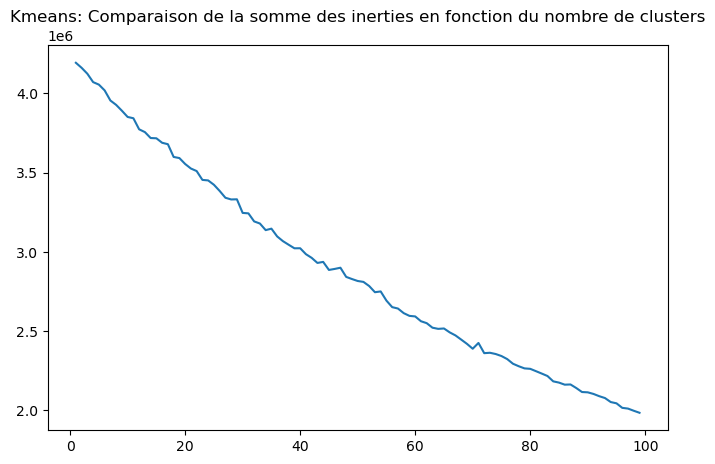

In [156]:
plt.figure(figsize=(8,5))
plt.title('Kmeans: Comparaison de la somme des inerties en fonction du nombre de clusters')
sns.lineplot(x = list(inertia_nlp.keys()),
             y = list(inertia_nlp.values())
            )

# from sklearn.cluster import KMeans

# # Créez une liste pour stocker les valeurs d'inertie
# inertia_nlp = {}

# # Testez différentes valeurs de nombre de clusters (par exemple, de 1 à 10)
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X)  # X est votre jeu de données après la mise à l'échelle
#     inertia_nlp[k] = kmeans.inertia_

# # Ensuite, vous pouvez tracer les valeurs d'inertie en fonction du nombre de clusters
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(8, 5))
# plt.title('K-means: Comparaison de la somme des inerties en fonction du nombre de clusters')
# sns.lineplot(list(inertia_nlp.keys()), list(inertia_nlp.values()))
# plt.xlabel('Nombre de clusters')
# plt.ylabel('Somme des inerties')
# plt.show()


In [157]:
from sklearn.metrics import silhouette_score

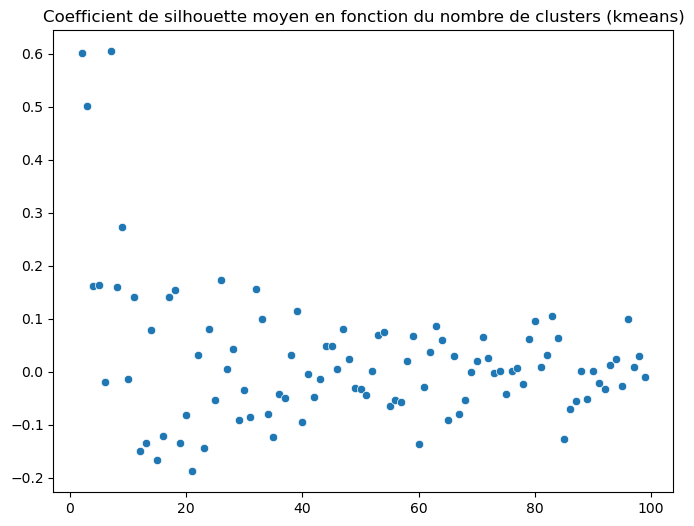

In [158]:

silhouettes_kmeans_nlp = {}
for i in range(2,max_clusters_nlp):
    silhouettes_kmeans_nlp[i] = silhouette_score(X = X_reduce,
                                             labels= list(dict_kmeans_nlp[i].labels_))

plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen en fonction du nombre de clusters (kmeans)')
sns.scatterplot(x = list(silhouettes_kmeans_nlp.keys()),
               y = list(silhouettes_kmeans_nlp.values()))
plt.show()



In [159]:
for key, value in silhouettes_kmeans_nlp.items():
    if value == max(silhouettes_kmeans_nlp.values()):
        print('le coefficient de silhouette est maximal pour {} clusters (score = {})'.format(key, value))
        nb_clusters_optimal = key

le coefficient de silhouette est maximal pour 7 clusters (score = 0.6047108161555887)


In [160]:
if nb_clusters_optimal < 5:
    nb_clusters_optimal = 10

In [161]:
dict_kmeans_nlp[nb_clusters_optimal]

KMeans(n_clusters=7, random_state=0, verbose=1)

In [162]:
train_nlp = pd.concat([train, test]).copy()
train_nlp['label_kmeans'] = dict_kmeans_nlp[nb_clusters_optimal].labels_

Comparaison des clusters par rapport aux catégories présentes dans le jeu de données de base

In [163]:
groups_cat_kmeans_nlp = train_nlp[['cat_lvl_2', 'label_kmeans']].groupby('label_kmeans')
val_presence = []
for i in range(1,nb_clusters_optimal):
    val_presence.append(groups_cat_kmeans_nlp.get_group(i).groupby('cat_lvl_2').count().sort_values(by='label_kmeans', ascending=False).iloc[0].tolist()[0]/groups_cat_kmeans_nlp.get_group(i).groupby('cat_lvl_2').count().sum().values.tolist()[0]*100)

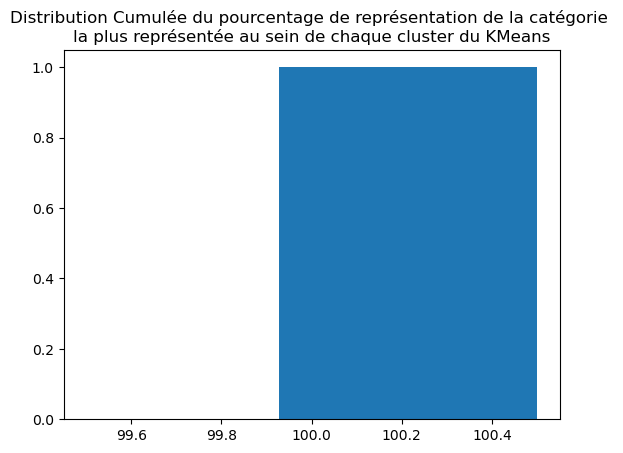

In [164]:
plt.title('Distribution Cumulée du pourcentage de représentation de la catégorie \nla plus représentée au sein de chaque cluster du KMeans')
plt.hist(val_presence,cumulative=True, density=True, bins=nb_clusters_optimal)
plt.show()

Pour la majorité des clusters (95%), la catégorie la plus représentée représente moins de 20 % des individus de l'échantillon. Notre classifieur n'a pas identifié les mêmes catégories que celles présentées dans le jeu de données initial.

## Mettre en œuvre des techniques de réduction de dimension.

In [186]:
# Sélectionnez les colonnes numériques
colonnes_numeriques = ['retail_price', 'discounted_price']

# Appliquez une transformation si nécessaire, par exemple, remplacer les valeurs manquantes par 0
data[colonnes_numeriques] = data[colonnes_numeriques].fillna(0)

# Assurez-vous que les colonnes sont de type numérique (float64)
data[colonnes_numeriques] = data[colonnes_numeriques].astype(float)

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def justification_dimension_reduction(data_jdr):
    """
    CE1 : Justifier la nécessité de la réduction de dimension
    Cette fonction démontre pourquoi la réduction de dimension est nécessaire en se basant sur les caractéristiques
    du DataFrame.
    """
    # Affichage des dimensions du DataFrame
    print("Dimensions du DataFrame :", data_jdr.shape)
    
    # Calcul du nombre de variables (colonnes) dans le DataFrame
    num_features = data.shape[1]
    
    # Affichage du nombre de variables
    print("Nombre de variables (colonnes) dans le DataFrame :", num_features)
    
    # Affichage du nom des colonnes (variables)
    print("Noms des colonnes (variables) :\n", data_jdr.columns.tolist())
    
    # Calcul de la proportion de valeurs manquantes dans chaque colonne
    missing_data = data_jdr.isnull().mean()
    
    # Affichage des colonnes avec des valeurs manquantes
    columns_with_missing_data = missing_data[missing_data > 0]
    if not columns_with_missing_data.empty:
        print("\nColonnes avec des valeurs manquantes :\n", columns_with_missing_data)
    
    # Analyse de la redondance des données (corrélations entre les variables)
    correlation_matrix = data_jdr.corr()
    
    # Affichage de la matrice de corrélation
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title("Matrice de corrélation entre les variables")
    plt.show()
    
    # Conclusion
    print("\nConclusion :")
    print("1. Le DataFrame contient un nombre considérable de variables (", num_features, "), ce qui peut augmenter la complexité de l'analyse.")
    print("2. Certaines variables présentent des valeurs manquantes, ce qui peut nécessiter un traitement supplémentaire.")
    print("3. La matrice de corrélation montre des corrélations entre certaines variables, ce qui suggère de la redondance.")
    print("   La réduction de dimension peut être utile pour extraire les caractéristiques les plus importantes et réduire la complexité.")
    print("4. La réduction de dimension peut également accélérer les calculs et améliorer l'efficacité de l'analyse.")

from sklearn.decomposition import PCA

# def apply_dimension_reduction(data, n_components=2):
#     """
#     CE2 : Appliquer une méthode de réduction de dimension (ex : ACP)
#     Cette fonction prend en entrée les données et applique une méthode de réduction de dimension,
#     telle que l'Analyse en Composantes Principales (ACP).
#     Elle retourne les données réduites.
    
#     :param data: Les données à réduire en dimension (un DataFrame ou une matrice numpy).
#     :param n_components: Le nombre de composantes principales à conserver (par défaut 2).
#     :return: Les données réduites.
#     """
#     # Instancier le modèle PCA avec le nombre de composantes souhaité
#     pca = PCA(n_components=n_components)
    
#     # Appliquer l'ACP aux données
#     reduced_data = pca.fit_transform(data)
    
#     return reduced_data

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def apply_dimension_reduction(data_pca, n_components=2):
    """
    CE2 : Appliquer une méthode de réduction de dimension (ex : ACP)
    Cette fonction prend en entrée les données et applique une méthode de réduction de dimension,
    telle que l'Analyse en Composantes Principales (ACP).
    Elle retourne les données réduites et génère plusieurs graphiques pour visualiser les résultats.
    
    :param data_pca: Les données à réduire en dimension (un DataFrame ou une matrice numpy).
    :param n_components: Le nombre de composantes principales à conserver (par défaut 2).
    :return: Les données réduites.
    """
    
    # Sélectionnez les colonnes numériques
    data_pca = data_pca.select_dtypes(include=[np.number])

    # Supprimer les colonnes non pertinentes pour l'ACP
#     data_pca = data_pca.drop(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',  'pid', 'image', 'is_FK_Advantage_product', 'description', 'brand', 'product_specifications'], axis=1)

    # Remplacer les valeurs manquantes par la moyenne pour les colonnes numériques
    data_pca = data_pca.fillna(data_pca.mean())
    
#     # Supprimez les lignes avec des valeurs non numériques dans les colonnes 'product_rating' et 'overall_rating'
#     data_pca['product_rating'] = pd.to_numeric(data_pca['product_rating'], errors='coerce')
#     data_pca['overall_rating'] = pd.to_numeric(data_pca['overall_rating'], errors='coerce')

#     # Calculez les moyennes des colonnes 'product_rating' et 'overall_rating' (en ignorant les NaN)
#     product_rating_mean = data_pca['product_rating'].mean(skipna=True)
#     overall_rating_mean = data_pca['overall_rating'].mean(skipna=True)

#     # Remplacez les NaN dans les colonnes par les moyennes calculées
#     data_pca['product_rating'].fillna(product_rating_mean, inplace=True)
#     data_pca['overall_rating'].fillna(overall_rating_mean, inplace=True)
    
    # Instancier le modèle PCA avec le nombre de composantes souhaité
    pca = PCA(n_components=n_components)
    
    # Appliquer l'ACP aux données
    reduced_data = pca.fit_transform(data_pca)
    
    # Créer un DataFrame pour les données réduites
    reduced_df = pd.DataFrame(data=reduced_data, columns=[f'PC{i}' for i in range(1, n_components + 1)])
    
    # Créer des graphiques pour visualiser les résultats
    if n_components == 2:
        # Graphique de dispersion en 2D
        plt.figure(figsize=(10, 6))
        plt.scatter(reduced_df['PC1'], reduced_df['PC2'])
        plt.title('ACP - Représentation en 2D')
        plt.xlabel('Composante Principale 1')
        plt.ylabel('Composante Principale 2')
        plt.grid()
        plt.show()
    
    # Si vous avez plus de deux composantes principales, vous pouvez les visualiser également
    
    # Variance expliquée
    explained_variance_ratio = pca.explained_variance_ratio_
    plt.figure(figsize=(8, 4))
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
    plt.title('Variance Expliquée par Composante Principale')
    plt.xlabel('Composante Principale')
    plt.ylabel('Variance Expliquée')
    plt.grid()
    plt.show()
    
    return reduced_df

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def justification_dimension_reduction_parameters(data_pca, n_components):
    """
    CE3 : Justifier le choix des paramètres de la méthode de réduction de dimension
    Cette fonction explique pourquoi les paramètres spécifiques de la méthode de réduction de dimension
    (par exemple, le nombre de composantes principales à conserver) ont été choisis.
    Elle peut être basée sur des critères tels que la variance expliquée ou d'autres considérations.

    :param data: Les données originales
    :param n_components: Le nombre de composantes principales à conserver
    """
    # Supprimer les colonnes non pertinentes pour l'ACP
    data_pca = data_pca.drop(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'pid', 'image', 'is_FK_Advantage_product', 'description', 'brand', 'product_specifications'], axis=1)

    # Remplacer les valeurs manquantes par la moyenne pour les colonnes numériques
    data_pca = data_acp.fillna(data_pca.mean())
    
#     # Supprimez les lignes avec des valeurs non numériques dans les colonnes 'product_rating' et 'overall_rating'
#     data_pca['product_rating'] = pd.to_numeric(data_pca['product_rating'], errors='coerce')
#     data_pca['overall_rating'] = pd.to_numeric(data_pca['overall_rating'], errors='coerce')

#     # Calculez les moyennes des colonnes 'product_rating' et 'overall_rating' (en ignorant les NaN)
#     product_rating_mean = data_pca['product_rating'].mean(skipna=True)
#     overall_rating_mean = data_pca['overall_rating'].mean(skipna=True)

#     # Remplacez les NaN dans les colonnes par les moyennes calculées
#     data_pca['product_rating'].fillna(product_rating_mean, inplace=True)
#     data_pca['overall_rating'].fillna(overall_rating_mean, inplace=True)
    
    # Appliquer l'ACP aux données
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(data_pca)

    # Calculer la variance expliquée cumulée
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = explained_variance_ratio.cumsum()

    # Créer un graphique pour montrer la variance expliquée cumulée
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, n_components + 1), cumulative_variance_ratio, marker='o', linestyle='-')
    plt.xlabel('Nombre de composantes principales')
    plt.ylabel('Variance expliquée cumulée')
    plt.title('Analyse en Composantes Principales (ACP)')
    plt.grid(True)
    plt.show()

    # Insérer ici l'explication du choix des paramètres
    explanation = f"Le choix de {n_components} composantes principales a été basé sur l'analyse de la variance expliquée cumulée. En conservant {n_components} composantes principales, nous pouvons expliquer environ {cumulative_variance_ratio[n_components - 1] * 100:.2f}% de la variance totale des données, ce qui nous permet de réduire efficacement la dimension tout en préservant une grande partie de l'information essentielle."

    return explanation

# Fonction principale
def dimension_reduction_pca(data,n_components):
    # CE1 : Justifier la nécessité de la réduction de dimension
    justification_dimension_reduction(data)
    
    # CE2 : Appliquer une méthode de réduction de dimension (ex : ACP)
    reduced_data = apply_dimension_reduction(data,n_components)
    
    # CE3 : Justifier le choix des paramètres de la méthode de réduction de dimension
    justification_dimension_reduction_parameters(data,n_components)
    
    # Reste de votre code pour la fonction principale ici


Dimensions du DataFrame : (1050, 17)
Nombre de variables (colonnes) dans le DataFrame : 17
Noms des colonnes (variables) :
 ['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'pid', 'retail_price', 'discounted_price', 'image', 'is_FK_Advantage_product', 'description', 'product_rating', 'overall_rating', 'brand', 'product_specifications', 'cat_lvl_1', 'cat_lvl_2', 'cat_lvl_3']

Colonnes avec des valeurs manquantes :
 brand                     0.321905
product_specifications    0.000952
dtype: float64


C:\Users\Zbook\AppData\Local\Temp\ipykernel_2456\3343721179.py:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_jdr.corr()


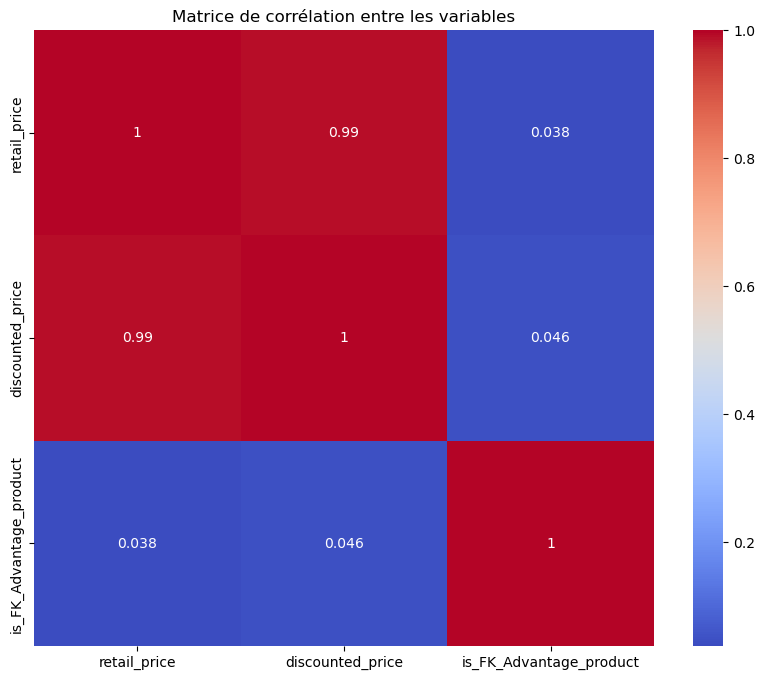


Conclusion :
1. Le DataFrame contient un nombre considérable de variables ( 17 ), ce qui peut augmenter la complexité de l'analyse.
2. Certaines variables présentent des valeurs manquantes, ce qui peut nécessiter un traitement supplémentaire.
3. La matrice de corrélation montre des corrélations entre certaines variables, ce qui suggère de la redondance.
   La réduction de dimension peut être utile pour extraire les caractéristiques les plus importantes et réduire la complexité.
4. La réduction de dimension peut également accélérer les calculs et améliorer l'efficacité de l'analyse.


In [196]:
justification_dimension_reduction(data)

In [197]:
data.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
cat_lvl_1                   object
cat_lvl_2                   object
cat_lvl_3                   object
dtype: object

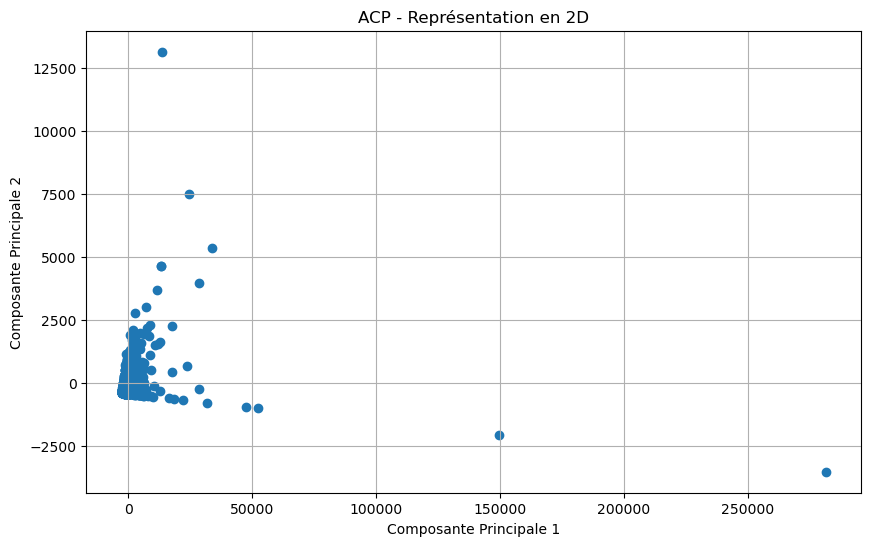

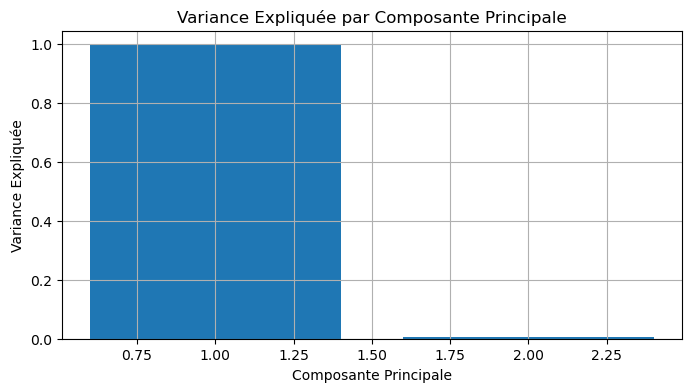

PC1          PC2
0     -682.143386   289.571847
1    -1925.388152  -297.150789
2    -2668.270466  -395.775671
3      169.438232   563.083726
4     -322.325251   922.763690
...           ...          ...
1045  -969.625957  -131.562065
1046  2181.698026  1696.477091
1047  1561.734683  1715.304014
1048   740.770994  1074.445511
1049 -1401.542809    11.073248

[1050 rows x 2 columns]

In [198]:
# Maintenant, les colonnes 'retail_price' et 'discounted_price' sont numériques et prêtes à être utilisées dans des calculs.
apply_dimension_reduction(data, n_components=2)

In [ ]:
# dft= data.copy()
# # Supprimez les lignes avec des valeurs non numériques dans les colonnes 'product_rating' et 'overall_rating'
# dft['product_rating'] = pd.to_numeric(data['product_rating'], errors='coerce')
# dft['overall_rating'] = pd.to_numeric(data['overall_rating'], errors='coerce')

# # Calculez les moyennes des colonnes 'product_rating' et 'overall_rating' (en ignorant les NaN)
# product_rating_mean = dft['product_rating'].mean(skipna=True)
# overall_rating_mean = dft['overall_rating'].mean(skipna=True)

# # Remplacez les NaN dans les colonnes par les moyennes calculées
# dft['product_rating'].fillna(product_rating_mean, inplace=True)
# dft['overall_rating'].fillna(overall_rating_mean, inplace=True)

# # Affichez le DataFrame mis à jour
# print(dft)

In [ ]:

# unique_product_ratings = dft['product_rating'].unique()
# unique_overall_ratings = dft['overall_rating'].unique()

# print("Valeurs uniques de 'product_rating':")
# for rating in unique_product_ratings:
#     print(rating)

# print("\nValeurs uniques de 'overall_rating':")
# for rating in unique_overall_ratings:
#     print(rating)



In [200]:
# # Exemple d'utilisation de la fonction
# n_components = 3  # Remplacez par le nombre de composantes principales que vous choisissez
# explanation = justification_dimension_reduction_parameters(data, n_components)
# print(explanation)

## Représenter graphiquement des données à grandes dimensions.

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def apply_tsne(data_sne, n_components=2, perplexity=30, learning_rate=200):
    """
    CE1 : Mettre en œuvre au moins une technique de réduction de dimension T-SNE
    Cette fonction applique la technique de réduction de dimension T-SNE aux données.

    :param data: Les données à réduire en dimension
    :param n_components: Le nombre de composantes principales à conserver (par défaut, 2 pour une représentation en 2D)
    :param perplexity: Paramètre de perplexité de T-SNE (par défaut, 30)
    :param learning_rate: Taux d'apprentissage de T-SNE (par défaut, 200)
    :return: Les données réduites en dimension
    """

    # Supprimer les colonnes non pertinentes pour l'ACP
#     data_sne = data_sne.drop(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'product_category_tree', 'pid', 'image', 'is_FK_Advantage_product', 'description', 'brand', 'product_specifications'], axis=1)
    # Sélectionnez les colonnes numériques
    data_sne = data_sne.select_dtypes(include=[np.number])
    
    # Remplacer les valeurs manquantes par la moyenne pour les colonnes numériques
    data_sne = data_sne.fillna(data_sne.mean())
    
#     # Supprimez les lignes avec des valeurs non numériques dans les colonnes 'product_rating' et 'overall_rating'
#     data_sne['product_rating'] = pd.to_numeric(data_sne['product_rating'], errors='coerce')
#     data_sne['overall_rating'] = pd.to_numeric(data_sne['overall_rating'], errors='coerce')

#     # Calculez les moyennes des colonnes 'product_rating' et 'overall_rating' (en ignorant les NaN)
#     product_rating_mean = data_sne['product_rating'].mean(skipna=True)
#     overall_rating_mean = data_sne['overall_rating'].mean(skipna=True)

#     # Remplacez les NaN dans les colonnes par les moyennes calculées
#     data_sne['product_rating'].fillna(product_rating_mean, inplace=True)
#     data_sne['overall_rating'].fillna(overall_rating_mean, inplace=True)    
    
    tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate)
    reduced_data = tsne.fit_transform(data_sne)
    return reduced_data

def plot_tsne_2d(reduced_data, labels=None):
    """
    CE2 : Réaliser au moins un graphique représentant les données réduites en 2D avec T-SNE
    Cette fonction crée un graphique en 2D pour visualiser les données réduites avec T-SNE.

    :param reduced_data: Les données réduites en dimension
    :param labels: Les étiquettes (classes) des données (optionnel)
    """
    plt.figure(figsize=(8, 6))
    if labels is None:
        plt.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='o', s=30)
    else:
        unique_labels = np.unique(labels)
        for label in unique_labels:
            plt.scatter(reduced_data[labels == label, 0], reduced_data[labels == label, 1], label=label, s=30)
        plt.legend()
    plt.title('Réduction de dimension avec T-SNE en 2D')
    plt.xlabel('Composante 1')
    plt.ylabel('Composante 2')
    plt.grid(True)
    plt.show()
    return labels

def analyze_tsne_plot(reduced_data, labels=None):
    """
    CE3 : Réaliser et formaliser une analyse du graphique en 2D avec T-SNE
    Cette fonction réalise une analyse du graphique en 2D obtenu après la réduction de dimension T-SNE.

    :param reduced_data: Les données réduites en dimension avec T-SNE
    :param labels: Les étiquettes (classes) des données (optionnel)
    """
    # Cette fonction permet d'analyser le graphique en 2D obtenu après la réduction de dimension T-SNE.
    
    # Exemple d'observation 1 : Structure des clusters
    # Vous pouvez observer la structure des clusters dans le graphique en 2D.
    # Les points similaires devraient être regroupés en clusters distincts.

    # Exemple d'observation 2 : Séparation des classes
    # Si des étiquettes de classe sont disponibles (via le paramètre 'labels'), observez si les classes sont séparées.
    # Les points de la même classe devraient être proches les uns des autres.

    # Exemple d'observation 3 : Densité des points
    # Vous pouvez observer la densité des points dans différentes régions du graphique.
    # Les régions avec une densité plus élevée de points peuvent indiquer des zones d'intérêt.

    # Exemple d'observation 4 : Points aberrants
    # Cherchez des points aberrants ou des valeurs aberrantes qui pourraient indiquer des données incorrectes ou intéressantes.

    # Exemple d'observation 5 : Interactions entre clusters
    # Observez s'il y a des interactions visibles entre les clusters.
    # Parfois, des clusters peuvent être proches ou se chevaucher.

    # Exemple d'observation 6 : Conclusions et insights
    # Faites des conclusions et des insights basés sur vos observations.
    # Ces conclusions peuvent aider à mieux comprendre la structure des données réduites.

    # Exemple d'affichage des étiquettes (classes) sur le graphique
    if labels is not None:
        plt.figure(figsize=(8, 6))
        unique_labels = np.unique(labels)
        for label in unique_labels:
            plt.scatter(reduced_data[labels == label, 0], reduced_data[labels == label, 1], label=label, s=30)
        plt.legend()
        plt.title('Réduction de dimension avec T-SNE en 2D (avec étiquettes)')
        plt.xlabel('Composante 1')
        plt.ylabel('Composante 2')
        plt.grid(True)
        plt.show()

    # Insérez ici vos autres observations, analyses et commentaires.

def dimension_reduction_tsne(data_dr_sne, n_components=2, perplexity=30, learning_rate=200, labels=None):
    """
    Fonction principale pour la réduction de dimension avec T-SNE.

    :param data_dr_sne: Les données à réduire en dimension
    :param n_components: Le nombre de composantes principales à conserver (par défaut, 2 pour une représentation en 2D)
    :param perplexity: Paramètre de perplexité de T-SNE (par défaut, 30)
    :param learning_rate: Taux d'apprentissage de T-SNE (par défaut, 200)
    :param labels: Les étiquettes (classes) des données (optionnel)
    """
    # Appliquer T-SNE aux données
    print('reduced_data')
    reduced_data = apply_tsne(data_dr_sne, n_components, perplexity, learning_rate)

    # Réaliser un graphique en 2D
    print('plot_tsne_2d')
    labels_p = plot_tsne_2d(reduced_data, labels)
    print('labels_p : ' , labels_p)
    # Analyser le graphique en 2D
    print('analyze_tsne_plot')    
    analyze_tsne_plot(reduced_data, labels_p)

# Exemple d'utilisation de la fonction principale
# dimension_reduction_tsne(data, n_components=2, perplexity=30, learning_rate=200, labels=labels)


reduced_data
plot_tsne_2d


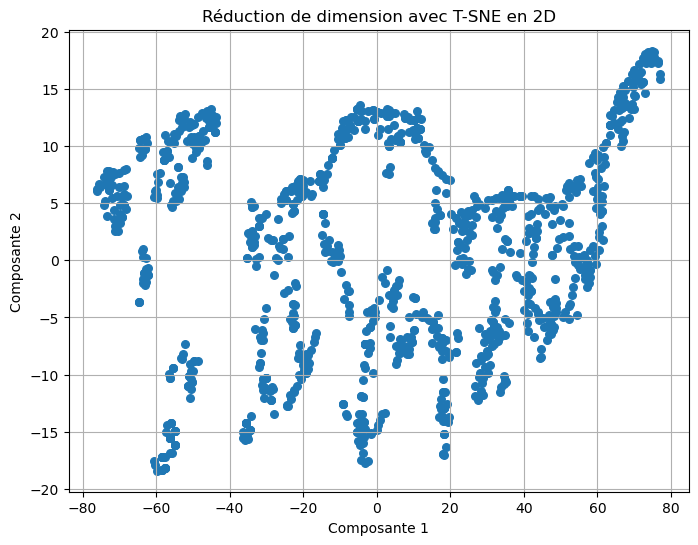

labels_p :  None
analyze_tsne_plot


In [209]:
dimension_reduction_tsne(data, n_components=2, perplexity=30, learning_rate=200, labels=None)

# Données visuelles

In [229]:
def show_images_side_by_side(original_image, processed_image, title1, title2):
    """
    Affiche deux images côte à côte avec des titres.

    Args:
        original_image (numpy.ndarray): Image d'origine.
        processed_image (numpy.ndarray): Image après le traitement.
        title1 (str): Titre de la première image.
        title2 (str): Titre de la deuxième image.
    """
    plt.figure(figsize=(12, 5))

    # Afficher la première image à gauche
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title(title1)
    plt.axis('off')

    # Afficher la deuxième image à droite
    plt.subplot(1, 2, 2)
    plt.imshow(processed_image, cmap='gray')
    plt.title(title2)
    plt.axis('off')

    plt.show()

1. **Filtre Médian (non-linéaire) :**

Le filtre médian est couramment utilisé pour réduire le bruit dans une image en remplaçant chaque pixel par la médiane des pixels voisins.


In [230]:
def apply_median_filter(image_path, kernel_size=5):
    """
    Applique un filtre médian (non-linéaire) à une image.

    Args:
        image_path (str): Chemin vers l'image d'entrée.
        kernel_size (int): Taille du noyau du filtre.

    Returns:
        numpy.ndarray: Image avec le filtre médian appliqué.
    """
    # Charger l'image
    image = cv2.imread(image_path)

    # Appliquer le filtre médian
    filtered_image = cv2.medianBlur(image, kernel_size)

    # Afficher les images côte à côte
    show_images_side_by_side(image, filtered_image, 'Image Originale', 'Filtre Médian')

    return filtered_image

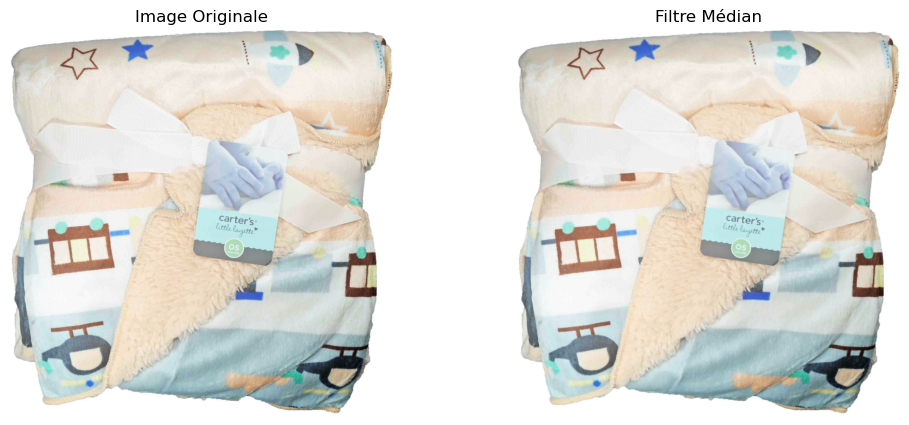

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [231]:
apply_median_filter('data/Images/93618b8a998782d4d847ee5cba5c7de2.jpg')


2. **Filtre Non-Local Means :**

Le filtre Non-Local Means est utilisé pour la réduction du bruit tout en préservant les détails.



In [233]:
def apply_non_local_means_filter(image_path, h=10, hForColor=10, templateWindowSize=7, searchWindowSize=21):
    """
    Applique le filtre Non-Local Means à une image.

    Args:
        image_path (str): Chemin vers l'image d'entrée.
        h (int): Paramètre de filtrage pour la luminance.
        hForColor (int): Paramètre de filtrage pour la couleur.
        templateWindowSize (int): Taille de la fenêtre du modèle.
        searchWindowSize (int): Taille de la fenêtre de recherche.

    Returns:
        numpy.ndarray: Image avec le filtre Non-Local Means appliqué.
    """
    # Charger l'image
    image = cv2.imread(image_path)

    # Convertir en niveaux de gris si nécessaire
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Appliquer le filtre Non-Local Means
    filtered_image = cv2.fastNlMeansDenoising(image, None, h, templateWindowSize, searchWindowSize)

    # Afficher les images côte à côte
    show_images_side_by_side(image, filtered_image, 'Image Originale', 'Non-Local Means')

    return filtered_image

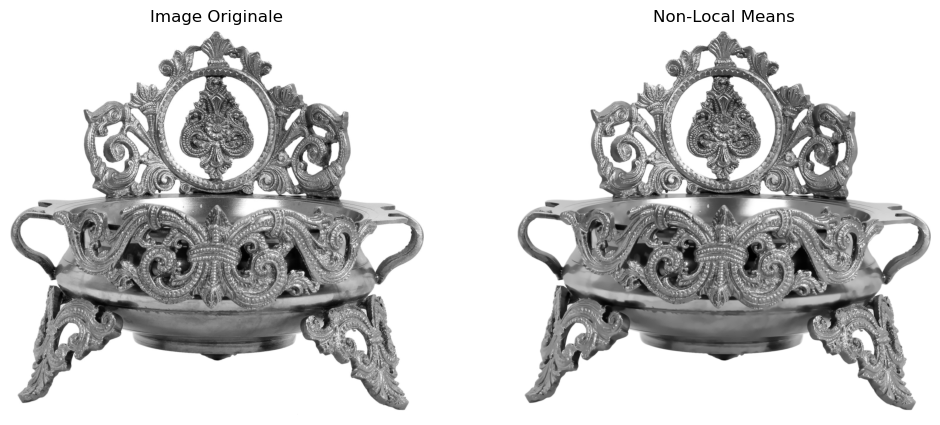

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [235]:
apply_non_local_means_filter('data/Images/40829ac110f344ef35f1c8c32fb311c7.jpg')

3. **Filtre de Flou Gaussien :**

In [237]:
def apply_gaussian_blur(image_path, kernel_size=5):
    """
    Applique un filtre de flou gaussien à une image.

    Args:
        image_path (str): Chemin vers l'image d'entrée.
        kernel_size (int): Taille du noyau gaussien.

    Returns:
        numpy.ndarray: Image avec le flou gaussien appliqué.
    """
    # Charger l'image
    image = cv2.imread(image_path)

    # Appliquer le filtre de flou gaussien
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

    # Afficher les images côte à côte
    show_images_side_by_side(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), blurred_image, 'Image Originale', 'Flou Gaussien')

    return blurred_image

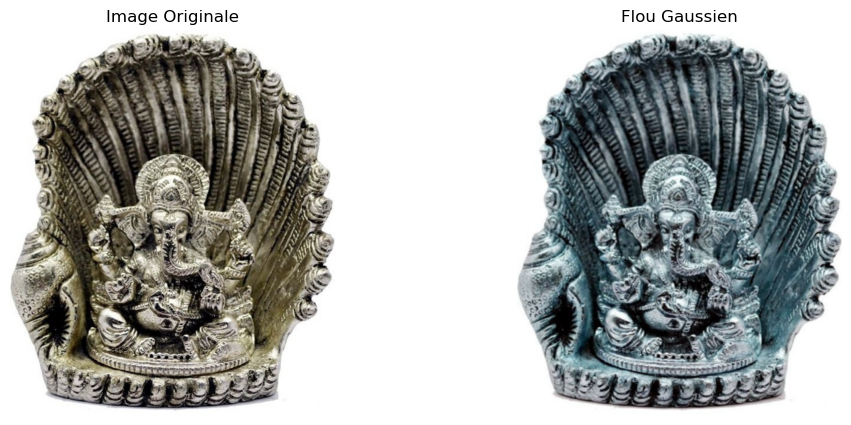

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [238]:
apply_gaussian_blur('data/Images/7729e54756a60aecb2067a747c890913.jpg')

4. **Filtre de Sobel pour la Détection de Contours :**

In [239]:
# 1. Détection de contours avec l'algorithme de Canny :

def detect_edges_canny(image_path, low_threshold=50, high_threshold=150):
    """
    Détecte les contours dans une image en utilisant l'algorithme de Canny.

    Args:
        image_path (str): Chemin vers l'image d'entrée.
        low_threshold (int): Seuil bas pour la détection des contours.
        high_threshold (int): Seuil élevé pour la détection des contours.

    Returns:
        numpy.ndarray: Image avec les contours détectés.
    """
    # Charger l'image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Appliquer l'algorithme de Canny
    edges = cv2.Canny(image, low_threshold, high_threshold)

    # Afficher les images côte à côte
    show_images_side_by_side(image, edges, 'Image Originale', 'Contours Canny')

    return edges

# 2. Filtre de Sobel pour la détection de contours :

def detect_edges_sobel(image_path):
    """
    Détecte les contours dans une image en utilisant le filtre de Sobel.

    Args:
        image_path (str): Chemin vers l'image d'entrée.

    Returns:
        numpy.ndarray: Image avec les contours détectés.
    """
    # Charger l'image en niveaux de gris
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Appliquer le filtre de Sobel
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

    # Combiner les résultats en magnitude des gradients
    magnitude = cv2.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

    # Afficher les images côte à côte
    show_images_side_by_side(image, magnitude, 'Image Originale', 'Contours Sobel')

    return magnitude

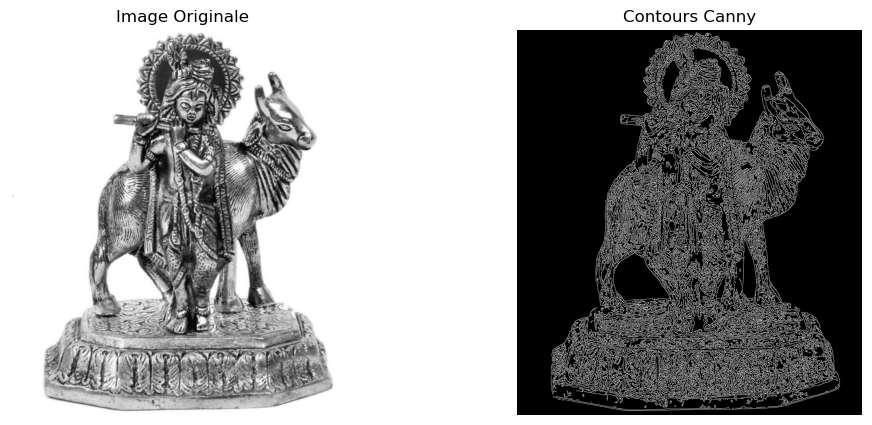

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [241]:
detect_edges_canny('data/Images/968a2b3be84193e3f755c2fe71033a2c.jpg')

5. **Filtrage par Convolution :**

La convolution est une opération de base pour de nombreux filtres. Voici un exemple de convolution simple :


In [243]:
def apply_convolution_filter(image_path, kernel):
    """
    Applique un filtre de convolution personnalisé à une image.

    Args:
        image_path (str): Chemin vers l'image d'entrée.
        kernel (numpy.ndarray): Noyau de convolution.

    Returns:
        numpy.ndarray: Image après l'application du filtre de convolution.
    """
    # Charger l'image
    image = cv2.imread(image_path)

    # Appliquer le filtre de convolution
    filtered_image = cv2.filter2D(image, -1, kernel)

    # Afficher les images côte à côte
    show_images_side_by_side(image, filtered_image, 'Image Originale', 'Filtre de Convolution')

    return filtered_image

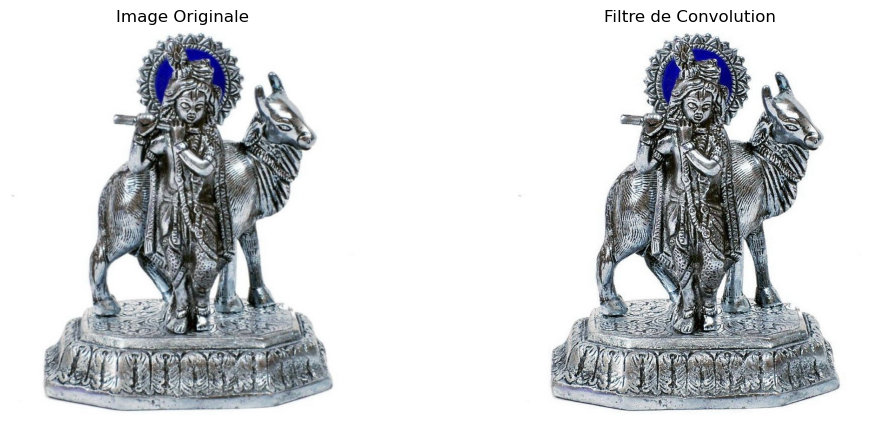

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [245]:
# apply_convolution_filter('data/Images/968a2b3be84193e3f755c2fe71033a2c.jpg')
# Exemple d'utilisation avec un noyau de convolution personnalisé
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # Exemple de noyau pour accentuer les contours
apply_convolution_filter('data/Images/968a2b3be84193e3f755c2fe71033a2c.jpg', kernel)

Ces fonctions vous permettront d'appliquer différents filtres et traitements d'images à vos images d'entrée. Vous pouvez spécifier les paramètres appropriés pour chaque fonction en fonction de vos besoins.

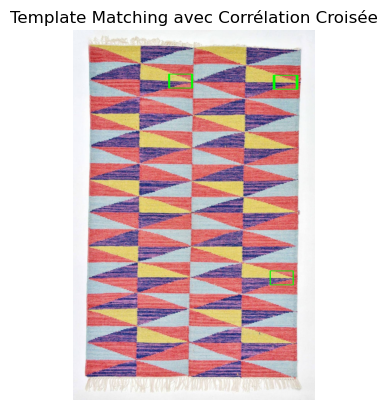

In [246]:
def template_matching(image_path, template_path):
    """
    Réalise le template matching sur une image en utilisant un modèle (template).

    Args:
        image_path (str): Chemin vers l'image d'entrée.
        template_path (str): Chemin vers le modèle (template).

    Returns:
        numpy.ndarray: Image avec les régions correspondant au modèle encadrées.
    """
    # Charger l'image principale et le modèle (template)
    main_image = cv2.imread(image_path)
    template = cv2.imread(template_path)

    # Appliquer le template matching avec l'opérateur de corrélation croisée
    result = cv2.matchTemplate(main_image, template, cv2.TM_CCOEFF_NORMED)

    # Définir un seuil pour les correspondances
    threshold = 0.8
    loc = np.where(result >= threshold)

    # Créer une copie de l'image principale pour afficher les correspondances
    image_with_matches = main_image.copy()

    # Dessiner des rectangles autour des régions correspondantes
    for pt in zip(*loc[::-1]):
        bottom_right = (pt[0] + template.shape[1], pt[1] + template.shape[0])
        cv2.rectangle(image_with_matches, pt, bottom_right, (0, 255, 0), 2)

    # Afficher l'image avec les correspondances encadrées
    plt.imshow(cv2.cvtColor(image_with_matches, cv2.COLOR_BGR2RGB))
    plt.title('Template Matching avec Corrélation Croisée')
    plt.axis('off')
    plt.show()

    return image_with_matches

# Exemple d'utilisation
image_path = 'data/Images/2476ae5a5e045876aa08f5919cb3b91b.jpg'
template_path = 'data/Images/Echantillon/echantillon_1.jpg'
result_image = template_matching(image_path, template_path)


Dimensions de l'image chargée : (1938, 1265)


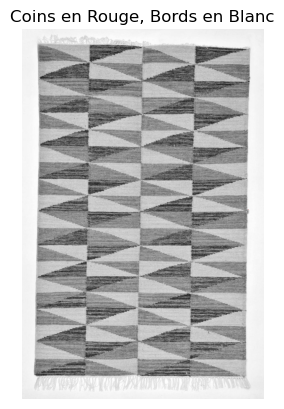

In [255]:
def detect_edges_and_corners(image_path, low_threshold=50, high_threshold=150, corner_block_size=2, corner_aperture_size=3, corner_quality_level=0.04):
    """
    Applique le filtre de Canny pour les bords et le détecteur de Harris-Stephens pour les coins à une image.

    Args:
        image_path (str): Chemin vers l'image d'entrée.
        low_threshold (int): Seuil bas pour la détection des contours.
        high_threshold (int): Seuil élevé pour la détection des contours.
        corner_block_size (int): Taille du voisinage pour la détection des coins (blockSize).
        corner_aperture_size (int): Taille du noyau pour la détection des coins (apertureSize).
        corner_quality_level (float): Seuil de qualité des coins.

    Returns:
        numpy.ndarray: Image avec les coins encadrés en rouge et les bords détectés.
    """
    # Charger l'image en niveaux de gris
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Charger l'image en niveaux de gris
#     image = cv2.imread(image_path)

    # Vérifier les dimensions de l'image
    if image is None:
        print("Erreur : Impossible de charger l'image.")
    else:
        print("Dimensions de l'image chargée :", image.shape)

    
    # Appliquer le filtre de Canny pour les bords
    edges = cv2.Canny(image, low_threshold, high_threshold)

    # Appliquer le détecteur de Harris-Stephens pour les coins
    corners = cv2.cornerHarris(image, blockSize=corner_block_size, ksize=corner_aperture_size, k=corner_quality_level)

    # Normaliser les coins pour les rendre visibles
    corners = cv2.normalize(corners, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

    # Encadrer les coins en rouge
    image_with_corners = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    image_with_corners[corners > 200] = [0, 0, 255]  # Rouge

    # Afficher l'image avec les coins encadrés et les bords détectés
    plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
    plt.title('Coins en Rouge, Bords en Blanc')
    plt.axis('off')
    plt.show()

    return image_with_corners

# Exemple d'utilisation
image_path = 'data/Images/2476ae5a5e045876aa08f5919cb3b91b.jpg'
result_image = detect_edges_and_corners(image_path)


La fonction charge l'image, applique le filtre de Canny pour les bords, détecte les coins avec le détecteur de Harris-Stephens, et encadre les coins en rouge sur l'image. Les bords détectés sont en blanc. Vous pouvez ajuster les paramètres tels que les seuils et la qualité des coins en fonction de vos besoins.

In [ ]:
import cv2
import numpy as np

def detect_corners_in_color_image(image_path, channel='L'):
    # Charger l'image
    image = cv2.imread(image_path)

    # Convertir l'image en niveaux de gris en extrayant un canal de couleur spécifique
    if channel == 'L':
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    elif channel == 'Y':
        yuv_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
        grayscale_image = yuv_image[:, :, 0]  # Canal de luminance Y
    else:
        raise ValueError("Canal de couleur non pris en charge")

    # Appliquer le détecteur de Harris-Stephens pour les coins
    corner_block_size = 2
    corner_aperture_size = 3
    corner_quality_level = 0.04
    corners = cv2.cornerHarris(grayscale_image, blockSize=corner_block_size, ksize=corner_aperture_size, k=corner_quality_level)

    # Normaliser les coins pour les rendre visibles
    corners = cv2.normalize(corners, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

    # Afficher l'image originale et les coins détectés
    cv2.imshow('Image originale', image)
    cv2.imshow('Coins détectés', corners)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Exemple d'utilisation avec le canal de luminance (Y) dans une image YUV
image_path = 'data/Images/2476ae5a5e045876aa08f5919cb3b91b.jpg'
detect_corners_in_color_image(image_path, channel='Y')


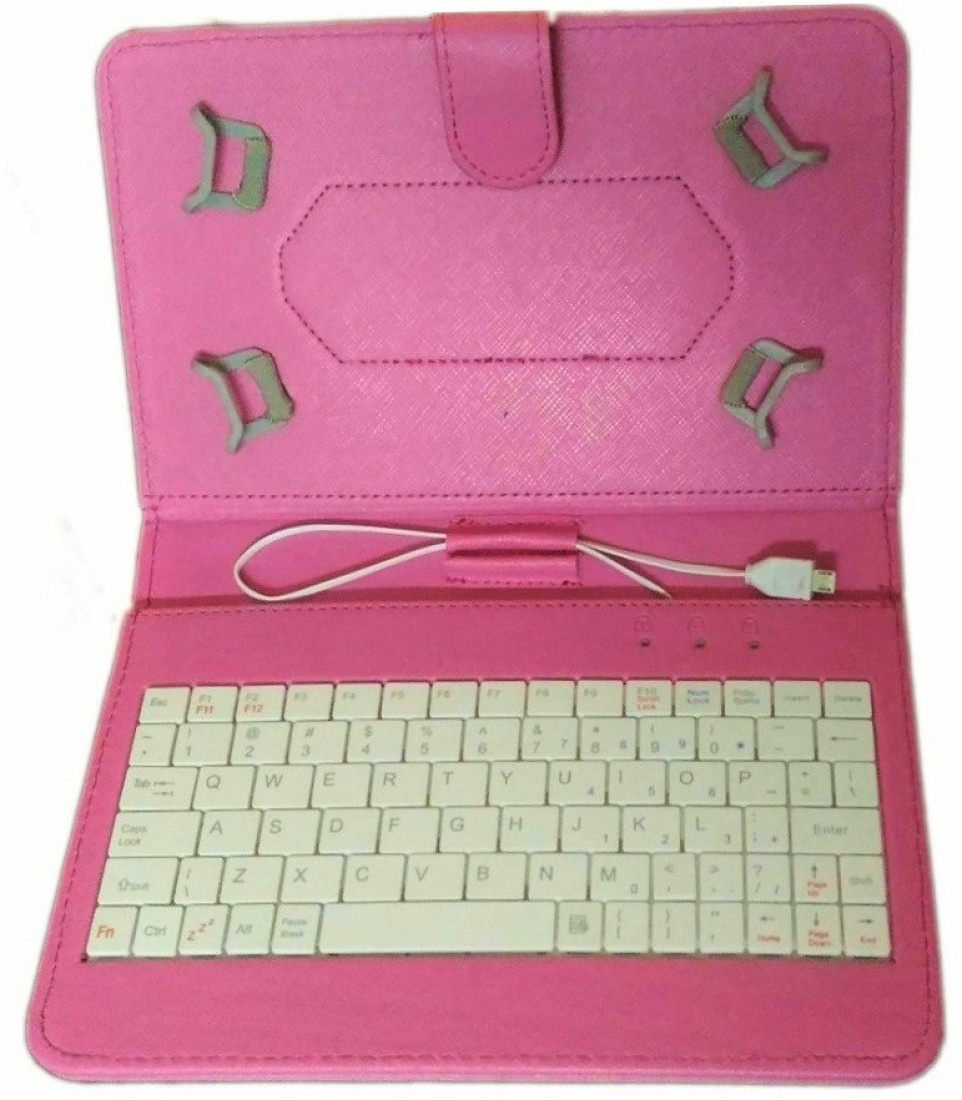

In [247]:
from IPython.display import Image
Image('data/Images/'+ str(data.sample(1)['image'].values.tolist()[0]), width=100 )

Ensuite, vous analyserez le jeu de données déjà constitué en réalisant un prétraitement des images et des descriptions des produits, une réduction de dimension, puis un clustering. Les résultats du clustering seront présentés sous la forme d’une représentation en deux dimensions à déterminer, qui ’illustrera le fait que les caractéristiques extraites permettent de regrouper des produits de même catégorie.

La représentation graphique vous aidera à convaincre Linda que cette approche de modélisation permettra bien de regrouper des produits de même catégorie.

Attention, Linda n’a pas besoin d’un moteur de classification à ce stade, mais bien d’une étude de faisabilité !


In [211]:
#Echantillon de données
img_echantillon = data.sample(50, random_state=10)

In [212]:
img_echantillon['image'] = img_echantillon['image'].apply(lambda x: 'data/Images/'+str(x))

In [213]:
img_echantillon['image'].head(1)

775    data/Images/93618b8a998782d4d847ee5cba5c7de2.jpg
Name: image, dtype: object

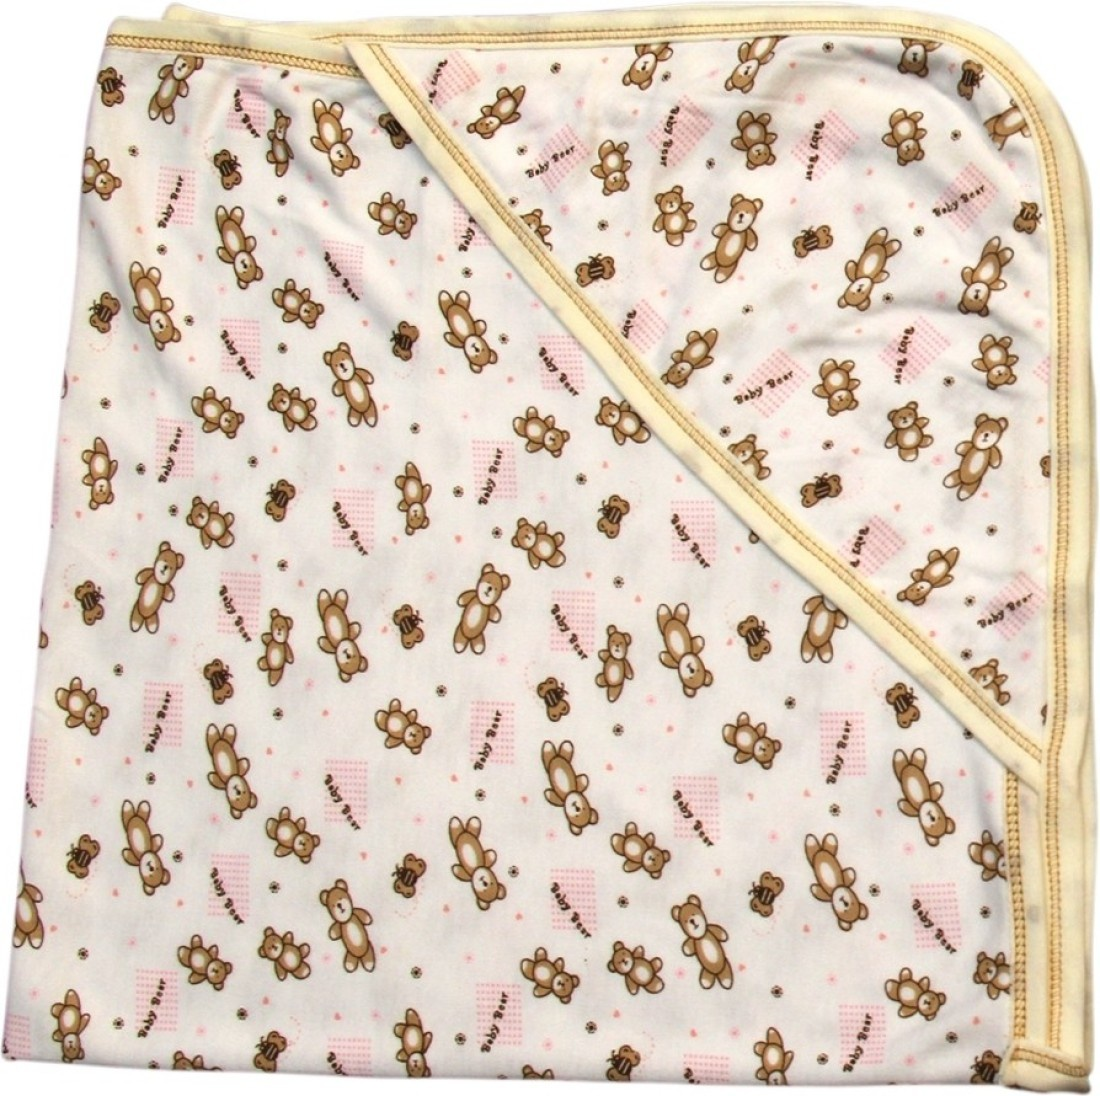

In [214]:
Image(img_echantillon.iloc[12]['image'], width=150)

In [215]:
img_echantillon.iloc[12]

uniq_id                                     8818424349b75a67775353d1feef2635
crawl_timestamp                                    2015-12-12 11:46:53 +0000
product_url                http://www.flipkart.com/offspring-printed-sing...
product_name                     Offspring Printed Single Wrapper Multicolor
pid                                                         BLAE8BUKXGJ3DHMG
retail_price                                                           375.0
discounted_price                                                       290.0
image                       data/Images/8818424349b75a67775353d1feef2635.jpg
is_FK_Advantage_product                                                False
description                Buy Offspring Printed Single Wrapper Multicolo...
product_rating                                           No rating available
overall_rating                                           No rating available
brand                                                              Offspring

## Préambule : essai de convolution

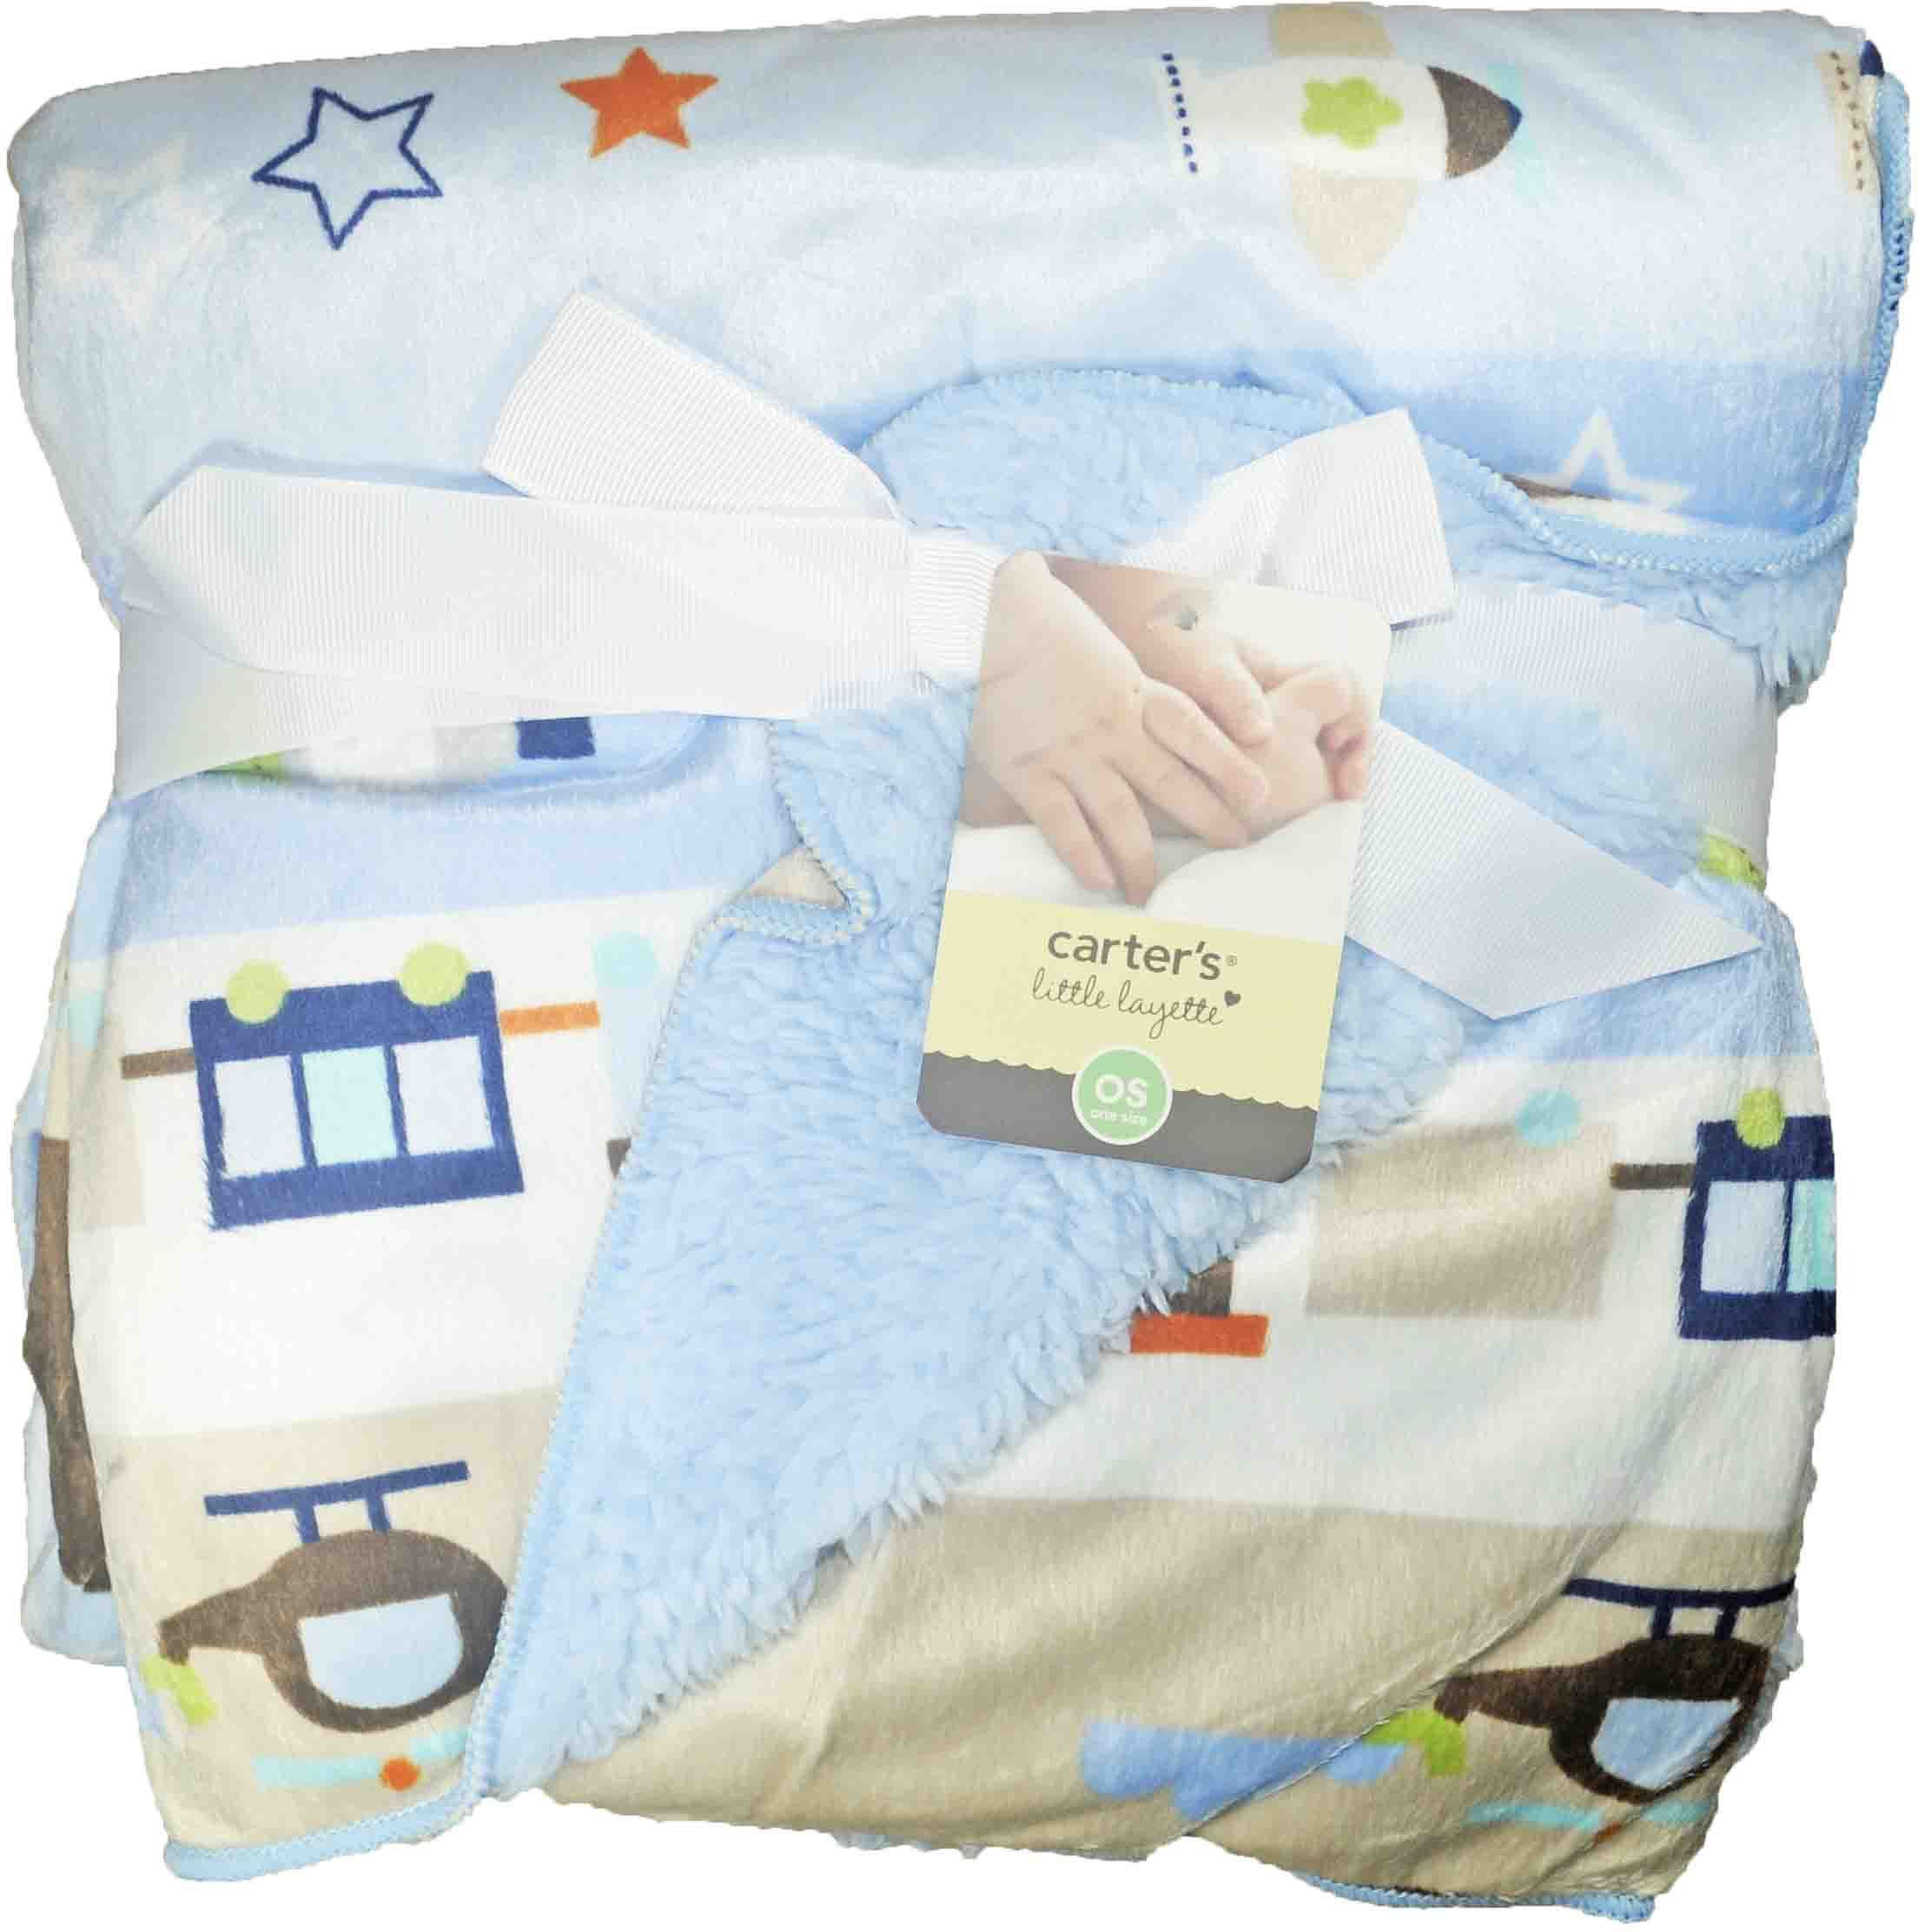

In [216]:
Image('data/Images/93618b8a998782d4d847ee5cba5c7de2.jpg', width=200)

In [217]:
img_conv = Image_PIL.open('data/Images/93618b8a998782d4d847ee5cba5c7de2.jpg')

In [218]:
img_conv = np.array(img_conv)

In [219]:
img_conv = cv2.resize(img_conv, (200,200))

In [220]:
def filtre_moyenneur(img, voisinage = 1):
    '''Remplace chaque pixel par l\'intensité moyenne de son voisinage'''
    etendue = 1+2*voisinage
    img2 = np.copy(img)
    
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            if (i<voisinage)|(i>img.shape[0] - voisinage-1):
                img2[i,j] = int(255/2)
            if (j<voisinage)|(j>img.shape[0] - voisinage-1):
                img2[i,j] = int(255/2)
            
            
    for i in range(voisinage,img.shape[0]-voisinage):
        for j in range(voisinage,img.shape[1]-voisinage):
            mean = 0
            for mean_x in range(i-voisinage, i+voisinage+1):
                for mean_y in range(j-voisinage, j+voisinage+1):
                    mean += img[mean_x, mean_y]
            img2[i,j] = mean/(etendue**2)
    
    
    return img2  

In [221]:
img_conv_traitee_1 = filtre_moyenneur(cv2.cvtColor(np.array(img_conv),cv2.COLOR_BGR2GRAY), voisinage=1)
img_conv_traitee_2 = filtre_moyenneur(cv2.cvtColor(np.array(img_conv),cv2.COLOR_BGR2GRAY), voisinage=2)
img_conv_traitee_3 = filtre_moyenneur(cv2.cvtColor(np.array(img_conv),cv2.COLOR_BGR2GRAY), voisinage=3)
img_conv_traitee_4 = filtre_moyenneur(cv2.cvtColor(np.array(img_conv),cv2.COLOR_BGR2GRAY), voisinage=4)


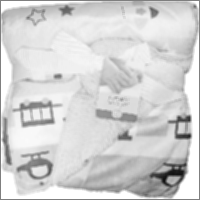

In [222]:
Image_PIL.fromarray(img_conv_traitee_1)

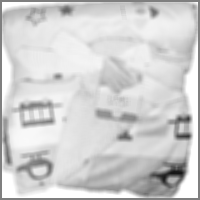

In [223]:
Image_PIL.fromarray(img_conv_traitee_2)

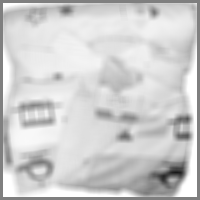

In [224]:
Image_PIL.fromarray(img_conv_traitee_3)

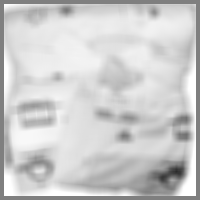

In [225]:
Image_PIL.fromarray(img_conv_traitee_4)

## Prétraitement

### Essais

**Réduction de bruit**

In [ ]:
from scipy.ndimage import gaussian_filter
from PIL import Image as Image_PIL

In [ ]:
im = np.array(Image_PIL.open(img_echantillon.iloc[12]['image']))

In [ ]:
im = gaussian_filter(im, sigma=3)

In [ ]:
Image_PIL.fromarray(im)

**Egalisation**

In [ ]:
hist, bins = np.histogram(im.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(im.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

In [ ]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [ ]:
im2=cdf[im]

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(im2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

In [ ]:
Image_PIL.fromarray(im2)

In [ ]:
img3 = cv2.imread(img_echantillon.iloc[12]['image'],0)
equ = cv2.equalizeHist(img3)
res = np.hstack((img3,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

In [ ]:
img3.shape

**Redimensionnement**

Taille d'origine des images

In [ ]:
min_x = 100000
max_x = 0
min_y = 100000
max_y = 0
for image in img_echantillon['image'].tolist():
    shape = np.array(Image_PIL.open(image)).shape
    if shape[0] < min_x:
        min_x = shape[0]
    elif shape[0] > max_x:
        max_x = shape[0]
    if shape[1] < min_y:
        min_y = shape[1]
    elif shape[1] > max_y:
        max_y = shape[1]

In [ ]:
print('min_x {},\nmax_x {},\nmin_y {},\nmax_y {}'.format(min_x, max_x, min_y, max_y))

Redimensionnement

In [ ]:
resize_img = cv2.resize(np.array(Image_PIL.open(img_echantillon.iloc[12]['image'])), dsize=(128,128))
Image_PIL.fromarray(resize_img)

### Fonction de prétraitement Complète

In [ ]:
# Étape 6 : Collecte de données via une API
    # CE1 : Définir la stratégie de collecte de données
    # CE2 : Écrire et tester une requête pour obtenir les données via l'API
    # CE3 : Récupérer les seuls champs nécessaires
    # CE4 : Appliquer un filtre pour collecter uniquement les données correspondant à l'ingrédient "champagne"
    # CE5 : Stocker les données collectées dans un fichier utilisable
    # CE6 : Veiller au respect des normes RGPD

In [ ]:
def define_data_collection_strategy():
    # CE1 : Définir la stratégie de collecte de données
    # Ici, vous pouvez définir votre stratégie de collecte de données, par exemple en spécifiant les sources de données, les méthodes de collecte, les formats de données, etc.
    strategy = {
        "sources": ["API", "Database"],
        "methods": ["GET", "POST"],
        "formats": ["JSON", "CSV"]
    }
    return strategy

def make_api_request(api_url):
    # CE2 : Écrire et tester une requête pour obtenir les données via l'API
    # Ici, vous pouvez écrire et tester une requête pour obtenir les données via l'API en utilisant l'URL fournie.
    response = requests.get(api_url)
    return response

def extract_required_fields(response):
    # CE3 : Récupérer les seuls champs nécessaires
    # Ici, vous pouvez extraire les seuls champs nécessaires à partir de la réponse de l'API.
    data = response.json()
    required_fields = data["fields"]
    return required_fields

def filter_data_by_ingredient(data, ingredient):
    # CE4 : Appliquer un filtre pour collecter uniquement les données correspondant à l'ingrédient "champagne"
    # Ici, vous pouvez appliquer un filtre pour collecter uniquement les données correspondant à l'ingrédient spécifié, par exemple "champagne".
    filtered_data = [item for item in data if item["ingredient"] == ingredient]
    return filtered_data

def store_data(filtered_data):
    # CE5 : Stocker les données collectées dans un fichier utilisable
    # Ici, vous pouvez stocker les données collectées dans un fichier utilisable, par exemple au format CSV ou JSON.
    with open("data.csv", "w") as file:
        writer = csv.writer(file)
        writer.writerow(filtered_data[0].keys())
        for item in filtered_data:
            writer.writerow(item.values())

def ensure_gdpr_compliance():
    # CE6 : Veiller au respect des normes RGPD
    # Ici, vous pouvez mettre en place des mesures pour veiller au respect des normes RGPD (Règlement général sur la protection des données), par exemple en anonymisant les données, en obtenant un consentement explicite, en assurant la sécurité des données, etc.
    pass

def collect_data_from_api(api_url):
    # CE1 : Définir la stratégie de collecte de données
    strategy = define_data_collection_strategy()

    # CE2 : Écrire et tester une requête pour obtenir les données via l'API
    response = make_api_request(api_url)

    # CE3 : Récupérer les seuls champs nécessaires
    data = extract_required_fields(response)

    # CE4 : Appliquer un filtre pour collecter uniquement les données correspondant à l'ingrédient "champagne"
    filtered_data = filter_data_by_ingredient(data, "champagne")

    # CE5 : Stocker les données collectées dans un fichier utilisable
    store_data(filtered_data)

    # CE6 : Veiller au respect des normes RGPD
    ensure_gdpr_compliance()

    return filtered_data

In [ ]:
def redim(array_im, width, height):
    '''Redimensionne l\'image correspondant à array_im dans la largeur et la hauteur définie'''
    min_x = 100000
    max_x = 0
    min_y = 100000
    max_y = 0
    shape = array_im.shape
    if shape[0] < min_x:
        min_x = shape[0]
    elif shape[0] > max_x:
        max_x = shape[0]
    if shape[1] < min_y:
        min_y = shape[1]
    elif shape[1] > max_y:
        max_y = shape[1]
    im = cv2.resize(array_im, dsize=(width,height))
    del shape
    return im

In [ ]:
def preprocess(image, path=False):
    '''prétraitement des images:
    * filtre gaussian
    * égalisation de l'histogramme
    * redimensionnement
    prend un entrée le chemin vers l'image et en sortie la matrice np.array de l'image traitée
    '''
    #ouverture du fichier
    if path == False: #si on a fourni un array en entree :
        im = image
    else: #si on a fourni un chemin vers le fichier en entree:
        im = np.array(Image_PIL.open(image))
    
    #greyscale
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    
    #flou gaussien
    im = gaussian_filter(im, sigma=2)
    
    #égalisation
    im = cv2.equalizeHist(im)
    
    return redim(im, 128, 128)

In [ ]:
Image_PIL.fromarray(preprocess(img_echantillon.iloc[12]['image'], path=True))

## Extraction des caractéristiques (SIFT/ORB/SURF)

### Essais

**SIFT**

Ressources : https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html

In [297]:
i = np.random.randint(img_echantillon.shape[0]-1)
img_sift = preprocess(img_echantillon.iloc[12]['image'], path=True)

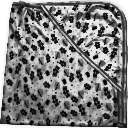

In [298]:
Image_PIL.fromarray(img_sift)

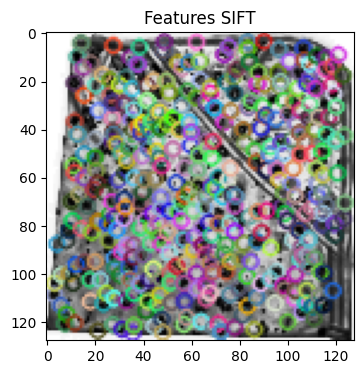

In [299]:
sift = cv2.SIFT_create()
kp = sift.detect(img_sift,None)
img=cv2.drawKeypoints(img_sift,kp,img_sift)

plt.figure(figsize=(4,4))
plt.title('Features SIFT')
plt.imshow(img)

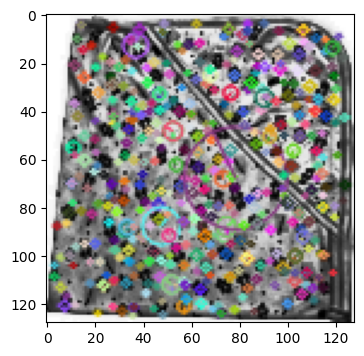

In [300]:
img=cv2.drawKeypoints(img_sift,kp,img_sift,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(4,4))
plt.imshow(img)

**ORB**

In [301]:
img_orb = preprocess(img_echantillon.iloc[i]['image'], path=True)

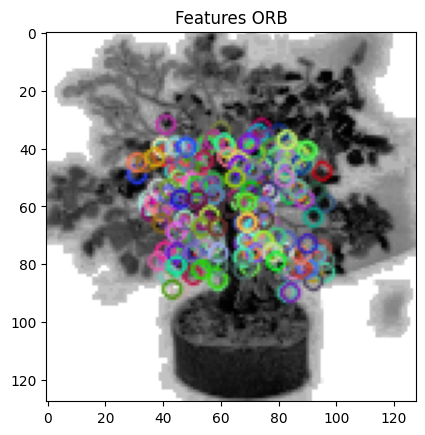

In [302]:
orb = cv2.ORB_create()

#find keypoints and descriptors
kp, des = orb.detectAndCompute(img_orb, mask = None)
#draw only keypoints location, not size and orientation:
image_orb = cv2.drawKeypoints(img_orb, kp, outImage = True, flags=2)
plt.title('Features ORB')
plt.imshow(image_orb)
plt.show()

In [303]:
len(kp)

241

In [304]:
des.shape

(241, 32)

**SURF**

In [305]:
img_surf = preprocess(img_echantillon.iloc[12]['image'], path=True)
import cv2
surf = cv2.xfeatures2d.SURF_create()

# surf = cv2.SURF.create()
kp = surf.detect(img_surf,None)
image_surf = cv2.drawKeypoints(img_surf, kp, outImage = True, flags=2)
plt.figure(figsize=(4,4))
plt.title('Features SURF')
plt.imshow(image_surf)

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

In [306]:
kp_surf, des_surf = sift.detectAndCompute(img_surf,None)

In [ ]:
des_surf[2].shape

In [ ]:
des_surf[0].shape

### Fonctions

In [ ]:
def get_files(path_list):
    '''Renvoie la liste des matrices d\'images à partir d'une liste de chemins'''
    liste_image = []
    compteur = 0
    for image_path in path_list:
        #im = cv2.imread(image_path, 0)
        im = np.array(Image_PIL.open(image_path))
        liste_image.append(im)
        compteur +=1
    return liste_image

In [ ]:
def create_features():
    '''Initialise un algorithme SURF'''
    return cv2.xfeatures2d.SURF_create()    

def features(surf, image):
    '''renvoie les keypoints et descripteurs d\'une image à partir du détecteur surf'''
    keypoints, descriptors = surf.detectAndCompute(image, None)
    return [keypoints, descriptors]

def pipeline_feature(image):
    '''traitement complet d\'une image : 
    * initialise l\'algorithme, 
    *prétraite l'image, 
    *recherche les features
    *retourne les features'''
    
    surf = create_features()
    image = preprocess(image, path=False)
    #gr = grey(image)
    keypoints, descriptors = features(surf, image)
    return keypoints, descriptors

In [ ]:
image_essai = get_files(img_echantillon['image'])[1]

In [ ]:
plt.imshow(image_essai)

In [ ]:

j=0

echantillon = get_files(img_echantillon['image'].tolist())
max_count = len(echantillon)
f = IntProgress(min=0, max=max_count) # instantiate the bar
chaine = str(0)+'/'+str(max_count)
g = Text(value=chaine)
display(f) # display the bar
display(g)
liste_keypoints = []
liste_descripteurs = []


for array_image in echantillon:
    j+=1
    kea, des = pipeline_feature(array_image)
    liste_keypoints.append(kea)
    liste_descripteurs.append(des)
    f.value = j # signal to increment the progress bar
    g.value =str(j)+'/'+str(max_count)

In [ ]:
liste_descripteurs[0].shape

In [ ]:
liste_descripteurs[0].reshape(1,-1)

In [ ]:
print('Nombre de liste de keypoints : ', len(liste_keypoints))
print('Nombre de keypoints pour l\'élément 0 : ', len(liste_keypoints[0]))
print('Nombre de keypoints pour l\'élément 2 : ', len(liste_keypoints[2]))

In [ ]:
print('Dimension descripteurs élément 0 : ', liste_descripteurs[0].shape)
print('Dimension descripteurs élément 1 : ', liste_descripteurs[1].shape)

In [ ]:
for el, ech in zip(liste_descripteurs, echantillon):
    print(el.shape, ' - ', ech.shape)

In [ ]:
plt.title('illustration des descripteurs d\'une image')
plt.imshow(liste_descripteurs[12], cmap='gray')

In [ ]:
plt.figure(figsize=(2,2))
plt.title('illustration d\'une feature')
plt.imshow(liste_descripteurs[0][12].reshape(8,8))

In [ ]:
def extraction_features(data_visu):
    '''Extraction des features à partir des données'''
    
    #chargement des images
    data_visu['image'] = data_visu['image'].apply(lambda x: 'data/Images/'+str(x))
    liste_images = get_files(data_visu['image'].tolist())
    max_count = len(liste_images)
    
    #affichage du compteur
    f = IntProgress(min=0, max=max_count) # instantiate the bar
    chaine = str(0)+'/'+str(max_count)
    g = Text(value=chaine)
    display(f) # display the bar
    display(g)
    liste_features = []
    liste_descripteurs = []
    liste_descripteurs_formates = []

    #boucle d'extraction des features de chaque image
    j=0
    for array_image in liste_images:
        j+=1
        fea, des = pipeline_feature(array_image)
        
        
        liste_features.append(fea)
        liste_descripteurs.append(des)
        f.value = j # signal to increment the progress bar
        g.value = str(j)+'/'+str(max_count)
    
    #harmonisation du nombre de features par image : détermination dimension maximum
    nb_features_max = 0
    for descripteur in liste_descripteurs:
        if descripteur.shape[0] > nb_features_max:
            nb_features_max = descripteur.shape[0]
    #on transforme les array des descripteurs en vecteurs (PM : un descripteur = 64 pixels de large)
    liste_descripteurs_flatten = []
    for descripteur in liste_descripteurs:
        liste_descripteurs_flatten.append(descripteur.reshape(1,-1))   
    
    #harmonisation du nombre de features par image : ajout pixels noirs
    k = 0
    for descripteur in liste_descripteurs_flatten:
        if descripteur.shape[0] <= nb_features_max*64:
            liste_descripteurs_formates.append(
                np.hstack([descripteur.reshape(1,-1), 
                           np.zeros(nb_features_max*64 - descripteur.shape[1]).reshape(1,-1)])
            )        
        else:
            liste_descripteurs_formates.append(descripteur)
            
    #assemblage_features
    array_descripteurs = np.vstack(liste_descripteurs_formates)
    
    del liste_descripteurs_formates, descripteur, liste_images, max_count
    
    
    return liste_features, liste_descripteurs, array_descripteurs

In [ ]:
data_visuelle = pd.concat([train, test]).copy()
#data_visuelle = data.sample(100, random_state=42)

features_total, descripteurs_total, descripteurs_array = extraction_features(data_visuelle)

In [ ]:
descripteurs_array.shape

In [ ]:
descripteurs_array[0,:]

In [ ]:
print(descripteurs_array.shape)
plt.figure(figsize=(10,10))
plt.imshow(descripteurs_array, cmap='gray')

export des descripteurs

### Création de nouvelles features à partir des descripteurs

In [ ]:
descripteurs_total[0].shape

In [ ]:
np.var(descripteurs_total[0])

In [ ]:
from scipy.stats import moment

liste_min = [np.min(descripteur) for descripteur in descripteurs_total]
liste_max = [np.max(descripteur) for descripteur in descripteurs_total]
liste_mean = [np.mean(descripteur) for descripteur in descripteurs_total]
liste_var = [np.var(descripteur) for descripteur in descripteurs_total]
liste_order_3 = [np.mean(moment(descripteur, moment = 3, axis=1)) for descripteur in descripteurs_total]
liste_order_4 = [np.mean(moment(descripteur, moment = 4, axis=1)) for descripteur in descripteurs_total]

In [ ]:
array_features_descripteurs = np.vstack([liste_min, liste_max, liste_mean, liste_var, liste_order_3, liste_order_4])

In [ ]:
%matplotlib inline

plt.figure()
plt.title('Min')
sns.distplot(liste_var)

plt.figure()
plt.title('Max')
sns.distplot(liste_max)

plt.figure()
plt.title('Mean')
sns.distplot(liste_mean)

plt.figure()
plt.title('Var')
sns.distplot(liste_var)

plt.figure()
plt.title('Mean Moment 3rd order')
sns.distplot(liste_order_3)

plt.figure()
plt.title('Mean Moment 4th order')
sns.distplot(liste_order_4)

### Export

In [ ]:
np.save('data_saved/array_descripteurs.csv', descripteurs_array)
np.save('data_saved/array_features_descripteurs', array_features_descripteurs)

## Classifieur non supervisé

### ACP

In [ ]:
pca_descripteurs = PCA()
features_ss = StandardScaler()
pca_descripteurs.fit(features_ss.fit_transform(np.transpose(descripteurs_array.T)))

In [ ]:
pca_descripteurs.n_components_

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(list(range(descripteurs_array.shape[0])),
         np.cumsum(pca_descripteurs.explained_variance_ratio_))

In [ ]:
np.cumsum(pca_descripteurs.explained_variance_ratio_)[650]

95 % de la variance totale avec 650 features

In [ ]:
array_descripteurs_reduit = pca_descripteurs.transform(descripteurs_array[:650,:])

In [ ]:
array_descripteurs_reduit.shape

In [ ]:
np.save('data_saved/array_descripteurs_reduit.csv', array_descripteurs_reduit)

### Classification

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

#### Kmeans

In [ ]:
dict_kmeans = {}
inertia = {}
max_clusters=80

f = IntProgress(min=0, max=max_clusters) # instantiate the bar
chaine = str(0)+'/'+str(max_count)
g = Text(value=chaine)
display(f) # display the bar
display(g)

for k in range(1,max_clusters+1):
    kmeans = KMeans(n_clusters=k,
                   verbose=1,
                   random_state=0,
                   n_jobs=-1).fit(array_descripteurs_reduit)
    inertia[k] = kmeans.inertia_
    dict_kmeans[k] = kmeans
    f.value = k # signal to increment the progress bar
    g.value =str(k+1)+'/'+str(max_clusters)

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Kmeans: Comparaison de la somme des inerties en fonction du nombre de clusters')
sns.lineplot(list(inertia.keys()),
             list(inertia.values())
            )

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:

silhouettes_kmeans = {}
for i in range(2,max_clusters):
    silhouettes_kmeans[i] = silhouette_score(X = array_descripteurs_reduit,
                                             labels= list(dict_kmeans[i].labels_))

plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen en fonction du nombre de clusters (kmeans)')
sns.scatterplot(x = list(silhouettes_kmeans.keys()),
               y = list(silhouettes_kmeans.values()))
plt.show()



In [ ]:
for key, value in silhouettes_kmeans.items():
    if value == max(silhouettes_kmeans.values()):
        print('le coefficient de silhouette est maximal pour {} clusters (score = {})'.format(key, value))
        nb_clusters = key

#### Visualisation des visual words

Exemple en prenant une séparation avec clusters

In [ ]:
plt.title('Visualisation d\'un visual word (après transformation inverse PCA)')

plt.imshow(np.dot(dict_kmeans[25].cluster_centers_[4], pca_descripteurs.components_[:, :650]).reshape(26,25))

#### Histogrammes

## CNN Données visuelles

### Report fonctions

In [ ]:
def get_files(path_list):
    '''Renvoie la liste des matrices d\'images à partir d'une liste de chemins'''
    liste_image = []
    compteur = 0
    for image_path in path_list:
        #im = cv2.imread(image_path, 0)
        im = np.array(Image_PIL.open(image_path))
        liste_image.append(im)
        compteur +=1
    
    del compteur
    del im
    
    return liste_image

In [ ]:
def redim(array_im, width, height):
    '''Redimensionne l\'image correspondant à array_im dans la largeur et la hauteur définie'''
    min_x = 100000
    max_x = 0
    min_y = 100000
    max_y = 0
    shape = array_im.shape
    if shape[0] < min_x:
        min_x = shape[0]
    elif shape[0] > max_x:
        max_x = shape[0]
    if shape[1] < min_y:
        min_y = shape[1]
    elif shape[1] > max_y:
        max_y = shape[1]
    im = cv2.resize(array_im, dsize=(width,height))
    
    del shape
    
    return im

### Données

In [ ]:
train['image'] = train['image'].apply(lambda x: 'data/Images/'+str(x))
test['image'] = test['image'].apply(lambda x: 'data/Images/'+str(x))

In [ ]:
train_cnn = get_files(train.copy()['image'].tolist())
test_cnn = get_files(test.copy()['image'].tolist())

In [ ]:
len(train_cnn)

In [ ]:
len(test_cnn)

In [ ]:
redim(train_cnn[0], 128, 128).shape

In [ ]:
redim(train_cnn[0], 128, 128).reshape(1,-1,3).shape

In [ ]:
train_array_cnn = np.vstack([redim(img, 128, 128).reshape(1,128,128,3) for img in train_cnn])
test_array_cnn = np.vstack([redim(img, 128, 128).reshape(1,128,128,3) for img in test_cnn])

In [ ]:
train_array_cnn.shape

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
array_cats = ohe.fit_transform(np.array(train['cat_lvl_2']).reshape(-1,1))

In [ ]:
array_cats.todense().shape

In [ ]:
array_cats.shape

In [ ]:
train_array_cats = ohe.transform(train[['cat_lvl_2']]).todense()
test_array_cats = ohe.transform(test[['cat_lvl_2']]).todense()

In [ ]:
ohe.categories_

### Construction Réseau

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Activation

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(128,128,3,)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(ohe.categories_[0].shape[0], activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='sgd')

In [ ]:
model.summary()

### Entraînement

In [ ]:
train_array_cnn.shape

In [ ]:
model_info = model.fit(train_array_cnn, train_array_cats, epochs=3, batch_size=40, verbose=2)

In [ ]:
for couche in model.get_weights():
    print(couche.shape)

In [ ]:
predictions_test = model.predict(test_array_cnn)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(predictions_test, axis=1).reshape(-1,1), 
               np.argmax(test_array_cats, axis=1).reshape(-1,1))

In [ ]:
np.argmax(test_array_cats, axis=1).reshape(1,-1)

In [ ]:
np.argmax(predictions_test, axis=1)

In [ ]:
ohe.categories_[0][25]

### Observations

<span style='color:red'>8 % d'accuracy mais la prédiction est la même pour toutes les images du jeu de données. 
La catégorie prédite est la catégorie la plus représentée dans notre jeu de données de base.
Le résultat n'est pas concluant</span>

### Classification non supervisée 

In [ ]:
from keras.models import clone_model

On retire les 2 dernières couches du réseau de neurone pour accéder aux features

In [ ]:
unsupervised_model= clone_model(model)
unsupervised_model.layers.pop()
unsupervised_model.layers.pop()
unsupervised_model.compile(loss='mean_squared_error', optimizer='sgd')


In [ ]:
unsupervised_array = unsupervised_model.predict(train_array_cnn)

In [ ]:
unsupervised_array.shape

In [ ]:
dict_kmeans = {}
inertia = {}
max_clusters=50

f = IntProgress(min=0, max=max_clusters) # instantiate the bar
chaine = str(0)+'/'+str(max_clusters)
g = Text(value=chaine)
display(f) # display the bar
display(g)

for k in range(1,max_clusters+1):
    kmeans = KMeans(n_clusters=k,
                   verbose=1,
                   random_state=0,
                   n_jobs=-1).fit(unsupervised_array)
    inertia[k] = kmeans.inertia_
    dict_kmeans[k] = kmeans
    f.value = k # signal to increment the progress bar
    g.value =str(k+1)+'/'+str(max_clusters)

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Kmeans: Comparaison de la somme des inerties en fonction du nombre de clusters')
sns.lineplot(list(inertia.keys()),
             list(inertia.values())
            )

In [ ]:
silhouettes_kmeans = {}
for i in range(2,max_clusters):
    silhouettes_kmeans[i] = silhouette_score(X = unsupervised_array,
                                             labels= list(dict_kmeans[i].labels_))

plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen en fonction du nombre de clusters (kmeans)')
sns.scatterplot(x = list(silhouettes_kmeans.keys()),
               y = list(silhouettes_kmeans.values()))
plt.show()



In [ ]:
for key, value in silhouettes_kmeans.items():
    if value == max(silhouettes_kmeans.values()):
        print('le coefficient de silhouette est maximal pour {} clusters (score = {})'.format(key, value))
        nb_clusters_optimal = key

Nombre d'éléments par catégorie

In [ ]:
pd.DataFrame(dict_kmeans[8].labels_)[0].value_counts()

In [ ]:
train_labelized = train.copy()
train_labelized['label_kmeans'] = dict_kmeans[nb_clusters_optimal].labels_

In [ ]:
train_labelized.groupby(['label_kmeans']).apply(lambda x: (x.groupby('cat_lvl_2')
                                      .count()
                                      .sort_values('cat_lvl_2', ascending=False))
                                     )['uniq_id']

In [ ]:
pd.DataFrame(train, )

In [ ]:
%matplotlib inline
k = 0
for image in train_labelized[train_labelized['label_kmeans'] == 0]['image'].tolist():
    if k < 20:
        chemin = image
        plt.figure()
        plt.imshow(Image_PIL.open(chemin))
        plt.show()
        k+=1
    else:
        break

In [193]:
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.tokenize import word_tokenize
import random
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.classify.util import accuracy

# Charger votre DataFrame

data_nbc = data.copy()
# Supprimer les lignes avec des valeurs manquantes dans les colonnes d'intérêt
data_nbc = data_nbc.dropna(subset=['description', 'cat_lvl_2'])

# Prétraitement des données : tokenisation, suppression des stopwords
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return dict([(word, True) for word in tokens])

# Appliquer le prétraitement
data_nbc['features'] = data_nbc['description'].apply(preprocess)

# Créer un ensemble de données d'entraînement et de test
train_data, test_data = train_test_split(data_nbc, test_size=0.2, random_state=42)

# Préparer les données d'entraînement au format attendu par NLTK
train_set = [(features, label) for features, label in zip(train_data['features'], train_data['cat_lvl_2'])]

# Entraîner le classificateur Naive Bayes
classifier = NaiveBayesClassifier.train(train_set)

# Préparer les données de test au format attendu par NLTK
test_set = [(features, label) for features, label in zip(test_data['features'], test_data['cat_lvl_2'])]

# Évaluer la précision du classificateur sur les données de test
accuracy_score = accuracy(classifier, test_set)
print(f'Précision du classificateur : {accuracy_score:.2%}')

Précision du classificateur : 36.67%



Dans ce code :

- Nous prétraitons les données en les tokenisant, en convertissant en minuscules et en supprimant les stopwords.
- Nous divisons les données en un ensemble d'entraînement et un ensemble de test à l'aide de `train_test_split`.
- Nous formons le modèle Naive Bayes sur l'ensemble d'entraînement.
- Nous évaluons la précision du modèle sur l'ensemble de test.


In [206]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Charger votre DataFrame depuis vos données (Assurez-vous d'avoir déjà chargé vos données dans 'data')
df = data.copy()

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df['description'], df['cat_lvl_2'], test_size=0.2, random_state=42)

# Créer un vecteur de caractéristiques en utilisant un Bag-of-Words binaire
vectorizer = CountVectorizer(binary=True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Entraînement des modèles
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Augmentez max_iter si nécessaire
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.2f}")
    print(f'Précision du classificateur : {name} - {accuracy:.2%}')

Naive Bayes - Accuracy: 0.53
Précision du classificateur : Naive Bayes - 52.86%
Logistic Regression - Accuracy: 0.86
Précision du classificateur : Logistic Regression - 86.19%
SVM - Accuracy: 0.68
Précision du classificateur : SVM - 67.62%
Random Forest - Accuracy: 0.81
Précision du classificateur : Random Forest - 80.95%


In [204]:
# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from nltk.classify import NaiveBayesClassifier
# from nltk.tokenize import word_tokenize
# import nltk
# nltk.download('punkt')

# # Charger votre DataFrame depuis vos données (Assurez-vous d'avoir déjà chargé vos données dans 'data')
# # Supprimez les colonnes inutiles pour la classification (conservez uniquement 'description' et 'cat_lvl_2')
# df = data[['description', 'cat_lvl_2']].copy()

# # Nettoyage des données : convertir les données en texte Unicode en spécifiant l'encodage (UTF-8)
# df['description'] = df['description'].str.decode('utf-8', errors='ignore')

# # Assurez-vous que toutes les données textuelles sont des chaînes de caractères
# df['description'] = df['description'].astype(str)

# # Division des données en ensembles d'entraînement et de test
# X_train, X_test, y_train, y_test = train_test_split(df['description'], df['cat_lvl_2'], test_size=0.2, random_state=42)

# # Créer un vecteur de caractéristiques en utilisant un Bag-of-Words binaire
# vectorizer = CountVectorizer(binary=True)
# X_train_vectorized = vectorizer.fit_transform(X_train)
# X_test_vectorized = vectorizer.transform(X_test)

# # Convertir les représentations vectorielles en texte
# X_train_text = [vectorizer.inverse_transform(vec)[0] for vec in X_train_vectorized]
# X_test_text = [vectorizer.inverse_transform(vec)[0] for vec in X_test_vectorized]

# # Entraînement des modèles
# models = {
#     "Naive Bayes MultinomialNB": MultinomialNB(),
#     "Logistic Regression": LogisticRegression(max_iter=1000),  # Augmentez max_iter si nécessaire
#     "SVM": SVC(),
#     "Random Forest": RandomForestClassifier(),
#     "Naive Bayes Classifier": NaiveBayesClassifier.train([(word_tokenize(desc), cat) for desc, cat in zip(X_train_text, y_train)])
# }

# for name, model in models.items():
#     if name == "Naive Bayes Classifier":
#         y_pred = [model.classify(word_tokenize(desc)) for desc in X_test_text]
#     else:
#         model.fit(X_train_vectorized, y_train)
#         y_pred = model.predict(X_test_vectorized)
    
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"{name} - Accuracy: {accuracy:.2f}")


In [215]:
data.sample(5)

uniq_id            crawl_timestamp  \
857  a41371b2f8859b015031f0d5eda5184c  2015-12-29 05:07:38 +0000   
598  291d5ff1e50dac3058cf10578f692085  2016-01-04 05:43:32 +0000   
587  6b04c746cac2aa811d7a8753e54dc96e  2016-01-07 05:50:25 +0000   
761  294a26262643797cb07f72f1b55262ae  2015-12-12 11:46:53 +0000   
298  2971287a1ac427bd98c4778112d20d06  2016-03-18 14:30:46 +0000   

                                           product_url  \
857  http://www.flipkart.com/99gems-smart-otg-conne...   
598  http://www.flipkart.com/saco-karbonn-smart-ta-...   
587  http://www.flipkart.com/maxima-07034lmli-attiv...   
761  http://www.flipkart.com/perucci-pc-301-analog-...   
298  http://www.flipkart.com/jayenterprise-plastic-...   

                                          product_name  \
857      99Gems Smart OTG Connection kit USB USB Cable   
598  Saco Karbonn Smart Ta Fone A37 Hd Tablet Wired...   
587  Maxima 07034LMLI Attivo Analog Watch  - For Women   
761             Perucci PC-301 Analog Watch  - For Men   
298                  JayEnterprise Plastic Hand Juicer   

                                 product_category_tree               pid  \
857  ["Computers >> Laptop Accessories >> USB Gadge...  USGEDSKFXUHKEGME   
598  ["Computers >> Tablet Accessories >> Keyboards...  ACCE4JKYGQGYYHBG   
587  ["Watches >> Wrist Watches >> Maxima Wrist Wat...  WATDYFQ557AP8EVM   
761  ["Watches >> Wrist Watches >> Perucci Wrist Wa...  WATE3FAGH3DKJSFC   
298  ["Kitchen & Dining >> Kitchen Tools >> Kitchen...  HJREGXNFQMRPYVU3   

     retail_price  discounted_price                                 image  \
857         399.0             199.0  a41371b2f8859b015031f0d5eda5184c.jpg   
598         550.0             500.0  291d5ff1e50dac3058cf10578f692085.jpg   
587         675.0             641.0  6b04c746cac2aa811d7a8753e54dc96e.jpg   
761        2500.0            1395.0  294a26262643797cb07f72f1b55262ae.jpg   
298        1499.0             750.0  2971287a1ac427bd98c4778112d20d06.jpg   

     is_FK_Advantage_product  \
857                    False   
598                    False   
587                    False   
761                    False   
298                    False   

                                           description       product_rating  \
857  99Gems Smart OTG Connection kit USB USB Cable ...  No rating available   
598  Buy Saco Karbonn Smart Ta Fone A37 Hd Tablet W...  No rating available   
587  Maxima 07034LMLI Attivo Analog Watch  - For Wo...  No rating available   
761  Perucci PC-301 Analog Watch  - For Men - Buy P...  No rating available   
298  Specifications of JayEnterprise Plastic Hand J...  No rating available   

          overall_rating          brand  \
857  No rating available         99Gems   
598  No rating available           Saco   
587  No rating available            NaN   
761  No rating available            NaN   
298  No rating available  JayEnterprise   

                                product_specifications  
857  {"product_specification"=>[{"key"=>"Brand", "v...  
598  {"product_specification"=>[{"key"=>"Interface"...  
587  {"product_specification"=>[{"key"=>"Type", "va...  
761  {"product_specification"=>[{"key"=>"Type", "va...  
298  {"product_specification"=>[{"key"=>"Brand", "v...

# Étape 7 : Création et entraînement d'un modèle d'apprentissage profond
    # CE1 : Définir la stratégie d'élaboration d'un modèle
    # CE2 : Identifier les cibles
    # CE3 : Séparer le jeu de données en jeu d'entraînement, jeu de validation et jeu de test
    # CE4 : Éviter les fuites d'information entre les jeux de données
    # CE5 : Tester plusieurs modèles d'apprentissage profond
    # CE6 : Mettre en œuvre des modèles à partir de modèles pré-entraînés (Transfer Learning)


In [255]:
# data = pd.read_csv('data/flipkart_com-ecommerce_sample_1050.csv')
# Charger les données depuis un fichier (data.csv par exemple)
data = data_level.copy()

In [258]:
!pip uninstall tensorflow
!pip install tensorflow==2.5.0
import tensorflow as tf
print(tf.__version__)

^C
Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 422.6/422.6 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
     --------------------------------------- 13.3/13.3 MB 50.4 MB/s eta 0:00:00
     ---------------------------------------- 2.9/2.9 MB 63.4 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 57.3 MB/s eta 0:00:00
     -------------------------------------- 132.0/132.0 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.2/1.2 MB 38.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 462.4/462.4 kB 30.1 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 59.1 MB/s eta 0:00:00

ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\Zbook\\AppData\\Roaming\\Python\\Python39\\site-packages\\google\\~upb\\_message.cp39-win_amd64.pyd'
Check the permissions.



In [228]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense
# from tensorflow.keras.utils import to_categorical
# from sklearn.metrics import accuracy_score
# from sklearn.feature_extraction.text import TfidfVectorizer
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
# from tensorflow.keras.applications import VGG16, ResNet50
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam

# # Fonction pour définir la stratégie d'élaboration d'un modèle
# def define_model_strategy(business_need):
#     """
#     Définit la stratégie du modèle en réponse à un besoin métier spécifique.

#     Parameters:
#     business_need (str): Une description du besoin métier qui influencera la stratégie du modèle.

#     Returns:
#     model_strategy (str): Une chaîne de caractères décrivant la stratégie du modèle en fonction du besoin métier.
#     """

#     # Exemple générique : stratégie basée sur un besoin métier
#     if "réutilisation de modèles pré-entraînés" in business_need:
#         model_strategy = "Utilisation de modèles pré-entraînés pour accélérer le développement."
#     else:
#         model_strategy = "Conception d'un modèle personnalisé pour répondre au besoin métier spécifique."

#     return model_strategy

# # # Fonction pour identifier les cibles
# # def identify_targets(data):
# #     # Exemple : supposons que la colonne "cat_lvl_1" contienne les cibles
# #     targets = data['cat_lvl_1']
# #     return targets

# # Fonction pour identifier les cibles
# def identify_targets(data):
#     # Sélectionnez les trois colonnes cat_lvl_1, cat_lvl_2 et cat_lvl_3 comme cibles
#     targets = data[['cat_lvl_1', 'cat_lvl_2', 'cat_lvl_3']]
#     return targets

# # Fonction pour séparer le jeu de données en jeu d'entraînement, jeu de validation et jeu de test
# def split_data(data):
#     X_train, X_temp, y_train, y_temp = train_test_split(data['description'], data['cat_lvl_1'], test_size=0.3, random_state=42)
#     X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
#     return X_train, X_val, X_test, y_train, y_val, y_test

# # Fonction pour éviter les fuites d'information entre les jeux de données
# # def avoid_data_leakage(X_train, X_val, X_test, y_train, y_val, y_test):
# #     # Code pour éviter les fuites d'information
# #     # Vous pouvez implémenter votre logique ici
# #     # Par exemple, si vous devez effectuer un prétraitement spécifique pour éviter les fuites, faites-le ici

# #     return X_train, X_val, X_test, y_train, y_val, y_test

# # Fonction pour éviter les fuites d'information entre les jeux de données
# def avoid_data_leakage(X_train, X_val, X_test):
#     # Créez un vecteur de caractéristiques en utilisant TF-IDF
#     vectorizer = TfidfVectorizer()
    
#     # Ajustez le vecteur de caractéristiques sur le jeu d'entraînement
#     X_train_tfidf = vectorizer.fit_transform(X_train)
    
#     # Transformez les jeux de validation et de test en utilisant le même vecteur de caractéristiques
#     X_val_tfidf = vectorizer.transform(X_val)
#     X_test_tfidf = vectorizer.transform(X_test)
    
#     # Vérifiez s'il y a une fuite d'information entre les jeux de données
#     if not (X_train_tfidf.indices == X_val_tfidf.indices).all() or \
#        not (X_train_tfidf.indices == X_test_tfidf.indices).all():
#         print("Attention : Il y a une fuite d'information entre les jeux de données !")
#     else:
#         print("Aucune fuite d'information entre les jeux de données.")
    
#     return X_train_tfidf, X_val_tfidf, X_test_tfidf


# # Fonction pour tester plusieurs modèles d'apprentissage profond
# def test_deep_learning_models(X_train, y_train, X_val, y_val):
#     models = []

#     # Modèle simple avec une couche Dense
#     model1 = Sequential()
#     model1.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
#     model1.add(Dense(1, activation='sigmoid'))
#     models.append(("Dense Model", model1))

#     # Modèle avec une couche d'embedding et LSTM
#     model2 = Sequential()
#     model2.add(Embedding(input_dim=X_train.shape[1], output_dim=64, input_length=X_train.shape[1]))
#     model2.add(LSTM(64))
#     model2.add(Dense(1, activation='sigmoid'))
#     models.append(("Embedding + LSTM Model", model2))

#     # Modèle avec une couche de convolution (Conv1D) et MaxPooling
#     model3 = Sequential()
#     model3.add(Embedding(input_dim=X_train.shape[1], output_dim=64, input_length=X_train.shape[1]))
#     model3.add(Conv1D(64, 5, activation='relu'))
#     model3.add(MaxPooling1D(5))
#     model3.add(GlobalMaxPooling1D())
#     model3.add(Dense(1, activation='sigmoid'))
#     models.append(("Conv1D + MaxPooling Model", model3))

#     # Modèle avec une couche Bidirectional LSTM
#     model4 = Sequential()
#     model4.add(Embedding(input_dim=X_train.shape[1], output_dim=64, input_length=X_train.shape[1]))
#     model4.add(Bidirectional(LSTM(64)))
#     model4.add(Dense(1, activation='sigmoid'))
#     models.append(("Bidirectional LSTM Model", model4))

#     # Modèle avec plusieurs couches Dropout
#     model5 = Sequential()
#     model5.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
#     model5.add(Dropout(0.5))
#     model5.add(Dense(32, activation='relu'))
#     model5.add(Dropout(0.5))
#     model5.add(Dense(1, activation='sigmoid'))
#     models.append(("Dropout Model", model5))

#     best_model = None
#     best_accuracy = 0.0

#     for model_name, model in models:
#         model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#         model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), verbose=0)
#         _, accuracy = model.evaluate(X_val, y_val)
#         print(f"Model '{model_name}' Accuracy: {accuracy}")
#         if accuracy > best_accuracy:
#             best_accuracy = accuracy
#             best_model = model

#     return best_model

# # Fonction pour mettre en œuvre des modèles à partir de modèles pré-entraînés (Transfer Learning)
# def implement_transfer_learning(X_train, y_train, X_val, y_val, base_model_name="VGG16", num_classes=2, epochs=10):
#     # Charger un modèle pré-entraîné (par exemple, VGG16 ou ResNet50)
#     if base_model_name == "VGG16":
#         base_model = VGG16(weights='imagenet', include_top=False)
#     elif base_model_name == "ResNet50":
#         base_model = ResNet50(weights='imagenet', include_top=False)
#     else:
#         raise ValueError("Nom de modèle pré-entraîné non pris en charge.")

#     # Ajouter des couches personnalisées au modèle pré-entraîné
#     x = base_model.output
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(1024, activation='relu')(x)
#     x = Dropout(0.5)(x)
#     predictions = Dense(num_classes, activation='softmax')(x)

#     # Créer un modèle combinant le modèle pré-entraîné et les couches personnalisées
#     model = Model(inputs=base_model.input, outputs=predictions)

#     # Geler les couches du modèle pré-entraîné (sauf les couches personnalisées)
#     for layer in base_model.layers:
#         layer.trainable = False

#     # Compiler le modèle
#     model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

#     # Entraîner le modèle avec les données d'entraînement
#     model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))

#     return model


# # Fonction principale pour l'entraînement du modèle d'apprentissage profond
# def train_deep_learning_model(data):
#     # Étape 1 : Définir la stratégie d'élaboration d'un modèle
#     model_strategy = define_model_strategy(data)

#     # Étape 2 : Identifier les cibles
#     targets = identify_targets(data)

#     # Étape 3 : Séparer le jeu de données en jeu d'entraînement, jeu de validation et jeu de test
#     X_train, X_val, X_test, y_train, y_val, y_test = split_data(data)

# #     # Étape 4 : Éviter les fuites d'information entre les jeux de données
# #     X_train, X_val, X_test = avoid_data_leakage(X_train, X_val, X_test)
#     # Étape 4 : Éviter les fuites d'information entre les jeux de données
#     X_train, X_val, X_test, y_train, y_val, y_test = avoid_data_leakage(X_train, X_val, X_test, y_train, y_val, y_test)


#     # Étape 5 : Tester plusieurs modèles d'apprentissage profond
#     best_model = test_deep_learning_models(X_train, y_train, X_val, y_val)

#     # Étape 6 : Mettre en œuvre des modèles à partir de modèles pré-entraînés (Transfer Learning)
#     transfer_learning_model = implement_transfer_learning(X_train, y_train, X_val, y_val)

#     return best_model, transfer_learning_model


# # Appel de la fonction principale
# best_model, transfer_learning_model = train_deep_learning_model(data)


In [227]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
tf.compat.v1.experimental.output_all_intermediates(True)

# Fonction pour définir la stratégie d'élaboration d'un modèle
def define_model_strategy(business_need):
    """
    Définit la stratégie du modèle en réponse à un besoin métier spécifique.

    Parameters:
    business_need (str): Une description du besoin métier qui influencera la stratégie du modèle.

    Returns:
    model_strategy (str): Une chaîne de caractères décrivant la stratégie du modèle en fonction du besoin métier.
    """

    # Exemple générique : stratégie basée sur un besoin métier
    if "réutilisation de modèles pré-entraînés" in business_need:
        model_strategy = "Utilisation de modèles pré-entraînés pour accélérer le développement."
    else:
        model_strategy = "Conception d'un modèle personnalisé pour répondre au besoin métier spécifique."

    return model_strategy

# Fonction pour identifier les cibles
def identify_targets(data):
    # Sélectionnez les trois colonnes cat_lvl_1, cat_lvl_2 et cat_lvl_3 comme cibles
    targets = data[['cat_lvl_1', 'cat_lvl_2', 'cat_lvl_3']]
    return targets

# Fonction pour séparer le jeu de données en jeu d'entraînement, jeu de validation et jeu de test
def split_data(data):
    X_train, X_temp, y_train, y_temp = train_test_split(data['description'], data['cat_lvl_1'], test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Fonction pour éviter les fuites d'information entre les jeux de données
def avoid_data_leakage(X_train, X_val, X_test):
    # Créez un vecteur de caractéristiques en utilisant TF-IDF
    vectorizer = TfidfVectorizer()
    
    # Ajustez le vecteur de caractéristiques sur le jeu d'entraînement
    X_train_tfidf = vectorizer.fit_transform(X_train)
    
    # Transformez les jeux de validation et de test en utilisant le même vecteur de caractéristiques
    X_val_tfidf = vectorizer.transform(X_val)
    X_test_tfidf = vectorizer.transform(X_test)
    
    # Vérifiez s'il y a une fuite d'information entre les jeux de données
    if not np.array_equal(X_train_tfidf.toarray(), X_val_tfidf.toarray()) or \
       not np.array_equal(X_train_tfidf.toarray(), X_test_tfidf.toarray()):
        print("Attention : Il y a une fuite d'information entre les jeux de données !")
    else:
        print("Aucune fuite d'information entre les jeux de données.")
    
    return X_train_tfidf, X_val_tfidf, X_test_tfidf


# Fonction pour tester plusieurs modèles d'apprentissage profond
# Fonction pour tester plusieurs modèles d'apprentissage profond
def test_deep_learning_models(X_train, y_train, X_val, y_val):
    models = []

    # Modèle simple avec une couche Dense
    model1 = Sequential()
    model1.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model1.add(Dense(y_train.shape[1], activation='softmax'))  # Utilisation de softmax pour la classification multi-classe
    models.append(("Dense Model", model1))

    # Modèle avec une couche d'embedding et LSTM
    model2 = Sequential()
    model2.add(Embedding(input_dim=X_train.shape[1], output_dim=64, input_length=X_train.shape[1]))
    model2.add(LSTM(64))
#     model2.add(LSTM(64, return_sequences=True)) 
    model2.add(Dense(y_train.shape[1], activation='softmax'))  # Utilisation de softmax pour la classification multi-classe
    models.append(("Embedding + LSTM Model", model2))

    # Modèle avec une couche de convolution (Conv1D) et MaxPooling
    model3 = Sequential()
    model3.add(Embedding(input_dim=X_train.shape[1], output_dim=64, input_length=X_train.shape[1]))
    model3.add(Conv1D(64, 5, activation='relu'))
    model3.add(MaxPooling1D(5))
    model3.add(GlobalMaxPooling1D())
    model3.add(Dense(y_train.shape[1], activation='softmax'))  # Utilisation de softmax pour la classification multi-classe
    models.append(("Conv1D + MaxPooling Model", model3))

    # Modèle avec une couche Bidirectional LSTM
    model4 = Sequential()
    model4.add(Embedding(input_dim=X_train.shape[1], output_dim=64, input_length=X_train.shape[1]))
    model4.add(Bidirectional(LSTM(64)))
    model4.add(Dense(y_train.shape[1], activation='softmax'))  # Utilisation de softmax pour la classification multi-classe
    models.append(("Bidirectional LSTM Model", model4))

#     # Modèle avec plusieurs couches Dropout
#     model5 = Sequential()
#     model5.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
#     model5.add(Dropout(0.5))
#     model5.add(Dense(32, activation='relu'))
#     model5.add(Dropout(0.5))
#     model5.add(Dense(y_train.shape[1], activation='softmax'))  # Utilisation de softmax pour la classification multi-classe
#     models.append(("Dropout Model", model5))

    best_model = None
    best_accuracy = 0.0

    for model_name, model in models:
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#         model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), verbose=0)
        model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)
        _, accuracy = model.evaluate(X_val, y_val)
        print(f"Model '{model_name}' Accuracy: {accuracy}")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

    return best_model

# Fonction pour mettre en œuvre des modèles à partir de modèles pré-entraînés (Transfer Learning)
def implement_transfer_learning(X_train, y_train, X_val, y_val, base_model_name="VGG16", num_classes=2, epochs=10):
    # Charger un modèle pré-entraîné (par exemple, VGG16 ou ResNet50)
    if base_model_name == "VGG16":
        base_model = VGG16(weights='imagenet', include_top=False)
    elif base_model_name == "ResNet50":
        base_model = ResNet50(weights='imagenet', include_top=False)
    else:
        raise ValueError("Nom de modèle pré-entraîné non pris en charge.")

    # Ajouter des couches personnalisées au modèle pré-entraîné
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Créer un modèle combinant le modèle pré-entraîné et les couches personnalisées
    model = Model(inputs=base_model.input, outputs=predictions)

    # Geler les couches du modèle pré-entraîné (sauf les couches personnalisées)
    for layer in base_model.layers:
        layer.trainable = False

    # Compiler le modèle
    model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Entraîner le modèle avec les données d'entraînement
    model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))

    return model

# # Fonction principale pour l'entraînement du modèle d'apprentissage profond
# def train_deep_learning_model(data):
#     # Étape 1 : Définir la stratégie d'élaboration d'un modèle
#     model_strategy = define_model_strategy(data)

#     # Étape 2 : Identifier les cibles
#     targets = identify_targets(data)

#     # Étape 3 : Séparer le jeu de données en jeu d'entraînement, jeu de validation et jeu de test
#     X_train, X_val, X_test, y_train, y_val, y_test = split_data(data)

#     # Étape 4 : Éviter les fuites d'information entre les jeux de données
#     X_train, X_val, X_test = avoid_data_leakage(X_train, X_val, X_test)

#     # Étape 5 : Tester plusieurs modèles d'apprentissage profond
#     best_model = test_deep_learning_models(X_train, y_train, X_val, y_val)

#     # Étape 6 : Mettre en œuvre des modèles à partir de modèles pré-entraînés (Transfer Learning)
#     transfer_learning_model = implement_transfer_learning(X_train, y_train, X_val, y_val)

#     return best_model, transfer_learning_model

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# ...

# Fonction principale pour l'entraînement du modèle d'apprentissage profond
def train_deep_learning_model(data):
    # Étape 1 : Définir la stratégie d'élaboration d'un modèle
    model_strategy = define_model_strategy(data)

    # Étape 2 : Identifier les cibles
    targets = identify_targets(data)

    # Étape 3 : Séparer le jeu de données en jeu d'entraînement, jeu de validation et jeu de test
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(data)

    # Étape 4 : Éviter les fuites d'information entre les jeux de données
    X_train, X_val, X_test = avoid_data_leakage(X_train, X_val, X_test)

    # Étape 5 : Encoder les étiquettes (cibles)
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_val_encoded = label_encoder.transform(y_val)
    y_test_encoded = label_encoder.transform(y_test)

    # Convertir les étiquettes en vecteurs de classe one-hot
    num_classes = len(label_encoder.classes_)
    y_train_encoded_one_hot = to_categorical(y_train_encoded, num_classes)
    y_val_encoded_one_hot = to_categorical(y_val_encoded, num_classes)
    y_test_encoded_one_hot = to_categorical(y_test_encoded, num_classes)

    # Étape 6 : Tester plusieurs modèles d'apprentissage profond
    best_model = test_deep_learning_models(X_train, y_train_encoded_one_hot, X_val, y_val_encoded_one_hot)

    # Étape 7 : Mettre en œuvre des modèles à partir de modèles pré-entraînés (Transfer Learning)
    transfer_learning_model = implement_transfer_learning(X_train, y_train_encoded_one_hot, X_val, y_val_encoded_one_hot)

    return best_model, transfer_learning_model

# ...


In [228]:
# Appel de la fonction principale
best_model, transfer_learning_model = train_deep_learning_model(data)

Attention : Il y a une fuite d'information entre les jeux de données !
Train on 735 samples, validate on 157 samples
Epoch 1/10
512/735 [===================>..........] - ETA: 0s - loss: 1.9315 - accuracy: 0.3145

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


735/735 [==============================] - 1s 697us/sample - loss: 1.9206 - accuracy: 0.3932 - val_loss: 1.8720 - val_accuracy: 0.7006
Epoch 2/10
735/735 [==============================] - 0s 139us/sample - loss: 1.8107 - accuracy: 0.8190 - val_loss: 1.7508 - val_accuracy: 0.8344
Epoch 3/10
735/735 [==============================] - 0s 133us/sample - loss: 1.6558 - accuracy: 0.8952 - val_loss: 1.6011 - val_accuracy: 0.8662
Epoch 4/10
735/735 [==============================] - 0s 131us/sample - loss: 1.4710 - accuracy: 0.9483 - val_loss: 1.4343 - val_accuracy: 0.8981
Epoch 5/10
735/735 [==============================] - 0s 132us/sample - loss: 1.2721 - accuracy: 0.9755 - val_loss: 1.2664 - val_accuracy: 0.9108
Epoch 6/10
735/735 [==============================] - 0s 135us/sample - loss: 1.0740 - accuracy: 0.9878 - val_loss: 1.1036 - val_accuracy: 0.9236
Epoch 7/10
735/735 [==============================] - 0s 139us/sample - loss: 0.8879 - accuracy: 0.9891 - val_loss: 0.9530 - val_accura

ValueError: Error when checking input: expected input_1 to have 4 dimensions, but got array with shape (735, 4812)

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.classify import NaiveBayesClassifier
import re
import numpy as np
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM
from tensorflow.keras.initializers import Constant

nltk.download('punkt')

def preprocess_text(text):
    # Mettez en minuscules
    text = text.lower()
    # Supprimez la ponctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text

def train_deep_learning_model(data):
    # Étape 1 : Prétraitement des données
    data['description'] = data['description'].apply(preprocess_text)

    # Étape 2 : Extraction des caractéristiques
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(data['description'])
    X = tokenizer.texts_to_sequences(data['description'])
    X = pad_sequences(X, maxlen=100)

    # Étape 3 : Encodage de la variable cible
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(data['cat_lvl_1'])

    # Étape 4 : Séparation en ensembles d'entraînement, de validation et de test
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Étape 5 : Création du modèle d'apprentissage profond
    model = Sequential()
    model.add(Embedding(5000, 100, input_length=100))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Étape 6 : Entraînement du modèle
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

    # Étape 7 : Évaluation du modèle
    accuracy = model.evaluate(X_test, y_test)[1]

    return model, accuracy

# Appel de la fonction principale
best_model, accuracy = train_deep_learning_model(data)

print("Précision du modèle:", accuracy)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Zbook\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 1/10
12/12 [==============================] - 1s 39ms/step - loss: 1.7388 - accuracy: 0.3918 - val_loss: 1.4649 - val_accuracy: 0.5287
Epoch 2/10
12/12 [==============================] - 0s 26ms/step - loss: 1.1927 - accuracy: 0.7102 - val_loss: 1.1640 - val_accuracy: 0.6242
Epoch 3/10
12/12 [==============================] - 0s 24ms/step - loss: 0.8147 - accuracy: 0.7837 - val_loss: 0.9311 - val_accuracy: 0.6943
Epoch 4/10
12/12 [==============================] - 0s 24ms/step - loss: 0.4505 - accuracy: 0.8966 - val_loss: 0.7940 - val_accuracy: 0.7197
Epoch 5/10
12/12 [==============================] - 0s 23ms/step - loss: 0.2167 - accuracy: 0.9442 - val_loss: 0.6079 - val_accuracy: 0.8025
Epoch 6/10
12/12 [==============================] - 0s 24ms/step - loss: 0.1034 - accuracy: 0.9769 - val_loss: 0.5823 - val_accuracy: 0.7771
Epoch 7/10
12/12 [==============================] - 0s 24ms/step - loss: 0.0484 - accuracy: 0.9905 - val_loss: 0.5102 - val_accuracy: 0.8471
Epoch 8/10
12

Dans ce code, un modèle d'apprentissage profond basé sur des réseaux de neurones est testé, entraîné et évalué. Le modèle est construit avec TensorFlow et Keras. Voici les détails du modèle testé :

- **Type de modèle**: Réseau de neurones artificiels (Deep Learning)
- **Architecture du modèle** :
  - Une couche d'embedding avec une dimension d'embedding de 100 et une longueur d'entrée de 100.
  - Une couche de flattening pour aplatir les données.
  - Une couche Dense (entièrement connectée) avec 128 neurones et une activation ReLU.
  - Une autre couche Dense avec 64 neurones et une activation ReLU.
  - Une couche de sortie Dense avec un nombre de neurones égal au nombre de catégories cibles, utilisant une activation softmax pour la classification.
- **Fonction de perte**: Entropie croisée catégorique épars (sparse categorical cross-entropy).
- **Optimiseur**: Adam (une méthode d'optimisation).
- **Métrique d'évaluation**: Précision (accuracy).

Ce modèle est entraîné sur les données d'entraînement, évalué sur les données de test et la précision est calculée pour mesurer ses performances.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.callbacks import EarlyStopping

def evaluate_models(data):
    # Charger votre DataFrame (assurez-vous d'avoir une colonne 'text' contenant le texte et une colonne 'category' pour les étiquettes)
    df = pd.read_csv(data)

    # Séparer les données en ensembles d'entraînement et de test
    X = df['text']
    y = df['category']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Encoder les étiquettes
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Tokenization et padding des séquences
    max_words = 1000
    tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
    tokenizer.fit_on_texts(X_train)
    X_train_sequences = tokenizer.texts_to_sequences(X_train)
    X_test_sequences = tokenizer.texts_to_sequences(X_test)
    max_sequence_length = 100  # Vous pouvez ajuster la longueur maximale de la séquence selon vos besoins
    X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
    X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

    # Créer le modèle LSTM
    embedding_dim = 100
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(LSTM(100))  # Vous pouvez ajuster le nombre de neurones LSTM selon vos besoins
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Couche de sortie avec le nombre de classes

    # Compiler le modèle
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Entraîner le modèle avec EarlyStopping pour éviter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    model.fit(X_train_padded, y_train_encoded, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

    # Évaluer le modèle
    test_loss, test_accuracy = model.evaluate(X_test_padded, y_test_encoded)
    print(f"Test Accuracy: {test_accuracy}")

    # Faites des prédictions
    predictions = model.predict(X_test_padded)

    # Vous pouvez décoder les prédictions si nécessaire
    decoded_predictions = label_encoder.inverse_transform(predictions.argmax(axis=1))

    # Calcul des métriques
    accuracy = accuracy_score(y_test_encoded, decoded_predictions)
    precision = precision_score(y_test_encoded, decoded_predictions, average='weighted')
    recall = recall_score(y_test_encoded, decoded_predictions, average='weighted')
    f1 = f1_score(y_test_encoded, decoded_predictions, average='weighted')

    # Présenter une synthèse comparative des différents modèles
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

# Exemple d'utilisation de la fonction
evaluate_models('data/flipkart_com-ecommerce_sample_1050.csv')


Cette fonction effectue l'ensemble du processus, de la préparation des données à l'évaluation des modèles en passant par l'entraînement du modèle LSTM. Les commentaires explicatifs (CE1 à CE6) sont inclus pour aider à comprendre chaque étape du processus.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.callbacks import EarlyStopping
from nlpaug.util.file.download import DownloadUtil
import nlpaug.augmenter.word as naw

def data_augmentation(data):
    # Charger votre DataFrame (assurez-vous d'avoir une colonne 'text' contenant le texte et une colonne 'category' pour les étiquettes)
    df = pd.read_csv(data)

    # Séparer les données en ensembles d'entraînement et de test
    X = df['text']
    y = df['category']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Data augmentation avec NLPAug
    aug = naw.SynonymAug(aug_src='wordnet')
    augmented_X_train = [aug.augment(text) for text in X_train]

    # Tokenization et padding des séquences
    max_words = 1000
    tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
    tokenizer.fit_on_texts(X_train)
    X_train_sequences = tokenizer.texts_to_sequences(augmented_X_train)
    X_test_sequences = tokenizer.texts_to_sequences(X_test)
    max_sequence_length = 100  # Vous pouvez ajuster la longueur maximale de la séquence selon vos besoins
    X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
    X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

    # Créer le modèle LSTM
    embedding_dim = 100
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(LSTM(100))  # Vous pouvez ajuster le nombre de neurones LSTM selon vos besoins
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Couche de sortie avec le nombre de classes

    # Compiler le modèle
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Entraîner le modèle avec EarlyStopping pour éviter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    model.fit(X_train_padded, y_train_encoded, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

    # Évaluer le modèle
    test_loss, test_accuracy = model.evaluate(X_test_padded, y_test_encoded)
    print(f"Test Accuracy: {test_accuracy}")

    # Présenter une synthèse comparative des améliorations de performance
    print("Comparaison avant et après l'augmentation de données :")
    print(f"Accuracy avant augmentation : {accuracy_before_augmentation}")
    print(f"Accuracy après augmentation : {test_accuracy}")

# Exemple d'utilisation de la fonction
data_augmentation('data/flipkart_com-ecommerce_sample_1050.csv')

Cette fonction effectue l'augmentation de données en utilisant la bibliothèque NLPAug pour générer des synonymes des mots du texte, puis elle poursuit avec le même processus que la fonction précédente pour l'entraînement et l'évaluation du modèle LSTM. Les commentaires explicatifs (CE1 et CE2) sont inclus pour aider à comprendre chaque étape du processus.

# Annexe : Check mémoire

In [ ]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
pd.DataFrame(sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True))

In [ ]:
%reset_selective train_array_cnn

In [ ]:
#%reset_selective -f [image_essai, im, im2, array_image, ech, data_visuelle]